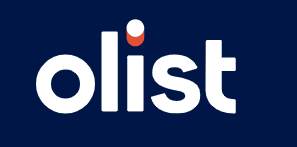

In [1]:
# utilities
import sys
import datetime

# data processing & cleaning
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
# import scipy.stats as st

# graphs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter

# math and calculations
# import haversine as hs
import scipy.stats as st

# custom user functions
from functions import *

# configure transformers to output pandas DataFrames
# https://scikit-learn.org/1.5/auto_examples/miscellaneous
# /plot_set_output.html#sphx-glr-auto-examples-miscellaneous-plot-set-output-py
from sklearn import set_config
set_config(transform_output="pandas")

# serialization
import pickle

# set dataframe display options
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)

# silence warnings after checking
import warnings
pd.set_option('future.no_silent_downcasting', False)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


viridis_palette = ['#440154', '#481e70', '#443982', '#3a528b', '#30678d', '#287b8e', '#20908c', '#20a485', '#35b778', '#5ec961',
                   '#90d643', '#c7e01f', '#fde724']

sunset_palette = ["#FFEB3B", "#FFDA44", "#FFC107", "#FFB300", "#FFA000", "#FF8F00", "#FF6F00", "#FF5722", "#FF3D00", "#FF2D00",
                  "#E53935", "#D32F2F", "#C62828", "#B71C1C", "#FF5252", "#FF1744", "#FF4081", "#F50057", "#D5006D", "#C51162"]

palette = ['#440154', '#481e70', '#443982', '#3a528b', '#30678d', '#287b8e', '#20908c', '#20a485', '#35b778', '#5ec961',
           '#90d643', '#c7e01f', '#fde724', "#FFEB3B", "#FFDA44", "#FFC107", "#FFB300", "#FFA000", "#FF8F00", "#FF6F00",
           "#FF5722", "#FF3D00", "#FF2D00", "#E53935", "#D32F2F", "#C62828", "#B71C1C", "#FF5252", "#FF1744", "#FF4081",
           "#F50057", "#D5006D", "#C51162"]

# extract colors from logo for ppt slideshow
ciel = findColor('olist_blue.png')
cyan = findColor('olist_dark_blue.png')
cherry = findColor('olist_red.png')
print("ciel hex :", ciel)
print("cyan hex :", cyan)
print("cherry hex :", cherry)

ciel hex : #0a4ee4
cyan hex : #001647
cherry hex : #e64e36


In [2]:
# %load_ext pycodestyle_magic
# %pycodestyle_on
# %pycodestyle_off

In [3]:
# add notebook summary
import jyquickhelper as jqh
from jyquickhelper import add_notebook_menu
add_notebook_menu(menu_id='OCDS_P5', raw=False, format='html',
                  header="Olist Client Segmentation - Feature pre-selection & EDA", first_level=1, last_level=5,
                  keep_item=None)

In [4]:
# check package versions
print("Packages versions : \n")
print("jyquickhelper -", jqh.__version__)
print("missingno -", msno.__version__)
print("numpy -", np.__version__)
print("pandas -", pd.__version__)
print("seaborn -", sns.__version__)
print("python -", sys.version[0:6])

Packages versions : 

jyquickhelper - 0.4.220
missingno - 0.5.1
numpy - 1.24.1
pandas - 2.2.3
seaborn - 0.13.2
python - 3.11.1


# 1 - Import data

## 1.1 - baskets file

In [5]:
baskets = pd.read_csv('olist_baskets.csv', encoding='latin-1')

In [6]:
baskets.sample(5)

b_order_id  b_order_item_id  \
37166  5456769456d0d521af0d1675613702a8                1   
60339  8982c5a29644a98312ad54cac13d513e                1   
87191  c5f520f0bbd21e5f3efd20f7b57a0eb9                1   
39676  5a39aece773a0e78a17451bff3221669                1   
55798  7ede340903c485e891cba5b1064ecf5c                1   

                           b_product_id b_shipping_limit_date  b_price  \
37166  c556dfe03a2efef617497a3de58cb44d      2017-09-20 09:30   185.99   
60339  b000447e24e31a4d7e628ca4d0622131      2017-02-10 21:01    25.00   
87191  6a2909ac21d16b721e4795e7e8ff3e68      2018-01-11 00:19    23.80   
39676  c00d043237b75cf63c77a05c423af5c7      2018-04-10 09:55    60.00   
55798  c6dd917a0be2a704582055949915ab32      2018-04-24 10:11    89.99   

       b_freight_value                       b_seller_id  
37166            10.12  7e93a43ef30c4f03f38b393420bc753a  
60339            16.05  92eb0f42c21942b6552362b9b114707d  
87191            12.48  0509040ea3fe50071181bbc359eb7738  
39676             8.29  7681ef142fd2c19048da7430856b5588  
55798            23.21  7a67c85e85bb2ce8582c35f2203ad736

In [7]:
baskets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   b_order_id             112650 non-null  object 
 1   b_order_item_id        112650 non-null  int64  
 2   b_product_id           112650 non-null  object 
 3   b_shipping_limit_date  112650 non-null  object 
 4   b_price                112650 non-null  float64
 5   b_freight_value        112650 non-null  float64
 6   b_seller_id            112650 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
baskets['b_order_item_id'].max()

21

In [9]:
max_order = baskets.loc[baskets['b_order_item_id'] == 21]['b_order_id']
max_order

57317    8272b63d03f5f79c56e9e4120aec44ef
Name: b_order_id, dtype: object

In [10]:
isCandKey(baskets, 'b_order_id')

b_order_id is not a candidate primary key.


False

In [11]:
baskets.shape

(112650, 7)

In [12]:
baskets['b_order_id'].nunique()

98666

In [13]:
baskets['b_product_id'].nunique()

32951

In [14]:
basket_list = baskets.groupby('b_order_id')['b_product_id'].count().reset_index()
list = basket_list.loc[basket_list['b_product_id'] > 1].reset_index()
list

index                        b_order_id  b_product_id
0        13  0008288aa423d2a3f00fcb17cd7d8719             2
1        31  00143d0f86d6fbd9f9b38ab440ac16f5             3
2        39  001ab0a7578dd66cd4b0a71f5b6e1e41             3
3        43  001d8f0e34a38c37f7dba2a37d4eba8b             2
4        69  002c9def9c9b951b1bec6d50753c9891             2
...     ...                               ...           ...
9798  98603  ffd84ab39cd5e873d8dba24342e65c01             2
9799  98626  ffe4b41e99d39f0b837a239110260530             2
9800  98637  ffecd5a79a0084f6a592288c67e3c298             3
9801  98654  fff8287bbae429a99bb7e8c21d151c41             2
9802  98659  fffb9224b6fc7c43ebb0904318b10b5f             4

[9803 rows x 3 columns]

In [15]:
nb_items = baskets.loc[baskets['b_order_item_id'] > 1].groupby('b_order_id')['b_product_id'].value_counts().reset_index()
nb_items.head(60)

b_order_id                      b_product_id  count
0   0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db      1
1   00143d0f86d6fbd9f9b38ab440ac16f5  e95ee6822b66ac6058e2e4aff656071a      2
2   001ab0a7578dd66cd4b0a71f5b6e1e41  0b0172eb0fd18479d29c3bc122c058c2      2
3   001d8f0e34a38c37f7dba2a37d4eba8b  e67307ff0f15ade43fcb6e670be7a74c      1
4   002c9def9c9b951b1bec6d50753c9891  2d9ff06c8870a518f5f6909774e140fb      1
5   002f98c0f7efd42638ed6100ca699b42  880be32f4db1d9f6e2bec38fb6ac23ab      1
6   003324c70b19a16798817b2b3640e721  2b939dc9b176d7fa21594d588815d4a4      1
7   00337fe25a3780b3424d9ad7c5a4b35e  13944d17b257432717fd260e69853140      1
8   003822434f91204da0a51fe4cf2aba18  99e71b776debf2f01a69dce207e3e4f8      1
9   003f201cdd39cdd59b6447cff2195456  656e0eca68dcecf6a31b8ececfabe3e8      1
10  005059edee63c8c708ba61910793b31b  84f456958365164420cfc80fbe4c7fab      1
11  00526a9d4ebde463baee25f386963ddc  0c4a0f8ab44f9acd2d04e7024f9ba362      3
12  00571ded73b3c061925584feab0db425  8695c431b31927efef5343e675f279e7      1
13  005d9a5423d47281ac463a968b3936fb  4c3ae5db49258df0784827bdacf3b396      2
14  0068c109948b9a1dfb8530d1978acef3  525f8fbde09c9bf777025c3141fbbc6e      1
15  008d9bf350ff02ed444b3452cf3f57e0  efec0b0b076ce3f164b80145743ebc02      1
16  00946f674d880be1f188abc10ad7cf46  9bb2d066e4b33b624cbdfec7d50b3dcb      1
17  0097f0545a302aafa32782f1734ff71c  636598095d69a5718e67d2c9a3c7dde6      1
18  009905140e9f8cc35d5be897937381db  06edb72f1e0c64b14c5b79353f7abea3      1
19  00a57dfbb049fbaae10763e2cf15f797  56cdfe67fbda57c1dcc752f5f361f981      2
20  00b1861aeb89afa498404c684148a619  7e8067e7e5ce7aec0e2cb7c1a456d112      1
21  00b6e66f005a657a6b13eedcacdf9342  e7cc48a9daff5436f63d3aad9426f28b      1
22  00bcee890eba57a9767c7b5ca12d3a1b  55939df5d8d2b853fbc532bf8a00dc32      1
23  00bcee890eba57a9767c7b5ca12d3a1b  b7d94dc0640c7025dc8e3b46b52d8239      1
24  00bcee890eba57a9767c7b5ca12d3a1b  d143bf43abb18593fa8ed20cc990ae84      1
25  00c00d5b36157595e21108ba1da2828f  7933eeb8cf79ae899bfac71c0edb076d      1
26  00c9f7d4b0e87781465e562dc109f6aa  1a0d662b65b5ef08796501b064c853af      3
27  00d1e381c0995f0bdb95909fe7434d0b  23227b07fc69250d2fa4be6602011aea      1
28  00d50baf1bc56a3c59de1810a6b84b0d  71a7800a633691de8ecdd17463335e2e      1
29  00d94e8901b75ee0d6ef1f87f947b666  a35a9f46dcee0a67c8c7ad8493eb4135      1
30  00e5b655df1cc911466758210325c67c  880be32f4db1d9f6e2bec38fb6ac23ab      1
31  00f1cc7439ccb8671133776d1829faf5  2fd91ba79b5f4f8342b67bd79cb54b3f      3
32  00f6ac4816d12f49026b09f2aa77d15f  b532349fe46b38fbc7bb3914c1bdae07      2
33  00f86b368251d739f1896d41469b2b7a  9b08a09bf2fd9731cfca8cb3db24457c      2
34  00fb055886536063afa0dbee07a0944f  5d422bd54b54307ff7a5e770f40946e4      1
35  00fed9e582d5a3e38566872eec164ac6  1491a8ff192d4b5c369b0eaa2fe33ee5      1
36  010b143d83a59b355cd5a75c0f0fd785  6ff1fc9209c7854704a4f75c9fac41b4      3
37  010e7dda85fff564e8b7076ae3928efb  53759a2ecddad2bb87a079a1f1519f73      1
38  01115c06246220def210911556bdc0e5  c31539851232e3accbf0ef4c571f97f2      1
39  0113c9989fe6e5007795daec0633b405  e8ca1ff2d0a28edb5be8bfbf2964dc3a      1
40  01144cadcf64b6427f0a6580a3033220  9351b1e4334769dc0abe871ee3c7abc3      1
41  011bf86f1b7dacebda2c874333cf656b  9ecadb84c81da840dbf3564378b586e9      1
42  01235dc626dcf13283207ba7f36a959a  10dae91e0aba95747e90280edeffe883      1
43  0123a055aa66357326dd6db066592a7d  b0961721fd839e9982420e807758a2a6      1
44  012a238ab54294a3b365812ccc82b135  741a31499a578979be85db7f80139e62      1
45  012a238ab54294a3b365812ccc82b135  8338cef8355d238f43711dcb9c0657b2      1
46  012b3f6ab7776a8ab3443a4ad7bef2e6  422879e10f46682990de24d770e7f83d      1
47  0132451f29a10b66a5cf1bacc85f9afe  283dc451ad3918badb976d56ff887289      1
48  0136390286be8a34efdc801ed150568f  1716ea399ed8ee62ba811e6f55180f45      1
49  013a98b3a668bcef05b98898177f6923  306b0c58328826c0564cbc520787d508      1
50  01428962dce3b65e5433eaeb16c0f48f  54d7ad85b6

In [16]:
example = baskets.loc[baskets['b_order_id'] == '0148d3df00cebda592d4e5f966e300cc']
example

b_order_id  b_order_item_id  \
558  0148d3df00cebda592d4e5f966e300cc                1   
559  0148d3df00cebda592d4e5f966e300cc                2   
560  0148d3df00cebda592d4e5f966e300cc                3   
561  0148d3df00cebda592d4e5f966e300cc                4   
562  0148d3df00cebda592d4e5f966e300cc                5   

                         b_product_id b_shipping_limit_date  b_price  \
558  ed08ea04c92f5f434c2362f7310fb328      2017-08-24 19:24     5.53   
559  ed08ea04c92f5f434c2362f7310fb328      2017-08-24 19:24     5.53   
560  ed08ea04c92f5f434c2362f7310fb328      2017-08-24 19:24     5.53   
561  ed08ea04c92f5f434c2362f7310fb328      2017-08-24 19:24     5.53   
562  ed08ea04c92f5f434c2362f7310fb328      2017-08-24 19:24     5.53   

     b_freight_value                       b_seller_id  
558            11.85  0adac9fbd9a2b63cccaac4f8756c1ca8  
559            11.85  0adac9fbd9a2b63cccaac4f8756c1ca8  
560            11.85  0adac9fbd9a2b63cccaac4f8756c1ca8  
561            11.85  0adac9fbd9a2b63cccaac4f8756c1ca8  
562            11.85  0adac9fbd9a2b63cccaac4f8756c1ca8

In [17]:
example2 = baskets.loc[baskets['b_order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']
example2

b_order_id  b_order_item_id  \
112640  fffb9224b6fc7c43ebb0904318b10b5f                1   
112641  fffb9224b6fc7c43ebb0904318b10b5f                2   
112642  fffb9224b6fc7c43ebb0904318b10b5f                3   
112643  fffb9224b6fc7c43ebb0904318b10b5f                4   

                            b_product_id b_shipping_limit_date  b_price  \
112640  43423cdffde7fda63d0414ed38c11a73      2017-11-03 02:55     55.0   
112641  43423cdffde7fda63d0414ed38c11a73      2017-11-03 02:55     55.0   
112642  43423cdffde7fda63d0414ed38c11a73      2017-11-03 02:55     55.0   
112643  43423cdffde7fda63d0414ed38c11a73      2017-11-03 02:55     55.0   

        b_freight_value                       b_seller_id  
112640            34.19  b1fc4f64df5a0e8b6913ab38803c57a9  
112641            34.19  b1fc4f64df5a0e8b6913ab38803c57a9  
112642            34.19  b1fc4f64df5a0e8b6913ab38803c57a9  
112643            34.19  b1fc4f64df5a0e8b6913ab38803c57a9

In [18]:
example3 = baskets.loc[baskets['b_order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']
example3

b_order_id  b_order_item_id  \
57297  8272b63d03f5f79c56e9e4120aec44ef                1   
57298  8272b63d03f5f79c56e9e4120aec44ef                2   
57299  8272b63d03f5f79c56e9e4120aec44ef                3   
57300  8272b63d03f5f79c56e9e4120aec44ef                4   
57301  8272b63d03f5f79c56e9e4120aec44ef                5   
57302  8272b63d03f5f79c56e9e4120aec44ef                6   
57303  8272b63d03f5f79c56e9e4120aec44ef                7   
57304  8272b63d03f5f79c56e9e4120aec44ef                8   
57305  8272b63d03f5f79c56e9e4120aec44ef                9   
57306  8272b63d03f5f79c56e9e4120aec44ef               10   
57307  8272b63d03f5f79c56e9e4120aec44ef               11   
57308  8272b63d03f5f79c56e9e4120aec44ef               12   
57309  8272b63d03f5f79c56e9e4120aec44ef               13   
57310  8272b63d03f5f79c56e9e4120aec44ef               14   
57311  8272b63d03f5f79c56e9e4120aec44ef               15   
57312  8272b63d03f5f79c56e9e4120aec44ef               16   
57313  8272b63d03f5f79c56e9e4120aec44ef               17   
57314  8272b63d03f5f79c56e9e4120aec44ef               18   
57315  8272b63d03f5f79c56e9e4120aec44ef               19   
57316  8272b63d03f5f79c56e9e4120aec44ef               20   
57317  8272b63d03f5f79c56e9e4120aec44ef               21   

                           b_product_id b_shipping_limit_date  b_price  \
57297  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57298  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57299  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57300  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57301  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57302  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57303  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57304  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57305  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57306  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57307  05b515fdc76e888aada3c6d66c201dff      2017-07-21 18:25      1.2   
57308  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57309  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57310  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57311  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57312  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57313  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57314  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57315  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57316  270516a3f41dc035aa87d220228f844c      2017-07-21 18:25      1.2   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7      2017-07-21 18:25      7.8   

       b_freight_value                       b_seller_id  
57297             7.89  2709af9587499e95e803a6498a5a56e9  
57298             7.89  2709af9587499e95e803a6498a5a56e9  
57299             7.89  2709af9587499e95e803a6498a5a56e9  
57300             7.89  2709af9587499e95e803a6498a5a56e9  
57301             7.89  2709af9587499e95e803a6498a5a56e9  
57302             7.89  2709af9587499e95e803a6498a5a56e9  
57303             7.89  2709af9587499e95e803a6498a5a56e9  
57304             7.89  2709af9587499e95e803a6498a5a56e9  
57305             7.89  2709af9587499e95e803a6498a5a56e9  
57306             7.89  2709af9587499e95e803a6498a5a56e9  
57307             7.89  2709af9587499e95e803a6498a5a56e9  
57308             7.89  2709af9587499e95e803a6498a5a56e9  
57309             7.89  2709af9587499e95e803a6498a5a56e9  
57310             7.89  2709af9587499e95e803a6498a5a56e9  
57311             7.89  2709af9587499e95e803a6498a5a56e9  
57312             7.89  2709af9587499e95e803a6498a5a56e9  
57313             7.89  2709af9587499e95e803a6498a5a56e9  
57314            

**Baskets where multiple products are ordered can contain multiples of the same product or different products. We will therefore keep all the information in this file.**

In [19]:
# msno.matrix(baskets)

In [20]:
baskets.isna().sum().sum()

0

## 1.2 - categories file

In [21]:
categories = pd.read_csv('olist_categories.csv', encoding='latin-1')
categories.sample(5)

cat_name_pt                        cat_name_en
34          artigos_de_festas                     party_supplies
18            eletroportateis                   small_appliances
38  moveis_colchao_e_estofado  furniture_mattress_and_upholstery
3             cama_mesa_banho                     bed_bath_table
28    fashion_roupa_masculina              fashion_male_clothing

In [22]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cat_name_pt  71 non-null     object
 1   cat_name_en  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [23]:
# create new 'unknown' category to fill in blanks in products table
new_row = pd.Series(['desconhecida', 'unknown'], index=categories.columns)
categories = pd.concat([categories, pd.DataFrame([new_row])], ignore_index=True)

In [24]:
# typecasting
categories['cat_name_pt'] = categories['cat_name_pt'].astype('string')
categories['cat_name_en'] = categories['cat_name_en'].astype('string')

# check
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cat_name_pt  72 non-null     string
 1   cat_name_en  72 non-null     string
dtypes: string(2)
memory usage: 1.2 KB


## 1.3 - customers file

In [25]:
customers = pd.read_csv('olist_customers.csv', encoding='latin-1')
customers.sample(5)

c_customer_id  c_zip_code
17646  b8718c4bc8bcd8bf3cbc7500d9092c10        5425
89589  12c50c22a6f04953fceda99928b56847       31140
74011  3ac536aa3b70068437132144e3a1e1ea       15385
30657  a03d07bf4aa2b1c94d11585aacbdaac2       28990
52492  110da78c3da35776c00e4ddee0646997        7032

In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   c_customer_id  99441 non-null  object
 1   c_zip_code     99441 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [27]:
isCandKey(customers, 'c_customer_id')

c_customer_id is a candidate primary key.


True

In [28]:
# typecasting
customers['c_customer_id'] = customers['c_customer_id'].astype('string')
customers['c_zip_code'] = customers['c_zip_code'].astype('string')

# check
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   c_customer_id  99441 non-null  string
 1   c_zip_code     99441 non-null  string
dtypes: string(2)
memory usage: 1.5 MB


## 1.4 - geolocation file

### 1.4.1 - From Olist database

In [29]:
geolocation = pd.read_csv('olist_geolocation.csv', encoding='latin-1')
geolocation.sample(5)

g_zip_code  g_latitude  g_longitude                     g_city g_state
473274       24230  -22.910340   -43.107185                    niteroi      RJ
895061       87180  -23.281212   -52.153272  presidente castelo branco      PR
483522       25015  -22.782049   -43.322917            duque de caxias      RJ
349706       15150  -20.775170   -49.712894            monte aprazivel      SP
61319         3526  -23.554212   -46.487165                  sao paulo      SP

In [30]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   g_zip_code   1000163 non-null  int64  
 1   g_latitude   1000163 non-null  float64
 2   g_longitude  1000163 non-null  float64
 3   g_city       1000163 non-null  object 
 4   g_state      1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [31]:
isCandKey(geolocation, 'g_zip_code')

g_zip_code is not a candidate primary key.


False

In [32]:
all_duplicates = geolocation[geolocation.duplicated(keep=False)]
all_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398076 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   g_zip_code   398076 non-null  int64  
 1   g_latitude   398076 non-null  float64
 2   g_longitude  398076 non-null  float64
 3   g_city       398076 non-null  object 
 4   g_state      398076 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 18.2+ MB


In [33]:
geolocation = geolocation.drop_duplicates()
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730476 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   g_zip_code   730476 non-null  int64  
 1   g_latitude   730476 non-null  float64
 2   g_longitude  730476 non-null  float64
 3   g_city       730476 non-null  object 
 4   g_state      730476 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.4+ MB


In [34]:
isCandKey(geolocation, 'g_zip_code')

g_zip_code is not a candidate primary key.


False

In [35]:
geolocation.groupby('g_zip_code')['g_city'].value_counts().reset_index()

g_zip_code           g_city  count
0            1001        sao paulo     10
1            1002        sao paulo      6
2            1003        sao paulo     10
3            1004        sao paulo     14
4            1005        sao paulo     11
...           ...              ...    ...
24901       99965       agua santa      6
24902       99970          ciriaco     15
24903       99970          ciríaco      1
24904       99980  david canabarro     21
24905       99990        muliterno      2

[24906 rows x 3 columns]

In [36]:
# remove all accents and special characters from city names
geolocation['g_city'] = geolocation['g_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
geolocation['g_city'].value_counts()

g_city
sao paulo               91794
rio de janeiro          35177
belo horizonte          19474
curitiba                11263
brasilia                 8791
                        ...  
porto sao jose              1
sao jose do ivai            1
florian&oacute;polis        1
floripa                     1
nossa senhora da luz        1
Name: count, Length: 5968, dtype: int64

**Precise GPS location of customers is unlikely to be useful for analysis, we will therefore replace the detailed location with the average coordinates for the postcode.**

In [37]:
mean_values = geolocation.groupby('g_zip_code').agg({'g_latitude': 'mean', 'g_longitude': 'mean'}).reset_index()

# merge back to original DataFrame
geolocation_merged = pd.merge(mean_values, geolocation[['g_zip_code', 'g_city', 'g_state']], on='g_zip_code', how='left').drop_duplicates()
geolocation_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19617 entries, 0 to 730474
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   g_zip_code   19617 non-null  int64  
 1   g_latitude   19617 non-null  float64
 2   g_longitude  19617 non-null  float64
 3   g_city       19617 non-null  object 
 4   g_state      19617 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 919.5+ KB


In [38]:
geolocation_merged.head()

g_zip_code  g_latitude  g_longitude     g_city g_state
0         1001  -23.550271   -46.634047  sao paulo      SP
10        1002  -23.547657   -46.634991  sao paulo      SP
16        1003  -23.548991   -46.635653  sao paulo      SP
26        1004  -23.549829   -46.634792  sao paulo      SP
40        1005  -23.549487   -46.636650  sao paulo      SP

In [39]:
dups = geolocation_merged[geolocation_merged['g_zip_code'].duplicated() == True]
dups.shape

(602, 5)

In [40]:
dups.head(60)

g_zip_code  g_latitude  g_longitude                  g_city g_state
3645          1307  -23.552145   -46.653571   sao bernardo do campo      SP
9082          2116  -23.520517   -46.585632               sao paulo      RN
25694         3203  -23.589819   -46.576320                 jundiai      SP
40450         4004  -23.573811   -46.646367         taboao da serra      SP
40710         4011  -23.579494   -46.644351               sao paulo      AC
43704         4132  -23.617492   -46.618563                saopaulo      SP
48643         4346  -23.640255   -46.654254                      sp      SP
64499         5026  -23.530342   -46.689288                      sp      SP
70225         5372  -23.575471   -46.748018     sao jose dos campos      SP
80392         5854  -23.661204   -46.761949                      sp      SP
82922         6050  -23.559166   -46.786680               sao paulo      SP
99888         6803  -23.648942   -46.849014                    embu      SP
99948         6804  -23.644251   -46.850875                    embu      SP
99996         6805  -23.633646   -46.850191                    embu      SP
100041        6806  -23.635940   -46.838568                    embu      SP
100050        6807  -23.627221   -46.823481          embu das artes      SP
100154        6810  -23.647131   -46.801221                    embu      SP
100265        6813  -23.651420   -46.805319                    embu      SP
100351        6814  -23.659935   -46.814590                    embu      SP
100447        6815  -23.653189   -46.814741                    embu      SP
100567        6816  -23.644821   -46.819815                    embu      SP
100653        6817  -23.634052   -46.819956                    embu      SP
100684        6820  -23.659286   -46.796673                    embu      SP
100779        6823  -23.669799   -46.801935                    embu      SP
100938        6824  -23.676483   -46.804745                    embu      SP
101028        6825  -23.666703   -46.810377                    embu      SP
101045        6826  -23.659535   -46.801826                    embu      SP
101157        6833  -23.656429   -46.844334                    embu      SP
101211        6835  -23.676672   -46.851099                    embu      SP
101260        6840  -23.649417   -46.861913                    embu      SP
101300        6843  -23.666581   -46.862288          embu das artes      SP
101370        6844  -23.662059   -46.882445                    embu      SP
101387        6845  -23.641672   -46.893890                    embu      SP
101404        6846  -23.635694   -46.872470                    embu      SP
102411        6900  -23.835045   -46.814124              embu guacu      SP
102493        6900  -23.835045   -46.814124               embuguacu      SP
105372        7097  -23.446751   -46.541473              adamantina      SP
106519        7141  -23.427771   -46.507522               sao paulo      SP
107973        7174  -23.424811   -46.419981            guarulhos-sp      SP
112565        7770  -23.412196   -46.843424                polvilho      SP
112577        7776  -23.340647   -46.845548              jordanesia      SP
112684        7786  -23.335162   -46.831204              jordanesia      SP
112742        7787  -23.340262   -46.831085                caieiras      SP
112801        7790  -23.404370   -46.837987                caieiras      SP
112828        7792  -23.411281   -46.844827                caieiras      SP
112864        7793  -23.413873   -46.831133                caieiras      SP
116878        8120  -23.503289   -46.396985                saopaulo      SP
124831        8543  -23.524523   -46.374293               sao paulo      SP
129294        8730  -23.535179   -46.201543           mogidascruzes      SP
131605        8940  -23.574641   -46.039949          biritiba mirim      SP
141762        9540  -23.625733   -46.566645               sao paulo      SP
145603        9780  -23.715038   -46.536707      sao cae

In [41]:
geolocation_merged['g_zip_code'].nunique()

19015

In [42]:
geolocation_trim = geolocation_merged.drop_duplicates(subset='g_zip_code', keep='first').copy()
print(geolocation_trim.shape)
geolocation_trim.head()

(19015, 5)


g_zip_code  g_latitude  g_longitude     g_city g_state
0         1001  -23.550271   -46.634047  sao paulo      SP
10        1002  -23.547657   -46.634991  sao paulo      SP
16        1003  -23.548991   -46.635653  sao paulo      SP
26        1004  -23.549829   -46.634792  sao paulo      SP
40        1005  -23.549487   -46.636650  sao paulo      SP

In [43]:
geolocation_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 730474
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   g_zip_code   19015 non-null  int64  
 1   g_latitude   19015 non-null  float64
 2   g_longitude  19015 non-null  float64
 3   g_city       19015 non-null  object 
 4   g_state      19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


In [44]:
# typecasting
geolocation_trim['g_zip_code'] = geolocation_trim['g_zip_code'].astype('string')
geolocation_trim['g_city'] = geolocation_trim['g_city'].astype('string')
geolocation_trim['g_state'] = geolocation_trim['g_state'].astype('string')

# check
geolocation_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 730474
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   g_zip_code   19015 non-null  string 
 1   g_latitude   19015 non-null  float64
 2   g_longitude  19015 non-null  float64
 3   g_city       19015 non-null  string 
 4   g_state      19015 non-null  string 
dtypes: float64(2), string(3)
memory usage: 891.3 KB


### 1.4.2 - Data enrichment

**We will enrich the geolocation information with some average data from the Brazilian census datasets 2010 and 2022 available here :
https://www.kaggle.com/datasets/crisparada/brazilian-cities**

#### 1.4.2.1 - Census 2010

In [45]:
census_2010 = pd.read_csv('brazilian_census_2010.csv', encoding='latin-1')
census_2010.sample(5)

CITY_2010 STATE_2010  CAPITAL_2010  IDHM_2010  ALT_2010  \
4046    Professor Jamil         GO             0      0.684    733.93   
4788   São José Do Povo         MT             0      0.660    279.40   
13         Abreu E Lima         PE             0      0.679     27.06   
1058  Capela De Santana         RS             0      0.660     35.96   
4087           Quissamã         RJ             0      0.700      9.03   

      AREA_2010  ESTIMATED_POP_2010  TAXES_2010  POP_GDP_2010  \
4046     349.42              3243.0     3271.00        3369.0   
4788     448.29              4021.0     2085.07        3869.0   
13       126.19             99622.0   170264.52       98990.0   
1058     183.07             11810.0    19748.37       11375.0   
4087     709.40             24246.0    26751.09       23125.0   

      GDP_CAPITA_2010  Cars_2010  Motorcycles_2010  Wheeled_tractor_2010  \
4046         14953.82      570.0             297.0                   0.0   
4788         11273.34      276.0             405.0                   0.0   
13           14390.40    14579.0           10122.0                   0.0   
1058         16674.85     2810.0             878.0                   5.0   
4087         43048.94     4570.0            2109.0                   0.0   

      POST_OFFICES_2010  
4046                1.0  
4788                1.0  
13                  1.0  
1058                1.0  
4087                3.0

In [46]:
census_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CITY_2010             5573 non-null   object 
 1   STATE_2010            5573 non-null   object 
 2   CAPITAL_2010          5573 non-null   int64  
 3   IDHM_2010             5565 non-null   float64
 4   ALT_2010              5564 non-null   float64
 5   AREA_2010             5570 non-null   float64
 6   ESTIMATED_POP_2010    5570 non-null   float64
 7   TAXES_2010            5570 non-null   float64
 8   POP_GDP_2010          5570 non-null   float64
 9   GDP_CAPITA_2010       5570 non-null   float64
 10  Cars_2010             5562 non-null   float64
 11  Motorcycles_2010      5562 non-null   float64
 12  Wheeled_tractor_2010  5562 non-null   float64
 13  POST_OFFICES_2010     5453 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 609.7+ KB


In [47]:
# remove all accents and special characters from city names
census_2010['CITY_2010'] = census_2010['CITY_2010'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
census_2010['CITY_2010'].value_counts().reset_index()

CITY_2010  count
0           Bom Jesus      5
1        Sao Domingos      5
2     Santa Terezinha      4
3            Planalto      4
4       Sao Francisco      4
...               ...    ...
5286         Garopaba      1
5287        Garibaldi      1
5288            Garca      1
5289           Gararu      1
5290           Zortea      1

[5291 rows x 2 columns]

In [48]:
# typecasting
census_2010['CITY_2010'] = census_2010['CITY_2010'].astype('string').str.lower()
census_2010['STATE_2010'] = census_2010['STATE_2010'].astype('string')
census_2010['CAPITAL_2010'] = census_2010['CAPITAL_2010'].astype('bool')

# check
census_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CITY_2010             5573 non-null   string 
 1   STATE_2010            5573 non-null   string 
 2   CAPITAL_2010          5573 non-null   bool   
 3   IDHM_2010             5565 non-null   float64
 4   ALT_2010              5564 non-null   float64
 5   AREA_2010             5570 non-null   float64
 6   ESTIMATED_POP_2010    5570 non-null   float64
 7   TAXES_2010            5570 non-null   float64
 8   POP_GDP_2010          5570 non-null   float64
 9   GDP_CAPITA_2010       5570 non-null   float64
 10  Cars_2010             5562 non-null   float64
 11  Motorcycles_2010      5562 non-null   float64
 12  Wheeled_tractor_2010  5562 non-null   float64
 13  POST_OFFICES_2010     5453 non-null   float64
dtypes: bool(1), float64(11), string(2)
memory usage: 571.6 KB


#### 1.4.2.2 - Census 2022

In [49]:
census_2022 = pd.read_csv('brazilian_census_2022.csv', encoding='latin-1')
census_2022.sample(5)

CITY_2022 STATE_2022  CAPITAL_2022  IDHM_2022   ALT_2022  \
2106           Igarapava         SP             0      0.768   609.6014   
4102         Ressaquinha         MG             0      0.683  1180.8717   
2317            Itaocara         RJ             0      0.713    66.1778   
4975  São Miguel Arcanjo         SP             0      0.710   665.7580   
2041               Iacri         SP             0      0.733   497.3434   

      AREA_2022  ESTIMATED_POP_2022  TAXES_2022  POP_GDP_2022  \
2106    468.355               30246      136733         29902   
4102    183.062                4798       20309          4848   
2317    433.397               23247       34086         22736   
4975    930.339               32859       22163         32840   
2041    321.948                6348        4146          6457   

      GDP_CAPITA_2022  POST_OFFICES_2022  Wheeled_tractor_2022  \
2106            36466                  1                    10   
4102            37445                  1                     1   
2317            22116                  0                     0   
4975            19754                  2                     5   
2041            23151                  1                     0   

      Motorcycles_2022  Cars_2022  
2106              1954       9527  
4102               621       1188  
2317              6785       5662  
4975              3700       9569  
2041               554       2040

In [50]:
census_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CITY_2022             5578 non-null   object 
 1   STATE_2022            5578 non-null   object 
 2   CAPITAL_2022          5578 non-null   int64  
 3   IDHM_2022             5578 non-null   float64
 4   ALT_2022              5578 non-null   float64
 5   AREA_2022             5578 non-null   float64
 6   ESTIMATED_POP_2022    5578 non-null   int64  
 7   TAXES_2022            5578 non-null   int64  
 8   POP_GDP_2022          5578 non-null   int64  
 9   GDP_CAPITA_2022       5578 non-null   int64  
 10  POST_OFFICES_2022     5578 non-null   int64  
 11  Wheeled_tractor_2022  5578 non-null   int64  
 12  Motorcycles_2022      5578 non-null   int64  
 13  Cars_2022             5578 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 610.2+ KB


In [51]:
# remove all accents and special characters from city names
census_2022['CITY_2022'] = census_2022['CITY_2022'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
census_2022['CITY_2022'].value_counts().reset_index()

CITY_2022  count
0        Sao Domingos      5
1           Bom Jesus      5
2     Santa Terezinha      4
3        Santa Helena      4
4         Santa Luzia      4
...               ...    ...
5288        Goianinha      1
5289        Goiandira      1
5290        Goiabeira      1
5291    Godoy Moreira      1
5292             Oleo      1

[5293 rows x 2 columns]

In [52]:
census_2022.columns

Index(['CITY_2022', 'STATE_2022', 'CAPITAL_2022', 'IDHM_2022', 'ALT_2022',
       'AREA_2022', 'ESTIMATED_POP_2022', 'TAXES_2022', 'POP_GDP_2022',
       'GDP_CAPITA_2022', 'POST_OFFICES_2022', 'Wheeled_tractor_2022',
       'Motorcycles_2022', 'Cars_2022'],
      dtype='object')

In [53]:
# typecasting
census_2022['CITY_2022'] = census_2022['CITY_2022'].astype('string').str.lower()
census_2022['STATE_2022'] = census_2022['STATE_2022'].astype('string')
census_2022['CAPITAL_2022'] = census_2022['CAPITAL_2022'].astype('bool')
census_2022['ESTIMATED_POP_2022'] = census_2022['ESTIMATED_POP_2022'].astype('float64')
census_2022['TAXES_2022'] = census_2022['TAXES_2022'].astype('float64')
census_2022['POP_GDP_2022'] = census_2022['POP_GDP_2022'].astype('float64')
census_2022['GDP_CAPITA_2022'] = census_2022['GDP_CAPITA_2022'].astype('float64')
census_2022['POST_OFFICES_2022'] = census_2022['POST_OFFICES_2022'].astype('float64')
census_2022['Wheeled_tractor_2022'] = census_2022['Wheeled_tractor_2022'].astype('float64')
census_2022['Motorcycles_2022'] = census_2022['Motorcycles_2022'].astype('float64')
census_2022['Cars_2022'] = census_2022['Cars_2022'].astype('float64')

# check
census_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CITY_2022             5578 non-null   string 
 1   STATE_2022            5578 non-null   string 
 2   CAPITAL_2022          5578 non-null   bool   
 3   IDHM_2022             5578 non-null   float64
 4   ALT_2022              5578 non-null   float64
 5   AREA_2022             5578 non-null   float64
 6   ESTIMATED_POP_2022    5578 non-null   float64
 7   TAXES_2022            5578 non-null   float64
 8   POP_GDP_2022          5578 non-null   float64
 9   GDP_CAPITA_2022       5578 non-null   float64
 10  POST_OFFICES_2022     5578 non-null   float64
 11  Wheeled_tractor_2022  5578 non-null   float64
 12  Motorcycles_2022      5578 non-null   float64
 13  Cars_2022             5578 non-null   float64
dtypes: bool(1), float64(11), string(2)
memory usage: 572.1 KB


#### 1.4.2.3 - Average 2016 values

In [54]:
censi = census_2010.merge(census_2022, how='outer', right_on='CITY_2022', left_on='CITY_2010')
censi.sample(5)

CITY_2010 STATE_2010 CAPITAL_2010  IDHM_2010  ALT_2010  \
5170          sao domingos         SE        False      0.588    209.44   
4755       sagrada familia         RS        False      0.680    360.61   
2589            itambaraca         PR        False      0.690    423.57   
2800              jaqueira         PE        False      0.575    229.63   
2017  floresta do araguaia         PA        False      0.583    187.62   

      AREA_2010  ESTIMATED_POP_2010  TAXES_2010  POP_GDP_2010  \
5170     102.00             11065.0        6.15       11053.0   
4755      77.89              2613.0        2.46        2676.0   
2589     207.34              6616.0        7.40        6835.0   
2800      87.21             11668.0     2753.68       11649.0   
2017    3444.29             20080.0       11.30       19508.0   

      GDP_CAPITA_2010  Cars_2010  Motorcycles_2010  Wheeled_tractor_2010  \
5170          9067.26      822.0            1566.0                   0.0   
4755         21773.50      777.0             361.0                   0.0   
2589         18249.92     2000.0             739.0                   0.0   
2800          7704.66      551.0             917.0                   0.0   
2017         16151.54      548.0            2681.0                   0.0   

      POST_OFFICES_2010             CITY_2022 STATE_2022  CAPITAL_2022  \
5170                1.0          sao domingos         SC         False   
4755                2.0       sagrada familia         RS         False   
2589                1.0            itambaraca         PR         False   
2800                1.0              jaqueira         PE         False   
2017                1.0  floresta do araguaia         PA         False   

      IDHM_2022  ALT_2022  AREA_2022  ESTIMATED_POP_2022  TAXES_2022  \
5170      0.765  620.9305    366.787              9457.0     18523.0   
4755      0.678  360.6117     77.889              2613.0      2458.0   
2589      0.694  423.5689    207.342              6616.0      7404.0   
2800      0.575  229.6328     87.208             11668.0      2754.0   
2017      0.583  187.6225   3444.285             20080.0     11298.0   

      POP_GDP_2022  GDP_CAPITA_2022  POST_OFFICES_2022  Wheeled_tractor_2022  \
5170        9509.0          34323.0                1.0                   0.0   
4755        2676.0          21774.0                2.0                   0.0   
2589        6835.0          18250.0                1.0                   0.0   
2800       11649.0           7705.0                1.0                   0.0   
2017       19508.0          16152.0                1.0                   0.0   

      Motorcycles_2022  Cars_2022  
5170            1202.0     3623.0  
4755             361.0      777.0  
2589             739.0     2000.0  
2800             917.0      551.0  
2017            2681.0      548.0

In [55]:
census_2016 = censi[['CITY_2022', 'STATE_2022', 'CAPITAL_2022', 'ALT_2022']].copy()

# rename columns
census_2016 = census_2016.rename(columns={'CITY_2022':'city', 'STATE_2022': 'state', 'CAPITAL_2022': 'capital',
                                          'ALT_2022' : 'altitude'})

# average population density in inhabitants per square kilometer
census_2016['pop_density'] = round(((census_2022['ESTIMATED_POP_2022'] / census_2022['AREA_2022'])
                                    + (census_2010['ESTIMATED_POP_2010'] / census_2010['AREA_2010']))/2, 2)

# average total number of motor vehicles
census_2016['motor_vehicles'] = round((census_2010['Cars_2010'] + census_2010['Motorcycles_2010']
                                       + census_2010['Wheeled_tractor_2010'] + census_2022['Cars_2022'] 
                                       + census_2022['Motorcycles_2022'] + census_2022['Wheeled_tractor_2022']) / 2, 0)

# average GDP per capita in reals
census_2016['GDP_per_capita'] = (census_2010['GDP_CAPITA_2010'] + census_2022['GDP_CAPITA_2022'])/2

# average total number of post offices 
census_2016['post_offices'] = (census_2010['POST_OFFICES_2010'] + census_2022['POST_OFFICES_2022'])/2

# average HDI Index
census_2016['HDI_index'] = (census_2010['IDHM_2010'] + census_2022['IDHM_2022'])/2

# average total taxes levied in % of GDP
census_2016['tax_gdp_%'] = round((((census_2010['TAXES_2010']*1000)/(census_2010['GDP_CAPITA_2010'] 
                                                                     *census_2010['POP_GDP_2010'])+
                                   (census_2022['TAXES_2022']*1000)/(census_2022['GDP_CAPITA_2022']
                                                                     *census_2022['POP_GDP_2022']))/2)*100, 2)

In [56]:
# remove duplicate records
census_2016 = census_2016.drop_duplicates()
census_2016.shape

(6175, 10)

In [57]:
# remove infinite values
infinites = census_2016.loc[census_2016['pop_density'] > 1000000000]
infinites

city state  capital  altitude  pop_density  \
4448  presidente juscelino    MA    False   51.3674          inf   

      motor_vehicles  GDP_per_capita  post_offices  HDI_index  tax_gdp_%  
4448          1218.0       10416.235           1.0     0.6635        NaN

In [58]:
census_2016.loc[((census_2016['city'] == 'presidente juscelino') & (census_2016['state'] == 'MA')),
                ['pop_density']] = (7000000/332000)

#### 1.4.2.4 - Merge additional info into geoloc info

In [59]:
geoloc_enriched = geolocation_trim.merge(census_2016, how='left', left_on=['g_city', 'g_state'], right_on=['city', 'state'])
geoloc_enriched.shape

(20394, 15)

In [60]:
geoloc_enriched.sample(5)

g_zip_code  g_latitude  g_longitude                 g_city g_state  \
12333      57670   -9.575596   -36.303130              maribondo      AL   
2877        5652  -23.597602   -46.716865              sao paulo      SP   
12254      57301   -9.765973   -36.649769              arapiraca      AL   
4339        9785  -23.706195   -46.541991  sao bernardo do campo      SP   
8560       32250  -19.921959   -44.080481               contagem      MG   

                        city state capital  altitude  pop_density  \
12333              maribondo    AL   False  162.2236        48.62   
2877               sao paulo    SP    True  783.6151        81.59   
12254              arapiraca    AL   False  269.1145        57.83   
4339   sao bernardo do campo    SP   False  772.8370        22.51   
8560                contagem    MG   False  975.4974        18.57   

       motor_vehicles  GDP_per_capita  post_offices  HDI_index  tax_gdp_%  
12333          2533.0       18360.740           1.0     0.6435       5.89  
2877          11148.0       27499.805           1.0     0.7020       1.85  
12254         11922.0       26502.575           2.5     0.7570      10.05  
4339           3651.0       40043.345           1.5     0.7370       6.18  
8560           1254.0       17433.425           1.0     0.6750       2.58

**For small cities in the geoloc_trim file but not in the census_2016 file, we replace NaNs with average numerical values for the state they belong to, and replace missing capital information with False.**

In [61]:
# select numeric columns
num_cols = geoloc_enriched.select_dtypes(include=['number']).columns

# Fill NaN values with the mean of their respective groups for numeric columns
geoloc_enriched[num_cols] = geoloc_enriched[num_cols].fillna(geoloc_enriched.groupby('g_state')[num_cols].transform('mean'))

In [62]:
geoloc_enriched['capital'].fillna(value=False, inplace=True)
geoloc_enriched.drop(columns=['city', 'state'], inplace=True)
geoloc_enriched.drop_duplicates(subset='g_zip_code', keep='first', inplace=True)

In [63]:
# msno.matrix(geoloc_enriched)

In [64]:
geoloc_enriched.isna().sum().sum()

0

In [65]:
isCandKey(geoloc_enriched, 'g_zip_code')

g_zip_code is a candidate primary key.


True

In [66]:
geoloc_enriched.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 20393
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   g_zip_code      19015 non-null  string 
 1   g_latitude      19015 non-null  float64
 2   g_longitude     19015 non-null  float64
 3   g_city          19015 non-null  string 
 4   g_state         19015 non-null  string 
 5   capital         19015 non-null  bool   
 6   altitude        19015 non-null  float64
 7   pop_density     19015 non-null  float64
 8   motor_vehicles  19015 non-null  float64
 9   GDP_per_capita  19015 non-null  float64
 10  post_offices    19015 non-null  float64
 11  HDI_index       19015 non-null  float64
 12  tax_gdp_%       19015 non-null  float64
dtypes: bool(1), float64(9), string(3)
memory usage: 1.9 MB


## 1.5 - payments file

In [67]:
payments = pd.read_csv('olist_payments.csv', encoding='latin-1')
payments.sample(5)

pt_order_id  pt_pmt_sequence  pt_pmt_type  \
58170  f4c8338a46de11977d4378c185a9dbaf                1  credit_card   
6239   0a1f877f7653fce5563de42726f033ca                1  credit_card   
7337   fbacbe04cbdc1c9aadf3409a9aa1e9a0                1  credit_card   
2356   8e9168f5b8cbf3a8e5d2f6767cefa724                1  credit_card   
40037  df75a2d753c65af66e3571e2dbfd985a                1  credit_card   

       pt_pmt_installments  pt_pmt_value  
58170                    3        243.04  
6239                     3         31.73  
7337                     2        201.79  
2356                     5        111.84  
40037                    3        190.06

In [68]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pt_order_id          103886 non-null  object 
 1   pt_pmt_sequence      103886 non-null  int64  
 2   pt_pmt_type          103886 non-null  object 
 3   pt_pmt_installments  103886 non-null  int64  
 4   pt_pmt_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [69]:
payments['pt_order_id'].nunique()

99440

In [70]:
payments['pt_pmt_type'].value_counts().reset_index()

pt_pmt_type  count
0  credit_card  76795
1       boleto  19784
2      voucher   5775
3   debit_card   1529
4  not_defined      3

In [71]:
payments_trim = payments.loc[payments['pt_pmt_type'] != 'not_defined']
payments_trim.shape

(103883, 5)

In [72]:
ex1 = payments_trim.loc[payments_trim['pt_order_id'] == '285c2e15bebd4ac83635ccc563dc71f4']
ex1

pt_order_id  pt_pmt_sequence  pt_pmt_type  \
19078  285c2e15bebd4ac83635ccc563dc71f4               14      voucher   
25661  285c2e15bebd4ac83635ccc563dc71f4               17      voucher   
27824  285c2e15bebd4ac83635ccc563dc71f4               22      voucher   
31264  285c2e15bebd4ac83635ccc563dc71f4               11      voucher   
31642  285c2e15bebd4ac83635ccc563dc71f4               16      voucher   
38564  285c2e15bebd4ac83635ccc563dc71f4                7      voucher   
41209  285c2e15bebd4ac83635ccc563dc71f4                9      voucher   
43258  285c2e15bebd4ac83635ccc563dc71f4               13      voucher   
44773  285c2e15bebd4ac83635ccc563dc71f4               18      voucher   
51943  285c2e15bebd4ac83635ccc563dc71f4                2      voucher   
59149  285c2e15bebd4ac83635ccc563dc71f4                6      voucher   
63398  285c2e15bebd4ac83635ccc563dc71f4                1  credit_card   
63599  285c2e15bebd4ac83635ccc563dc71f4               12      voucher   
75172  285c2e15bebd4ac83635ccc563dc71f4                3      voucher   
76134  285c2e15bebd4ac83635ccc563dc71f4                5      voucher   
77796  285c2e15bebd4ac83635ccc563dc71f4               19      voucher   
81583  285c2e15bebd4ac83635ccc563dc71f4                4      voucher   
82041  285c2e15bebd4ac83635ccc563dc71f4               21      voucher   
82117  285c2e15bebd4ac83635ccc563dc71f4                8      voucher   
83808  285c2e15bebd4ac83635ccc563dc71f4               20      voucher   
88775  285c2e15bebd4ac83635ccc563dc71f4               10      voucher   
92329  285c2e15bebd4ac83635ccc563dc71f4               15      voucher   

       pt_pmt_installments  pt_pmt_value  
19078                    1          1.75  
25661                    1          1.23  
27824                    1          1.05  
31264                    1          1.03  
31642                    1          1.96  
38564                    1          1.14  
41209                    1          1.05  
43258                    1          4.07  
44773                    1          1.70  
51943                    1          1.24  
59149                    1          2.85  
63398                    1          1.62  
63599                    1          2.24  
75172                    1          1.40  
76134                    1          1.75  
77796                    1          1.00  
81583                    1          2.89  
82041                    1          3.08  
82117                    1          1.23  
83808                    1          1.09  
88775                    1          2.78  
92329                    1          2.70

In [73]:
ex2 = payments_trim.loc[payments_trim['pt_order_id'] == '3000d826eb3c8a539ba6d23df8440eba']
ex2

pt_order_id  pt_pmt_sequence  pt_pmt_type  \
68632  3000d826eb3c8a539ba6d23df8440eba                1  credit_card   

       pt_pmt_installments  pt_pmt_value  
68632                    6         65.94

In [74]:
payments_trim['pt_pmt_sequence'].value_counts().reset_index()

pt_pmt_sequence  count
0                 1  99357
1                 2   3039
2                 3    581
3                 4    278
4                 5    170
5                 6    118
6                 7     82
7                 8     54
8                 9     43
9                10     34
10               11     29
11               12     21
12               13     13
13               14     10
14               15      8
15               18      6
16               19      6
17               16      6
18               17      6
19               21      4
20               20      4
21               22      3
22               26      2
23               24      2
24               23      2
25               25      2
26               29      1
27               28      1
28               27      1

In [75]:
payments_trim['pt_pmt_installments'].value_counts().reset_index()

pt_pmt_installments  count
0                     1  52543
1                     2  12413
2                     3  10461
3                     4   7098
4                    10   5328
5                     5   5239
6                     8   4268
7                     6   3920
8                     7   1626
9                     9    644
10                   12    133
11                   15     74
12                   18     27
13                   11     23
14                   24     18
15                   20     17
16                   13     16
17                   14     15
18                   17      8
19                   16      5
20                   21      3
21                    0      2
22                   22      1
23                   23      1

In [76]:
payments_trim.groupby('pt_pmt_type')[['pt_pmt_type', 'pt_pmt_installments']].value_counts().reset_index()

pt_pmt_type  pt_pmt_installments  count
0        boleto                    1  19784
1   credit_card                    1  25455
2   credit_card                    2  12413
3   credit_card                    3  10461
4   credit_card                    4   7098
5   credit_card                   10   5328
6   credit_card                    5   5239
7   credit_card                    8   4268
8   credit_card                    6   3920
9   credit_card                    7   1626
10  credit_card                    9    644
11  credit_card                   12    133
12  credit_card                   15     74
13  credit_card                   18     27
14  credit_card                   11     23
15  credit_card                   24     18
16  credit_card                   20     17
17  credit_card                   13     16
18  credit_card                   14     15
19  credit_card                   17      8
20  credit_card                   16      5
21  credit_card                   21      3
22  credit_card                    0      2
23  credit_card                   22      1
24  credit_card                   23      1
25   debit_card                    1   1529
26      voucher                    1   5775

In [77]:
payments_trim.groupby('pt_pmt_type')[['pt_pmt_type', 'pt_pmt_sequence']].value_counts().reset_index()

pt_pmt_type  pt_pmt_sequence  count
0        boleto                1  19783
1        boleto                2      1
2   credit_card                1  76476
3   credit_card                2    318
4   credit_card                3      1
5    debit_card                1   1477
6    debit_card                2     51
7    debit_card                3      1
8       voucher                2   2669
9       voucher                1   1621
10      voucher                3    579
11      voucher                4    278
12      voucher                5    170
13      voucher                6    118
14      voucher                7     82
15      voucher                8     54
16      voucher                9     43
17      voucher               10     34
18      voucher               11     29
19      voucher               12     21
20      voucher               13     13
21      voucher               14     10
22      voucher               15      8
23      voucher               16      6
24      voucher               17      6
25      voucher               18      6
26      voucher               19      6
27      voucher               20      4
28      voucher               21      4
29      voucher               22      3
30      voucher               23      2
31      voucher               24      2
32      voucher               25      2
33      voucher               26      2
34      voucher               27      1
35      voucher               28      1
36      voucher               29      1

**Only credit cards have payment installments values greater than 1.**

**Payment installments correspond to payments split into multiple sub-payments using the same means of payment, typically a credit card. Payment sequence corresponds to multiple sub-payments where different or the same payment method may have been used to pay for an order: it is effectively a counter of how many different payment methods have been used for a particular order, and may be linked to orders where there are multiple products in the basket from different sellers each offering a voucher for their particular product. We will therefore keep all the information in this file.**

In [78]:
isCandKey(payments_trim, 'pt_order_id')

pt_order_id is not a candidate primary key.


False

In [79]:
# msno.matrix(payments)

In [80]:
payments.isna().sum().sum()

0

## 1.6 - products file

In [81]:
products = pd.read_csv('olist_products.csv', encoding='latin-1')
products.sample(5)

po_product_id    po_category_pt  po_name_length  \
23146  024063adde9af865418b7da3dd897b98     esporte_lazer            53.0   
6720   69c58bb97c8d7b75fad9e6c1d391fda6      beleza_saude            59.0   
1490   56a5da29b4975931b470aa9d61ced8d3        automotivo            52.0   
7877   71bd788b998b8394fa883c302c04b08c  moveis_decoracao            57.0   
2797   abcde4527db854fbcf9ba5a0ebb571fe     esporte_lazer            43.0   

       po_description_length  po_photos_qty  po_weight  po_length  po_height  \
23146                  710.0            1.0      450.0       20.0        9.0   
6720                  3037.0            1.0     1650.0       28.0       14.0   
1490                  1236.0            1.0      200.0       20.0        6.0   
7877                  1517.0            2.0      400.0       50.0        3.0   
2797                   864.0            1.0      163.0       17.0       15.0   

       po_width  
23146      14.0  
6720       20.0  
1490       17.0  
7877       25.0  
2797       15.0

In [82]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   po_product_id          32951 non-null  object 
 1   po_category_pt         32341 non-null  object 
 2   po_name_length         32341 non-null  float64
 3   po_description_length  32341 non-null  float64
 4   po_photos_qty          32341 non-null  float64
 5   po_weight              32949 non-null  float64
 6   po_length              32949 non-null  float64
 7   po_height              32949 non-null  float64
 8   po_width               32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [83]:
# msno.matrix(products)

In [84]:
products.isna().sum().sum()

2448

In [85]:
products['po_category_pt'].fillna(value='desconhecida', inplace=True)
products['po_name_length'].fillna(value=0, inplace=True)
products['po_description_length'].fillna(value=0, inplace=True)
products['po_photos_qty'].fillna(value=0, inplace=True)
products['po_weight'].fillna(value=0, inplace=True)
products['po_length'].fillna(value=0, inplace=True)
products['po_height'].fillna(value=0, inplace=True)
products['po_width'].fillna(value=0, inplace=True)

In [86]:
products.isna().sum().sum()

0

In [87]:
isCandKey(products, 'po_product_id')

po_product_id is a candidate primary key.


True

In [88]:
# typecasting
products['po_product_id'] = products['po_product_id'].astype('string')
products['po_category_pt'] = products['po_category_pt'].astype('string')

# check
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   po_product_id          32951 non-null  string 
 1   po_category_pt         32951 non-null  string 
 2   po_name_length         32951 non-null  float64
 3   po_description_length  32951 non-null  float64
 4   po_photos_qty          32951 non-null  float64
 5   po_weight              32951 non-null  float64
 6   po_length              32951 non-null  float64
 7   po_height              32951 non-null  float64
 8   po_width               32951 non-null  float64
dtypes: float64(7), string(2)
memory usage: 2.3 MB


In [89]:
products.head()

po_product_id         po_category_pt  po_name_length  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria            40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes            44.0   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer            46.0   
3  cef67bcfe19066a932b7673e239eb23d                  bebes            27.0   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas            37.0   

   po_description_length  po_photos_qty  po_weight  po_length  po_height  \
0                  287.0            1.0      225.0       16.0       10.0   
1                  276.0            1.0     1000.0       30.0       18.0   
2                  250.0            1.0      154.0       18.0        9.0   
3                  261.0            1.0      371.0       26.0        4.0   
4                  402.0            4.0      625.0       20.0       17.0   

   po_width  
0      14.0  
1      20.0  
2      15.0  
3      26.0  
4      13.0

## 1.7 - reviews file

In [90]:
reviews = pd.read_csv('olist_reviews.csv', encoding='latin-1')
reviews.sample(5)

r_review_id                        r_order_id  \
80274  e1c2acbc4ff51230b90b3b888b65047f  5355cd279109f53086e889f05ff7d62d   
39710  e8306cec4b34486be1b2ab7e40829f9d  8bab7ecb4ace6bff0ac3a7cc2dee73d5   
88515  2a8d65911cbb77305bedc85f31a5cecf  2865f21ecfed100829d47451fbff2ec5   
70331  bf90aafdbbfaeb1eb671706d3d868277  f41fbf3e30f0f79822348910ca2009f2   
51830  589b0e6b17b5cfe3f7b593e07803976e  7b3821e2a5cb30052dde08403418c349   

       r_score r_title  \
80274        4     NaN   
39710        4       ,   
88515        4     NaN   
70331        5     NaN   
51830        5     NaN   

                                                                               r_message  \
80274                                                         MUITO BOM VOU COMPRAR MAIS   
39710  O produto chegou antes da data prevista. Estou feliz, com minha compra. É lindo!    
88515                                                                                NaN   
70331                                                                                NaN   
51830                                                                                NaN   

       r_creation          r_answer  
80274  2017-09-26  2017-09-26 18:09  
39710  2018-05-26  2018-05-26 23:28  
88515  2018-06-13  2018-06-14 10:30  
70331  2018-07-04  2018-07-05 02:07  
51830  2018-05-18  2018-05-22 00:34

In [91]:
reviews['r_review_id'].nunique()

98410

In [92]:
isCandKey(reviews, 'r_order_id')

r_order_id is not a candidate primary key.


False

In [93]:
reviews['r_order_id'].nunique()

98673

In [94]:
reviews.duplicated().value_counts()

False    99224
Name: count, dtype: int64

In [95]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   r_review_id  99224 non-null  object
 1   r_order_id   99224 non-null  object
 2   r_score      99224 non-null  int64 
 3   r_title      11568 non-null  object
 4   r_message    40977 non-null  object
 5   r_creation   99224 non-null  object
 6   r_answer     99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [96]:
review_list = reviews.groupby('r_review_id')['r_order_id'].value_counts().reset_index()
review_list.head()

r_review_id                        r_order_id  count
0  0001239bc1de2e33cb583967c2ca4c67  fc046d7776171871436844218f817d7d      1
1  0001cc6860aeaf5b9017fe4131a52e62  d4665434b01caa9dc3e3e78b3eb3593e      1
2  00020c7512a52e92212f12d3e37513c0  e28abf2eb2f1fbcbdc2dd0cd9a561671      1
3  00032b0141443497c898b3093690af51  04fb47576993a3cb0c12d4b25eab6e4e      1
4  00034d88989f9a4c393bdcaec301537f  5f358d797a49fe2f24352f73426215f6      1

In [97]:
review_list = reviews.groupby('r_review_id')['r_order_id'].value_counts().reset_index()
revs = review_list.loc[review_list['count'] > 1]
revs.head(60)

Empty DataFrame
Columns: [r_review_id, r_order_id, count]
Index: []

In [98]:
isCandKey(reviews, 'r_review_id')

r_review_id is not a candidate primary key.


False

**Customers review products not orders, so as there can be more than one product in an order, there can be more that one review for a particular order. We will keep all lines in this dataframe and join it with other information based on the order ID.**

In [99]:
# typecasting
reviews['r_review_id'] = reviews['r_review_id'].astype('string')
reviews['r_order_id'] = reviews['r_order_id'].astype('string')
reviews['r_title'] = reviews['r_title'].astype('string')
reviews['r_message'] = reviews['r_message'].astype('string')
reviews['r_creation'] = pd.to_datetime(reviews['r_creation'])
reviews['r_answer'] = pd.to_datetime(reviews['r_answer'])

# check
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   r_review_id  99224 non-null  string        
 1   r_order_id   99224 non-null  string        
 2   r_score      99224 non-null  int64         
 3   r_title      11568 non-null  string        
 4   r_message    40977 non-null  string        
 5   r_creation   99224 non-null  datetime64[ns]
 6   r_answer     99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), string(4)
memory usage: 5.3 MB


**Missing values in the title and message columns will be replaced with the length of these fields at the feature engineering stage, so we leave them as is for the time being.**

## 1.8 - sellers file

In [100]:
sellers = pd.read_csv('olist_sellers.csv', encoding='latin-1')
sellers.sample(5)

se_seller_id  se_zip_code
1885  9d4db00d65d7760644ac0c14edb5fd86        18025
40    d3674f271c91f824f82d24d92011f669        72233
971   b1b3948701c5c72445495bd161b83a4c         3390
2453  c72de06d72748d1a0dfb2125be43ba63        46430
1114  52a50b42accf164f9f019941e5759d9b        13820

In [101]:
isCandKey(sellers, 'se_seller_id')

se_seller_id is a candidate primary key.


True

In [102]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   se_seller_id  3095 non-null   object
 1   se_zip_code   3095 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.5+ KB


In [103]:
# typecasting
sellers['se_seller_id'] = sellers['se_seller_id'].astype('string')
sellers['se_zip_code'] = sellers['se_zip_code'].astype('string')

# check
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   se_seller_id  3095 non-null   string
 1   se_zip_code   3095 non-null   string
dtypes: string(2)
memory usage: 48.5 KB


## 1.9 - shipping file

In [104]:
shipping = pd.read_csv('olist_shipping.csv', encoding='latin-1')
shipping.sample(5)

sh_order_id                    sh_customer_id  \
75535  4ade81c98608cbcec03c4c345efaed72  8df178ced93d8d488dfceefc8f619d9a   
79828  05a0f6d062da2d6c66fa846737770d35  d61fdb0c42d843ba72a06f8b597bcf6c   
29299  c9fe382a47de702dfad8f4b2ea3d2b3a  fb944ca3fae591b47729c008b3cb1aa4   
82327  41a36974d44d460751104164c80e5ac6  3a1b126079501851f2fabfa5ea63d48b   
72052  18cbe13511542b17fb381213e324d4e6  26de5ab0f68967b8af2c7c56d39a3742   

       sh_status     sh_order_time sh_order_approval sh_carrier_delivery  \
75535  delivered  2018-01-13 11:40  2018-01-16 03:50    2018-01-19 15:42   
79828    shipped  2018-01-22 19:12  2018-01-22 19:19    2018-01-23 16:59   
29299  delivered  2017-05-13 09:03  2017-05-13 09:10    2017-05-19 14:51   
82327  delivered  2017-12-15 23:03  2017-12-19 09:51    2017-12-28 21:27   
72052  delivered  2017-12-19 20:37  2017-12-19 20:45    2017-12-21 22:48   

      sh_customer_delivery_actual sh_customer_delivery_estimate  
75535            2018-01-24 21:05                    2018-02-05  
79828                         NaN                    2018-02-19  
29299            2017-05-27 23:13                    2017-06-19  
82327            2018-01-09 20:08                    2018-01-19  
72052            2017-12-27 19:14                    2018-01-12

In [105]:
isCandKey(shipping, 'sh_order_id')

sh_order_id is a candidate primary key.


True

In [106]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   sh_order_id                    99441 non-null  object
 1   sh_customer_id                 99441 non-null  object
 2   sh_status                      99441 non-null  object
 3   sh_order_time                  99441 non-null  object
 4   sh_order_approval              99281 non-null  object
 5   sh_carrier_delivery            97658 non-null  object
 6   sh_customer_delivery_actual    96476 non-null  object
 7   sh_customer_delivery_estimate  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [107]:
# msno.matrix(shipping)

In [108]:
shipping.isna().sum().sum()

4908

In [109]:
shipping['sh_status'].value_counts()

sh_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**We remove all lines with missing information, as there is no reasonable way of inferring the missing information:**

In [110]:
shipping_trim = shipping.dropna().copy()
shipping_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   sh_order_id                    96461 non-null  object
 1   sh_customer_id                 96461 non-null  object
 2   sh_status                      96461 non-null  object
 3   sh_order_time                  96461 non-null  object
 4   sh_order_approval              96461 non-null  object
 5   sh_carrier_delivery            96461 non-null  object
 6   sh_customer_delivery_actual    96461 non-null  object
 7   sh_customer_delivery_estimate  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [111]:
# typecasting
shipping_trim['sh_order_id'] = shipping_trim['sh_order_id'].astype('string')
shipping_trim['sh_customer_id'] = shipping_trim['sh_customer_id'].astype('string')
shipping_trim['sh_status'] = shipping_trim['sh_status'].astype('category')
shipping_trim['sh_order_time'] = pd.to_datetime(shipping_trim['sh_order_time'])
shipping_trim['sh_order_approval'] = pd.to_datetime(shipping_trim['sh_order_approval'])
shipping_trim['sh_carrier_delivery'] = pd.to_datetime(shipping_trim['sh_carrier_delivery'])
shipping_trim['sh_customer_delivery_actual'] = pd.to_datetime(shipping_trim['sh_customer_delivery_actual'])
shipping_trim['sh_customer_delivery_estimate'] = pd.to_datetime(shipping_trim['sh_customer_delivery_estimate'])
# check
shipping_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sh_order_id                    96461 non-null  string        
 1   sh_customer_id                 96461 non-null  string        
 2   sh_status                      96461 non-null  category      
 3   sh_order_time                  96461 non-null  datetime64[ns]
 4   sh_order_approval              96461 non-null  datetime64[ns]
 5   sh_carrier_delivery            96461 non-null  datetime64[ns]
 6   sh_customer_delivery_actual    96461 non-null  datetime64[ns]
 7   sh_customer_delivery_estimate  96461 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), string(2)
memory usage: 6.0 MB


# 2 - Join data for EDA

## 2.1 - Create dataframe

In [112]:
merged_data = shipping_trim.merge(customers, how='left', left_on='sh_customer_id', right_on='c_customer_id').merge(geoloc_enriched, how='left', left_on='c_zip_code', right_on='g_zip_code').merge(baskets, how='left', left_on='sh_order_id', right_on='b_order_id').merge(sellers, how='left', left_on='b_seller_id', right_on='se_seller_id').merge(geoloc_enriched, how='left', left_on='se_zip_code', right_on='g_zip_code').merge(products, how='left', left_on='b_product_id', right_on='po_product_id').merge(categories, how='left', left_on='po_category_pt', right_on='cat_name_pt').merge(reviews, how='left', left_on='b_order_id', right_on='r_order_id').merge(payments, how='left', left_on='b_order_id', right_on='pt_order_id')

In [113]:
# msno.matrix(merged_data)

In [114]:
merged_data.isna().sum().sum()

181441

## 2.2 - Further data cleaning

In [115]:
merge_holes_x = merged_data.loc[merged_data['g_zip_code_x'].isna()]
missing_custy_zips = merge_holes_x['c_zip_code'].tolist()
len(missing_custy_zips)

303

**303 customers have zip codes not referenced in the geolocation file.**

In [116]:
merge_holes_y = merged_data.loc[merged_data['g_zip_code_y'].isna()]
missing_sellers_zips = merge_holes_y['se_zip_code'].tolist()
len(missing_sellers_zips)

261

**261 suppliers have zip codes not referenced in the geolocation file.**

In [117]:
missing_reviews = merged_data.loc[merged_data['r_review_id'].isna()]
missing_reviews.shape

(861, 68)

**861 orders have no associated review.**

In [118]:
# remove customers and suppliers with missing geographical information and orders with missing reviews
merged_data_trim = merged_data.loc[(merged_data['c_zip_code'].isin(missing_custy_zips) == False) 
& (merged_data['se_zip_code'].isin(missing_sellers_zips) == False) & (merged_data['r_review_id'].isna() == False) 
& (merged_data['g_zip_code_x'].isna() == False) & (merged_data['g_zip_code_y'].isna()==False)].copy()

# remove duplicate columns
merged_data_trim.drop(labels=['g_city_y', 'g_state_y', 'capital_y', 'altitude_y', 'pop_density_y', 'motor_vehicles_y',
                              'GDP_per_capita_y', 'post_offices_y', 'HDI_index_y', 'tax_gdp_%_y',  'cat_name_pt' ,
                              'po_category_pt', 'c_customer_id', 'se_seller_id', 'b_product_id','sh_order_id',
                              'r_order_id', 'pt_order_id','g_zip_code_x','g_zip_code_y'], axis=1, inplace=True)


merged_data_trim.shape

(114283, 48)

In [119]:
merged_data_trim.columns

Index(['sh_customer_id', 'sh_status', 'sh_order_time', 'sh_order_approval',
       'sh_carrier_delivery', 'sh_customer_delivery_actual',
       'sh_customer_delivery_estimate', 'c_zip_code', 'g_latitude_x',
       'g_longitude_x', 'g_city_x', 'g_state_x', 'capital_x', 'altitude_x',
       'pop_density_x', 'motor_vehicles_x', 'GDP_per_capita_x',
       'post_offices_x', 'HDI_index_x', 'tax_gdp_%_x', 'b_order_id',
       'b_order_item_id', 'b_shipping_limit_date', 'b_price',
       'b_freight_value', 'b_seller_id', 'se_zip_code', 'g_latitude_y',
       'g_longitude_y', 'po_product_id', 'po_name_length',
       'po_description_length', 'po_photos_qty', 'po_weight', 'po_length',
       'po_height', 'po_width', 'cat_name_en', 'r_review_id', 'r_score',
       'r_title', 'r_message', 'r_creation', 'r_answer', 'pt_pmt_sequence',
       'pt_pmt_type', 'pt_pmt_installments', 'pt_pmt_value'],
      dtype='object')

In [120]:
# msno.matrix(merged_data_trim)

In [121]:
merged_data_trim.isna().sum().sum()

167217

In [122]:
merged_data_trim.sample(3)

sh_customer_id  sh_status       sh_order_time  \
45695  4bed497397b06b63041a9c64e7656443  delivered 2018-06-22 18:25:00   
93190  e51234890e1956bd1cf29cbbbbb42171  delivered 2018-07-09 12:01:00   
61422  ffbd58aa41cbab07f08190801e939f59  delivered 2018-07-29 16:19:00   

        sh_order_approval sh_carrier_delivery sh_customer_delivery_actual  \
45695 2018-06-22 18:58:00 2018-06-26 11:04:00         2018-07-03 17:19:00   
93190 2018-07-11 03:55:00 2018-07-18 11:50:00         2018-07-26 18:06:00   
61422 2018-08-01 16:31:00 2018-08-21 16:19:00         2018-08-23 15:22:00   

      sh_customer_delivery_estimate c_zip_code  g_latitude_x  g_longitude_x  \
45695                    2018-07-26      56200     -7.887670     -40.083765   
93190                    2018-07-31      72255    -15.792464     -48.123756   
61422                    2018-08-07       2252    -23.478883     -46.588328   

        g_city_x g_state_x capital_x  altitude_x  pop_density_x  \
45695   ouricuri        PE     False    451.1383         214.35   
93190   brasilia        DF      True   1115.2484           2.19   
61422  sao paulo        SP      True    783.6151          81.59   

       motor_vehicles_x  GDP_per_capita_x  post_offices_x  HDI_index_x  \
45695          124558.0         34593.785             6.0       0.6775   
93190            5523.0         31723.685             1.5       0.6980   
61422           11148.0         27499.805             1.0       0.7020   

       tax_gdp_%_x                        b_order_id  b_order_item_id  \
45695        15.19  2a6d1505d28e5a6956a20dcdaa6e0464                1   
93190         4.11  0dfe811c6d5e59581eb93ef96fc13d72                1   
61422         1.85  2efe3d3b0ddc295d2ce1c43f021078cb                1   

      b_shipping_limit_date  b_price  b_freight_value  \
45695      2018-06-28 18:58    64.99            37.37   
93190      2018-07-18 03:55    59.99            23.14   
61422      2018-08-06 17:05     8.88             8.29   

                            b_seller_id se_zip_code  g_latitude_y  \
45695  06a2c3af7b3aee5d69171b0e14f0ee87       65072     -2.503158   
93190  06a2c3af7b3aee5d69171b0e14f0ee87       65072     -2.503158   
61422  bbad7e518d7af88a0897397ffdca1979        1512    -23.553639   

       g_longitude_y                     po_product_id  po_name_length  \
45695     -44.249389  980f472a1354c8366960f7c4528c470e            42.0   
93190     -44.249389  78540167bc14d4024b1aae7adfa2f7c9            46.0   
61422     -46.629685  643d903164c4b6ba8bd0b68348e9d135            56.0   

       po_description_length  po_photos_qty  po_weight  po_length  po_height  \
45695                  639.0            1.0      350.0       19.0       12.0   
93190                 1290.0            1.0      350.0       19.0       12.0   
61422                  212.0            3.0      458.0       20.0       13.0   

       po_width    cat_name_en                       r_review_id  r_score  \
45695      13.0  health_beauty  4f79fdec996a09e804f7be990d197e67      5.0   
93190      13.0  health_beauty  e290f18ba9a54e26efd3003d57192414      5.0   
61422      32.0   garden_tools  f54ac87539c637b8a7700f07c1e9e445      1.0   

              r_title                                      r_message  \
45695            Bom                                       Muito bom   
93190            <NA>                                           <NA>   
61422  nao recomendo   ainda não obtive resposta do porquê do atraso   

      r_creation            r_answer  pt_pmt_sequence  pt_pmt_type  \
45695 2018-07-04 2018-07-04 20:27:00              1.0  credit_card   
93190 2018-07-27 2018-07-28 22:22:00              1.0       boleto   
61422 2018-08-09 2018-08-12 11:42:00              1.0  credit_card   

       pt_pmt_installments  pt_pmt_value  
45695                  2.0        102.36  
93190                  1.0         83.13  
61422                  1.0        103.02

## 2.3 - Feature engineering

In [123]:
# replace review title and message with their respective lengths
merged_data_trim['r_title_length'] = merged_data_trim['r_title'].str.len()
merged_data_trim['r_message_length'] = merged_data_trim['r_message'].str.len()

# replace NaNs with zeros in new columns
merged_data_trim['r_title_length'].fillna(value=0, inplace=True)
merged_data_trim['r_message_length'].fillna(value=0, inplace=True)

# drop original columns
merged_data_trim.drop(labels=['r_title', 'r_message'], axis=1, inplace=True)

merged_data_trim.sample(3)

sh_customer_id  sh_status       sh_order_time  \
33862  2694ed5ae8d87e1265879eab1c2d7c74  delivered 2018-02-28 17:31:00   
27021  0d7b652454b643aca094cbdbd5080867  delivered 2018-07-21 19:08:00   
4263   95a001f306dfba60026ad846f37ab045  delivered 2017-07-23 19:02:00   

        sh_order_approval sh_carrier_delivery sh_customer_delivery_actual  \
33862 2018-03-03 02:50:00 2018-03-07 20:22:00         2018-03-09 22:08:00   
27021 2018-07-21 19:24:00 2018-07-23 15:40:00         2018-07-27 19:58:00   
4263  2017-07-23 19:27:00 2017-07-26 15:22:00         2017-08-01 18:07:00   

      sh_customer_delivery_estimate c_zip_code  g_latitude_x  g_longitude_x  \
33862                    2018-03-13      14090    -21.179848     -47.788588   
27021                    2018-08-06       6030    -23.557956     -46.771284   
4263                     2017-08-11      14500    -20.331453     -47.789020   

             g_city_x g_state_x capital_x  altitude_x  pop_density_x  \
33862  ribeirao preto        SP     False    569.8306          15.40   
27021          osasco        SP     False    742.9664          30.51   
4263        ituverava        SP     False    609.8199         174.84   

       motor_vehicles_x  GDP_per_capita_x  post_offices_x  HDI_index_x  \
33862            1574.0         16981.630        1.445181       0.6015   
27021            3282.0          6556.155        1.000000       0.5580   
4263            20086.0         32079.115        2.000000       0.7530   

       tax_gdp_%_x                        b_order_id  b_order_item_id  \
33862         8.70  2b229d21bf1fdfaf9e0ff6d8799303d5                1   
27021         4.04  44fb0b3fb29ddaedf3fe5bd4a99e7495                1   
4263         15.17  150b0776d65cc88c98cb4d10d0bc27b3                1   

      b_shipping_limit_date  b_price  b_freight_value  \
33862      2018-03-08 02:50     43.0             8.27   
27021      2018-07-24 19:24     49.9            20.99   
4263       2017-07-27 19:27     65.9            13.48   

                            b_seller_id se_zip_code  g_latitude_y  \
33862  4e5725ba188db8252977a4f0227bd462       14092    -21.177698   
27021  1f50f920176fa81dab994f9023523100       15025    -20.806162   
4263   d2374cbcbb3ca4ab1086534108cc3ab7       14940    -21.757225   

       g_longitude_y                     po_product_id  po_name_length  \
33862     -47.768193  9a82e75bdd4dc1b60ae5fbf466b16bb5            43.0   
27021     -49.388730  368c6c730842d78016ad823897a372db            57.0   
4263      -48.829541  642247ccf62585635cefa1bf09f59b94            25.0   

       po_description_length  po_photos_qty  po_weight  po_length  po_height  \
33862                  349.0            1.0      167.0       16.0       16.0   
27021                  366.0            2.0     1650.0       30.0       22.0   
4263                   180.0            2.0      900.0       30.0        4.0   

       po_width            cat_name_en                       r_review_id  \
33862      11.0  computers_accessories  588ce1d86f7ac4e9383281c2a4d8c743   
27021      30.0           garden_tools  314adfed9c9ebb83c3021c3b703daf0f   
4263       40.0         bed_bath_table  fc3f507e67fa0329c4bcccc4383eaadc   

       r_score r_creation            r_answer  pt_pmt_sequence  pt_pmt_type  \
33862      5.0 2018-03-10 2018-03-13 21:34:00              1.0       boleto   
27021      5.0 2018-07-28 2018-07-28 23:58:00              1.0   debit_card   
4263       2.0 2017-08-02 2017-08-05 00:55:00              1.0  credit_card   

       pt_pmt_installments  pt_pmt_value  r_title_length  r_message_length  
33862                  1.0         51.27               0                14  
27021                  1.0         70.89              16               110  
4263                   3.0         79.38               0                 0

In [124]:
# calculate distance between customer and seller
merged_data_trim['shipping_distance'] = haversine(merged_data_trim['g_latitude_x'], merged_data_trim['g_longitude_x'],
                                                  merged_data_trim['g_latitude_y'], merged_data_trim['g_longitude_y'])

# drop original columns
merged_data_trim.drop(labels=['g_latitude_y', 'g_longitude_y'], axis=1, inplace=True)
merged_data_trim.rename(columns={'g_latitude_x':'c_lat', 'g_longitude_x':'c_lon'}, inplace=True)

merged_data_trim.sample(3)

sh_customer_id  sh_status       sh_order_time  \
107476  34fe94e0f8c2656309bc7972ce64fa85  delivered 2017-07-25 18:30:00   
73855   6ff9c87680f0e8fbd38b2123af66138e  delivered 2018-04-02 07:19:00   
8738    93c25770ff52717c14a54f59222a23f4  delivered 2018-01-05 09:13:00   

         sh_order_approval sh_carrier_delivery sh_customer_delivery_actual  \
107476 2017-07-25 18:45:00 2017-07-26 15:09:00         2017-08-19 15:36:00   
73855  2018-04-03 07:15:00 2018-04-03 18:28:00         2018-04-17 18:19:00   
8738   2018-01-05 09:27:00 2018-01-11 18:23:00         2018-01-19 15:52:00   

       sh_customer_delivery_estimate c_zip_code      c_lat      c_lon  \
107476                    2017-08-28      65076  -2.515911 -44.298743   
73855                     2018-04-30      56280  -7.576438 -40.502492   
8738                      2018-02-02      38840 -18.998627 -46.309953   

                  g_city_x g_state_x capital_x  altitude_x  pop_density_x  \
107476            sao luis        MA      True     29.5636         437.30   
73855            araripina        PE     False    639.7811          50.26   
8738    carmo do paranaiba        MG     False   1063.7471           4.95   

        motor_vehicles_x  GDP_per_capita_x  post_offices_x  HDI_index_x  \
107476           49901.0         30243.225             1.5       0.7780   
73855             2979.0         48777.830             1.0       0.7345   
8738               668.0          9414.490             1.0       0.5785   

        tax_gdp_%_x                        b_order_id  b_order_item_id  \
107476        12.88  0b54477549051598bd77d59bee6182a7                1   
73855          9.53  ac51a8c8ea39e6dfa53f10bdc73d531d                4   
8738           5.59  a8ecb8c3d0aca9e0740521256a9a9d74                1   

       b_shipping_limit_date  b_price  b_freight_value  \
107476      2017-07-31 18:45    69.90            34.29   
73855       2018-04-09 07:15    17.99            37.04   
8738        2018-01-11 09:27    79.90            15.31   

                             b_seller_id se_zip_code  \
107476  3d871de0142ce09b7081e2b9d1733cb1       13232   
73855   1da3aeb70d7989d1e6d9b0e887f97c23        4265   
8738    431af27f296bc6519d890aa5a05fdb11       14110   

                           po_product_id  po_name_length  \
107476  7fab1a1472fdd934397068931f63f3ca            53.0   
73855   51e8feeedd83467b86a79aa2769367c5            52.0   
8738    558180406ec5ec2f77e01f2807180c20            41.0   

        po_description_length  po_photos_qty  po_weight  po_length  po_height  \
107476                  200.0           10.0      600.0       30.0       25.0   
73855                   429.0            5.0      150.0       20.0       20.0   
8738                   1568.0            1.0      725.0       23.0       10.0   

        po_width    cat_name_en                       r_review_id  r_score  \
107476      20.0           toys  552df4991c812bb5430588a28b1b877e      5.0   
73855       20.0           toys  89a4ff077182a282cc6474a23f711b49      4.0   
8738        15.0  health_beauty  77178d53c14c3fcb59a01fab157d75f3      5.0   

       r_creation            r_answer  pt_pmt_sequence  pt_pmt_type  \
107476 2017-08-20 2017-08-30 18:10:00              1.0  credit_card   
73855  2018-04-18 2018-04-21 13:11:00              1.0  credit_card   
8738   2018-01-20 2018-01-21 17:56:00              1.0  credit_card   

        pt_pmt_installments  pt_pmt_value  r_title_length  r_message_length  \
107476                  2.0        104.19               0                 0   
73855                   3.0        220.12               0                24   
8738                    3.0         95.21               0                 0   

        shipping_distance  
107476        2316.534306  
73855         1895.976106  
8738           295.993381

In [125]:
# replace review creation with delay between delivery of order and review
merged_data_trim['sh_customer_delivery_actual_date'] = [d.date() for d in merged_data_trim['sh_customer_delivery_actual']]
merged_data_trim['r_creation_date'] = [d.date() for d in merged_data_trim['r_creation']]
merged_data_trim['review_delay_days'] = merged_data_trim['r_creation_date'] - merged_data_trim['sh_customer_delivery_actual_date']
merged_data_trim['review_delay_days'] = merged_data_trim['review_delay_days'].astype('timedelta64[s]').astype('int64')/(3600*24)

# drop columns
merged_data_trim.drop(labels=['sh_customer_delivery_actual_date', 'r_creation_date', 'r_creation', 'r_answer', 'r_review_id'],
                      axis=1, inplace=True)

In [126]:
merged_data_trim.sample(3)

sh_customer_id  sh_status       sh_order_time  \
53579   5b8fd2d89503a79c1090906a4e559c5d  delivered 2017-03-13 18:14:00   
107584  75d102f790235016643024b79bcab5c7  delivered 2018-04-10 14:20:00   
108174  a624e908c25a33b47b1e0e08fd1bf08e  delivered 2018-06-18 19:25:00   

         sh_order_approval sh_carrier_delivery sh_customer_delivery_actual  \
53579  2017-03-13 18:14:00 2017-03-14 09:58:00         2017-03-28 13:56:00   
107584 2018-04-10 14:30:00 2018-04-11 13:59:00         2018-04-24 21:20:00   
108174 2018-06-19 19:35:00 2018-06-20 14:37:00         2018-06-28 15:42:00   

       sh_customer_delivery_estimate c_zip_code      c_lat      c_lon  \
53579                     2017-04-04      13068 -22.863237 -47.149927   
107584                    2018-05-18      20551 -22.914565 -43.245840   
108174                    2018-07-19      39260 -17.603253 -44.751136   

               g_city_x g_state_x capital_x  altitude_x  pop_density_x  \
53579          campinas        SP     False    688.9871      50.310000   
107584   rio de janeiro        RJ      True     11.8041     103.370000   
108174  varzea da palma        MG     False    519.6188      91.218631   

        motor_vehicles_x  GDP_per_capita_x  post_offices_x  HDI_index_x  \
53579        7173.000000      14240.635000        2.000000      0.64650   
107584       1248.000000       8703.155000        0.500000      0.62450   
108174       9820.626846      19464.896791        1.771475      0.65291   

        tax_gdp_%_x                        b_order_id  b_order_item_id  \
53579      2.090000  7f13a20e25350f4a55fb2a7c9a2e8d88                1   
107584     4.100000  27dfcb9f2c90418ba2ab5c39f140198d                1   
108174     5.320694  a29bcf8d70584aadea21cb6b6f80ea56                1   

       b_shipping_limit_date  b_price  b_freight_value  \
53579       2017-03-22 18:14   149.80            13.63   
107584      2018-04-16 14:30    16.90            18.23   
108174      2018-06-25 19:32    57.89            23.21   

                             b_seller_id se_zip_code  \
53579   cca3071e3e9bb7d12640c9fbe2301306       14940   
107584  6a8b085f816a1f75f92dbac6eb545f8f       14709   
108174  ba143b05f0110f0dc71ad71b4466ce92        2274   

                           po_product_id  po_name_length  \
53579   cae2e38942c8489d9d7a87a3f525c06b            54.0   
107584  6dceb64b44142aeb9fe7397dfefae705            32.0   
108174  173e9fe34bfe97f3a5e6dc57fe897b74            36.0   

        po_description_length  po_photos_qty  po_weight  po_length  po_height  \
53579                   586.0            1.0     1700.0       33.0        8.0   
107584                  348.0            2.0      150.0       24.0        2.0   
108174                  890.0            1.0      950.0       29.0        3.0   

        po_width      cat_name_en  r_score  pt_pmt_sequence  pt_pmt_type  \
53579       23.0  furniture_decor      5.0              1.0       boleto   
107584      17.0             auto      5.0              1.0  credit_card   
108174      21.0  books_technical      4.0              1.0  credit_card   

        pt_pmt_installments  pt_pmt_value  r_title_length  r_message_length  \
53579                   1.0        163.43               0                 0   
107584                  1.0         35.13               9                45   
108174                  1.0         81.10               0                 0   

        shipping_distance  review_delay_days  
53579          212.078567                1.0  
107584         584.476523                1.0  
108174         679.454361                1.0

In [127]:
# group product categories in fewer larger categories
homewares = ['housewares', 'bed_bath_table', 'home_comfort_2', 'flowers', 'home_confort', 'la_cuisine']
hobbies = ['sports_leisure', 'books_general_interest', 'musical_instruments', 'consoles_games', 'cine_photo', 'audio',
           'books_imported', 'party_supplies', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'art',
           'dvds_blu_ray', 'music', 'arts_and_craftmanship']
fashion = ['fashion_underwear_beach', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_male_clothing', 'fashion_sport',
           'fashio_female_clothing']
health_and_beauty = ['perfumery', 'health_beauty']
kids = ['toys', 'baby', 'fashion_childrens_clothes', 'diapers_and_hygiene']
furniture = ['furniture_decor', 'furniture_mattress_and_upholstery', 'furniture_living_room', 'furniture_bedroom',
             'kitchen_dining_laundry_garden_furniture']
travel_and_gifts = ['luggage_accessories', 'cool_stuff', 'watches_gifts', 'market_place',]
DIY = ['auto', 'garden_tools', 'air_conditioning', 'construction_tools_construction', 'costruction_tools_tools',
       'home_construction', 'signaling_and_security', 'construction_tools_lights', 'costruction_tools_garden',
       'construction_tools_safety']
electronics_and_appliances = ['telephony', 'electronics', 'small_appliances', 'home_appliances', 'home_appliances_2',
                              'small_appliances_home_oven_and_coffee', 'fixed_telephony', 'tablets_printing_image']
F_and_B = ['food', 'drinks', 'food_drink']
pets = ['pet_shop']
office = ['stationery', 'office_furniture', 'computers_accessories', 'computers', 'agro_industry_and_commerce',
          'security_and_services', 'industry_commerce_and_business']
unknown = ['unknown']

In [128]:
# assign each category to a product family
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(homewares), ['product_family']] = 'homewares'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(hobbies), ['product_family']] = 'hobbies'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(fashion), ['product_family']] = 'fashion'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(health_and_beauty), ['product_family']] = 'health_and_beauty'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(kids), ['product_family']] = 'kids'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(furniture), ['product_family']] = 'furniture'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(travel_and_gifts), ['product_family']] = 'travel_and_gifts'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(DIY), ['product_family']] = 'DIY'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(electronics_and_appliances), ['product_family']] = 'electronics_and_appliances'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(F_and_B), ['product_family']] = 'F_and_B'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(pets), ['product_family']] = 'pets'
merged_data_trim.loc[merged_data_trim['cat_name_en'].isin(office), ['product_family']] = 'office'
merged_data_trim.loc[(merged_data_trim['cat_name_en'].isin(unknown)) | (merged_data_trim['cat_name_en'].isna()), ['product_family']] = 'unknown'

In [129]:
merged_data_trim['product_family'].isna().sum()

0

**The categories above had little impact on the clustering (very little information according to PCA), we therefore group them futher in 3 categories : discretionary spending (personal items, fashion, health, pets etc...), household expenditures (DIY, F&B, furniture etc...) and Others (office & unknown).**

In [130]:
# new product groups
discretionary_items = hobbies + fashion + health_and_beauty + travel_and_gifts
household_items = homewares + kids + furniture + DIY + electronics_and_appliances + F_and_B + pets
other_items = office + unknown

In [131]:
# reassign each product family to the new product groups
merged_data_trim.loc[((merged_data_trim['product_family'] == 'hobbies')
                      | (merged_data_trim['product_family'] == 'fashion')
                      | (merged_data_trim['product_family'] == 'health_and_beauty')
                      | (merged_data_trim['product_family'] == 'travel_and_gifts')), ['product_group']] = 'discretionary_items'

merged_data_trim.loc[((merged_data_trim['product_family'] == 'homewares')
                      | (merged_data_trim['product_family'] == 'kids')
                      | (merged_data_trim['product_family'] == 'furniture')
                      | (merged_data_trim['product_family'] == 'DIY')
                      | (merged_data_trim['product_family'] == 'electronics_and_appliances')
                      | (merged_data_trim['product_family'] == 'F_and_B')
                      | (merged_data_trim['product_family'] == 'pets')), ['product_group']] = 'household_items'

merged_data_trim.loc[((merged_data_trim['product_family'] == 'office')
                      | (merged_data_trim['product_family'] == 'unknown')), ['product_group']] = 'other_items'

In [132]:
merged_data_trim['product_group'].value_counts()

product_group
household_items        60111
discretionary_items    39620
other_items            14552
Name: count, dtype: int64

In [133]:
# drop column
merged_data_trim.drop(labels=['cat_name_en', 'product_family'], axis=1, inplace=True)

In [134]:
merged_data_trim['product_group'].isna().sum()

0

In [135]:
# calculate estimated delivery timeframe
merged_data_trim['sh_order_time_date'] = [d.date() for d in merged_data_trim['sh_order_time']]
merged_data_trim['sh_customer_delivery_estimate_date'] = [d.date() for d in merged_data_trim['sh_customer_delivery_estimate']]
merged_data_trim['delivery_timeframe_est'] = merged_data_trim['sh_customer_delivery_estimate_date'] - merged_data_trim['sh_order_time_date']
merged_data_trim['delivery_timeframe_est'] = merged_data_trim['delivery_timeframe_est'].astype('timedelta64[s]').astype('int64')/(3600*24)

In [136]:
# calculate actual delivery timeframe
merged_data_trim['sh_customer_delivery_actual_date'] = [d.date() for d in merged_data_trim['sh_customer_delivery_actual']]
merged_data_trim['delivery_timeframe_actual'] = merged_data_trim['sh_customer_delivery_actual_date'] - merged_data_trim['sh_order_time_date']
merged_data_trim['delivery_timeframe_actual'] = merged_data_trim['delivery_timeframe_actual'].astype('timedelta64[s]').astype('int64')/(3600*24)

In [137]:
# replace actual order delivery and delivery estimate with delivery delay in days
merged_data_trim['delivery_delay_days'] = merged_data_trim['delivery_timeframe_actual']
- merged_data_trim['delivery_timeframe_est']
merged_data_trim['delivery_delay_days'] = merged_data_trim['delivery_delay_days'].astype('timedelta64[s]').astype('int64')

# calculate average delivery timeframe
merged_data_trim['delivery_timeframe_avg'] = (merged_data_trim['delivery_timeframe_est']
                                              + merged_data_trim['delivery_timeframe_actual']) / 2

# flag orders that arrived late
merged_data_trim.loc[(merged_data_trim['delivery_delay_days'] > 0), ['order_arrived_late']] = True
merged_data_trim.loc[(merged_data_trim['delivery_delay_days'] <= 0), ['order_arrived_late']] = False

merged_data_trim['sh_order_time_date'] = pd.to_datetime(merged_data_trim['sh_order_time_date'])

merged_data_trim['sh_order_weekday'] = merged_data_trim['sh_order_time_date'].dt.weekday
merged_data_trim.loc[(merged_data_trim['sh_order_weekday'] == 5) | (merged_data_trim['sh_order_weekday'] == 6),
                     ['weekend_shopping']] = True
merged_data_trim.loc[(merged_data_trim['sh_order_weekday'] != 5) & (merged_data_trim['sh_order_weekday'] != 6),
                     ['weekend_shopping']] = False

# date = datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')
cutoff_time = datetime.datetime.strptime('18:00:00', '%H:%M:%S').time()
cutoff_time

merged_data_trim['sh_order_time_of_day'] = merged_data_trim['sh_order_time'].dt.time

merged_data_trim.loc[(merged_data_trim['sh_order_time_of_day'] >= cutoff_time), ['evening_shopping']] = True
merged_data_trim.loc[(merged_data_trim['sh_order_time_of_day'] < cutoff_time), ['evening_shopping']] = False

merged_data_trim['r_total_length'] = merged_data_trim['r_title_length'] + merged_data_trim['r_message_length']
merged_data_trim.loc[(merged_data_trim['r_total_length'] > 0), ['cust_reviewed_order']] = True
merged_data_trim.loc[(merged_data_trim['r_total_length'] == 0), ['cust_reviewed_order']] = False

merged_data_trim['product_desc_total_length'] = merged_data_trim['po_name_length'] + merged_data_trim['po_description_length']
merged_data_trim.loc[(merged_data_trim['product_desc_total_length'] > 0), ['product_has_description']] = True
merged_data_trim.loc[(merged_data_trim['product_desc_total_length'] == 0), ['product_has_description']] = False

merged_data_trim.loc[(merged_data_trim['po_photos_qty'] > 0), ['product_has_photos']] = True
merged_data_trim.loc[(merged_data_trim['po_photos_qty'] <= 0), ['product_has_photos']] = False

merged_data_trim['product_volume_m3'] = (merged_data_trim['po_length'] * merged_data_trim['po_height']
                                         * merged_data_trim['po_width']) / 10000

# drop columns no longer useful for analysis
merged_data_trim.drop(labels=['sh_customer_delivery_actual_date', 'sh_customer_delivery_estimate_date',
                              'sh_customer_delivery_actual', 'sh_customer_delivery_estimate', 'sh_order_approval',
                              'r_title_length', 'r_message_length', 'sh_order_weekday', 'sh_order_time_of_day',
                              'r_total_length', 'delivery_timeframe_est', 'delivery_timeframe_actual', 'delivery_delay_days',
                              'po_name_length', 'po_description_length', 'po_photos_qty', 'po_length', 'po_height', 'po_width',
                              'product_desc_total_length'], axis=1, inplace=True)

In [138]:
merged_data_trim.sample(3)

sh_customer_id  sh_status       sh_order_time  \
86371  af37bca8ff1fece07b46d92c0ed306af  delivered 2018-06-14 11:30:00   
63741  56d81219d0478974c287e04cdb0c8c6a  delivered 2018-05-14 11:38:00   
69352  b867c3da44a39181b0c4a1ef9c644673  delivered 2018-04-21 08:00:00   

      sh_carrier_delivery c_zip_code      c_lat      c_lon        g_city_x  \
86371 2018-06-14 13:56:00      30610 -19.963144 -44.003095  belo horizonte   
63741 2018-05-14 15:28:00      13206 -23.211817 -46.880163         jundiai   
69352 2018-04-23 23:28:00      11040 -23.972012 -46.314327          santos   

      g_state_x capital_x  altitude_x  pop_density_x  motor_vehicles_x  \
86371        MG      True    937.5280           8.04            2406.0   
63741        SP     False    760.1562          10.07            9092.0   
69352        SP     False     16.1900          44.55            7268.0   

       GDP_per_capita_x  post_offices_x  HDI_index_x  tax_gdp_%_x  \
86371          9586.215             1.0       0.6170         4.24   
63741         36784.445             1.5       0.7185         7.27   
69352          8899.925             1.5       0.5910         6.28   

                             b_order_id  b_order_item_id  \
86371  39f91df7a4dc89c3ad5fc7ebf794f3d4                1   
63741  a75a3c5e24236d6fced5e82fd3526b43                1   
69352  69cc55eb653cc27eea935e7a0d26b83a                1   

      b_shipping_limit_date  b_price  b_freight_value  \
86371      2018-06-21 12:00    79.90            16.75   
63741      2018-05-16 11:58    24.99             7.39   
69352      2018-05-03 08:31    98.44            13.81   

                            b_seller_id se_zip_code  \
86371  516e7738bd8f735ac19a010ee5450d8d       22230   
63741  9f505651f4a6abe901a56cdc21508025        4102   
69352  0b90b6df587eb83608a64ea8b390cf07       87025   

                          po_product_id  po_weight  r_score  pt_pmt_sequence  \
86371  67b6e702f44cd2c2ce9db4be16490cdf     1000.0      5.0              1.0   
63741  060c17562f97e5bb60bc0dfa4dd5b3f2      150.0      5.0              1.0   
69352  5526b1ae9ab2688cf600783cece249df      200.0      5.0              1.0   

       pt_pmt_type  pt_pmt_installments  pt_pmt_value  shipping_distance  \
86371  credit_card                  4.0         96.65         341.554151   
63741  credit_card                  1.0         32.38          48.756243   
69352  credit_card                  4.0        112.25         575.379710   

       review_delay_days        product_group sh_order_time_date  \
86371                1.0  discretionary_items         2018-06-14   
63741                1.0          other_items         2018-05-14   
69352                0.0          other_items         2018-04-21   

       delivery_timeframe_avg order_arrived_late weekend_shopping  \
86371                    20.5               True            False   
63741                     5.0               True            False   
69352                    22.0               True             True   

      evening_shopping cust_reviewed_order product_has_description  \
86371            False               False                    True   
63741            False               False                    True   
69352            False               False                    True   

      product_has_photos  product_volume_m3  
86371               True             0.4096  
63741               True             0.1512  
69352               True             0.4096

In [139]:
merged_data_trim['b_shipping_limit_date'] = pd.to_datetime(merged_data_trim['b_shipping_limit_date'])

In [140]:
# replace carrier delivery and shipping limit date with shi[ping delay in days
merged_data_trim['sh_carrier_delivery_date'] = [d.date() for d in merged_data_trim['sh_carrier_delivery']]
merged_data_trim['b_shipping_limit_date_date'] = [d.date() for d in merged_data_trim['b_shipping_limit_date']]
merged_data_trim['shipping_delay_days'] = merged_data_trim['sh_carrier_delivery_date'] - merged_data_trim['b_shipping_limit_date_date']
merged_data_trim['shipping_delay_days'] = merged_data_trim['shipping_delay_days'].astype('timedelta64[s]').astype('int64')/(3600*24)

# drop columns
merged_data_trim.drop(labels=['sh_carrier_delivery_date', 'b_shipping_limit_date_date', 'sh_carrier_delivery',
                              'b_shipping_limit_date'], axis=1, inplace=True)

In [141]:
# drop other columns not directly useful for clients clustering analysis
merged_data_trim.drop(labels=['c_zip_code', 'b_seller_id', 'se_zip_code', 'g_city_x', 'pt_pmt_value', 'b_order_item_id',
                              'pt_pmt_sequence'], axis=1, inplace=True)

In [142]:
merged_data_trim.shape

(114283, 35)

**Calculate start and end of data history:**

In [143]:
data_start = merged_data_trim['sh_order_time'].max().date()
data_end = merged_data_trim['sh_order_time'].min().date()
data_span = data_end - data_start
print(data_start)
print(data_end)
print(data_span)

2018-08-29
2016-09-15
-713 days, 0:00:00


**Customer transaction data covers roughly 2 years of history.**

In [144]:
# add columns with age of order in days using maximum sh_order_time as today's date
merged_data_trim['sh_order_time_date'] = [d.date() for d in merged_data_trim['sh_order_time']]
merged_data_trim['today'] = merged_data_trim['sh_order_time'].max()
merged_data_trim['today_date'] = [d.date() for d in merged_data_trim['today']]
merged_data_trim['order_age_in_days'] = merged_data_trim['today_date'] - merged_data_trim['sh_order_time_date']
merged_data_trim['order_age_in_days'] = merged_data_trim['order_age_in_days'].astype('timedelta64[s]').astype('int64')/(3600*24)

# drop columns
merged_data_trim.drop(labels=['today', 'today_date', 'sh_order_time'], axis=1, inplace=True)

In [145]:
merged_data_trim.sample(3)

sh_customer_id  sh_status      c_lat      c_lon  \
41805  cbbb04f3fe930aeed1e330ca80fd40db  delivered -23.595793 -46.631066   
34771  28cbc8ed09b002430902c1f2a3bc822b  delivered -14.862653 -40.824213   
39700  06986ec3d270896f79b12b4b0982e4e7  delivered  -1.359128 -48.402038   

      g_state_x capital_x  altitude_x  pop_density_x  motor_vehicles_x  \
41805        SP      True    783.6151      81.590000      11148.000000   
34771        BA     False    929.2311     114.137133      12888.311258   
39700        PA     False     26.5644      23.320000       2114.000000   

       GDP_per_capita_x  post_offices_x  HDI_index_x  tax_gdp_%_x  \
41805      27499.805000        1.000000     0.702000     1.850000   
34771      19139.115254        1.778531     0.668007     5.936924   
39700      12354.700000        2.000000     0.660500     2.990000   

                             b_order_id  b_price  b_freight_value  \
41805  4c7af4d4c1b4a92702a56aa95db27178    11.24             3.02   
34771  43925f942d825dff700fae3187ee8e59    71.99            16.94   
39700  2af21e3d4dfd0aeb032cc78b514f5a29   175.99            22.03   

                          po_product_id  po_weight  r_score  pt_pmt_type  \
41805  4ce81153410b379f2ccab68653ca5fe4      400.0      5.0  credit_card   
34771  3a2df6d2493defbb3b0f25c4f359423f     1100.0      4.0  credit_card   
39700  7686fe49c98ae1c537b5cc51992f5d20      600.0      2.0  credit_card   

       pt_pmt_installments  shipping_distance  review_delay_days  \
41805                  1.0         386.856554                9.0   
34771                  2.0        1140.458646                1.0   
39700                  2.0        1716.303574                1.0   

         product_group sh_order_time_date  delivery_timeframe_avg  \
41805  household_items         2017-11-14                    19.5   
34771  household_items         2017-07-28                    23.5   
39700  household_items         2018-01-02                    33.5   

      order_arrived_late weekend_shopping evening_shopping  \
41805               True            False             True   
34771               True            False             True   
39700               True            False             True   

      cust_reviewed_order product_has_description product_has_photos  \
41805               False                    True               True   
34771               False                    True               True   
39700               False                    True               True   

       product_volume_m3  shipping_delay_days  order_age_in_days  
41805             4.2135                 -3.0              288.0  
34771             1.0000                 -3.0              397.0  
39700             0.7524                  0.0              239.0

In [146]:
merged_data_trim['sh_order_time_date'] = pd.to_datetime(merged_data_trim['sh_order_time_date'])

In [147]:
agg_dict = {'sh_status': first_mode,
            'g_state_x': first_mode,
            'capital_x' : first_mode,
            'altitude_x': ['max'], 
            'c_lat': ['mean'],
            'c_lon': ['mean'],
            'pop_density_x': ['max'],
            'motor_vehicles_x': ['max'],
            'GDP_per_capita_x': ['max'], 
            'post_offices_x': ['max'], 
            'HDI_index_x': ['max'],
            'tax_gdp_%_x': ['max'], 
            'b_order_id' : ['nunique'],
            'b_price': ['sum'],
            'b_freight_value': ['sum'], 
            'po_product_id': ['count'],
            'po_weight': ['mean'],
            'r_score': ['mean'], 
            'pt_pmt_type': first_mode,
            'pt_pmt_installments': ['mean'], 
            'shipping_distance': ['mean'], 
            'review_delay_days': ['mean'],
            # 'product_family': first_mode,
            'product_group': first_mode,
            'sh_order_time_date' : ['max'],
            'delivery_timeframe_avg': ['mean'],
            'order_arrived_late': first_mode,
            'weekend_shopping': first_mode,
            'evening_shopping': first_mode,
            'cust_reviewed_order': first_mode,
            'product_has_description': first_mode,
            'product_has_photos': first_mode,
            'product_volume_m3': ['mean'],
            'shipping_delay_days': ['mean'],
            'order_age_in_days': ['min']
     }

In [148]:
grouped_data = merged_data_trim.groupby('sh_customer_id').agg(agg_dict)
print(grouped_data.shape)

(95340, 34)


In [149]:
grouped_data.sample(5)

sh_status  g_state_x  capital_x altitude_x  \
                                 first_mode first_mode first_mode        max   
sh_customer_id                                                                 
82b07eb04567873d275e64c6517407aa  delivered         CE       True    29.9085   
af94e18dec6b6045d116bdfb9244a578  delivered         DF       True  1115.2484   
99974447c69793d64b279a9d29910dac  delivered         PR       True   910.8939   
7a5aaaaec11d575445323b17c38189f3  delivered         RJ       True    11.8041   
f2d6a280d9aadd9fc04f2e1e4660e2b7  delivered         BA      False   284.4583   

                                      c_lat      c_lon pop_density_x  \
                                       mean       mean           max   
sh_customer_id                                                         
82b07eb04567873d275e64c6517407aa  -3.798174 -38.493726         16.57   
af94e18dec6b6045d116bdfb9244a578 -15.834240 -47.982824          2.19   
99974447c69793d64b279a9d29910dac -25.460856 -49.294916        119.54   
7a5aaaaec11d575445323b17c38189f3 -22.917083 -43.231033        103.37   
f2d6a280d9aadd9fc04f2e1e4660e2b7 -15.250539 -40.244381         15.31   

                                 motor_vehicles_x GDP_per_capita_x  \
                                              max              max   
sh_customer_id                                                       
82b07eb04567873d275e64c6517407aa           3398.0        16705.975   
af94e18dec6b6045d116bdfb9244a578           5523.0        31723.685   
99974447c69793d64b279a9d29910dac           6288.0        10218.130   
7a5aaaaec11d575445323b17c38189f3           1248.0         8703.155   
f2d6a280d9aadd9fc04f2e1e4660e2b7           4139.0        24631.630   

                                 post_offices_x HDI_index_x tax_gdp_%_x  \
                                            max         max         max   
sh_customer_id                                                            
82b07eb04567873d275e64c6517407aa            1.5      0.6165        4.04   
af94e18dec6b6045d116bdfb9244a578            1.5      0.6980        4.11   
99974447c69793d64b279a9d29910dac            2.5      0.6230        7.19   
7a5aaaaec11d575445323b17c38189f3            0.5      0.6245        4.10   
f2d6a280d9aadd9fc04f2e1e4660e2b7            3.5      0.6105        5.86   

                                 b_order_id b_price b_freight_value  \
                                      count     sum             sum   
sh_customer_id                                                        
82b07eb04567873d275e64c6517407aa          1    39.9           19.04   
af94e18dec6b6045d116bdfb9244a578          1    28.9           15.23   
99974447c69793d64b279a9d29910dac          1    69.9            9.09   
7a5aaaaec11d575445323b17c38189f3          1    39.9           15.11   
f2d6a280d9aadd9fc04f2e1e4660e2b7          1    59.9           34.22   

                                 po_product_id po_weight r_score  pt_pmt_type  \
                                         count      mean    mean   first_mode   
sh_customer_id                                                                  
82b07eb04567873d275e64c6517407aa             1    1050.0     5.0  credit_card   
af94e18dec6b6045d116bdfb9244a578             1     150.0     1.0  credit_card   
99974447c69793d64b279a9d29910dac             1     400.0     5.0  credit_card   
7a5aaaaec11d575445323b17c38189f3             1     500.0     5.0  credit_card   
f2d6a280d9aadd9fc04f2e1e4660e2b7             1     500.0     5.0  credit_card   

                                 pt_pmt_installments shipping_distance  \
                                                mean              mean   
sh_customer_id                                                           
82b07eb04567873d275e64c6517407aa                 1.0       2382.438429   
af94e18dec6b6045d116bdfb9244a578                 4.0        932.455081   
99974447c69793d64b279a9d29910dac                 1.0          1.18

In [150]:
# rename columns
grouped_data = grouped_data.rename(columns={'sh_status' : 'order_status',
                                            'g_state_x' : 'state',
                                            'capital_x' : 'capital',
                                            'altitude_x' : 'altitude',
                                            'pop_density_x' : 'pop_density',
                                            'motor_vehicles_x' : 'motor_vehicles',
                                            'GDP_per_capita_x' : 'GDP_per_capita',
                                            'post_offices_x' : 'post_offices',
                                            'HDI_index_x' : 'HDI_index',
                                            'tax_gdp_%_x' : 'tax_gdp_%',
                                            'b_order_id' : 'nb_of_orders',
                                            'b_price' : 'total_spent',
                                            'b_freight_value' : 'total_freight',
                                            'po_product_id' : 'total_products',
                                            'po_weight' : 'product_weight_avg',
                                            'r_score' : 'review_score_avg',
                                            'pt_pmt_type' : 'pmt_type_mode',
                                            'pt_pmt_installments' : 'pmt_installments_avg',
                                            'shipping_distance' : 'shipping_distance_avg',
                                            'review_delay_days' : 'review_delay_days_avg',
                                            # 'product_family' : 'product_family_mode',
                                            'product_group' : 'product_group_mode',
                                            'delivery_delay_days' : 'delivery_delay_days_avg',
                                            'sh_order_time_date' : 'last_order_date',
                                            'shipping_delay_days' : 'shipping_delay_days_avg',
                                            'order_age_in_days' : 'last_order_age_in_days'                                        
                                            })

# flatten columns headers
grouped_data.columns = grouped_data.columns.get_level_values(0)
grouped_data = grouped_data.reset_index()
grouped_data = grouped_data.rename(columns={'sh_customer_id' : 'customer_id'})

In [151]:
grouped_data['order_status'].value_counts()

order_status
delivered    95334
canceled         6
Name: count, dtype: int64

**The order_status field is not varied enough to offer any real benefits in a clustering scenario.**

In [152]:
grouped_data = grouped_data.drop(labels=['order_status'], axis=1)

In [153]:
prod_desc = pd.crosstab(grouped_data['product_has_description'], grouped_data['product_has_photos'], dropna=False)
prod_desc

product_has_photos       False  True 
product_has_description              
False                     1361      0
True                         0  93979

**All products that have a description also have photos, we can therefore keep only one of these two columns as they are 100% correlated.**

In [154]:
grouped_data = grouped_data.drop(labels=['product_has_photos'], axis=1)
grouped_data = grouped_data.rename(columns={'product_has_description' : 'desc_and_photos'})

In [155]:
grouped_data.sample(3)

customer_id state  capital  altitude      c_lat  \
65620  afb0f17098ab2eff6209b100c0445bc2    SP    False  849.6560 -22.030224   
35179  5ebc6424b55d612d20110789bbe0d748    GO    False  365.7645 -13.528913   
53765  90897df31d5737f12f7f1e8945526287    SP    False    9.9231 -24.112220   

           c_lon  pop_density  motor_vehicles  GDP_per_capita  post_offices  \
65620 -47.879848         6.11         26784.0       30499.405           1.5   
35179 -48.219759        26.91          7354.0       11505.375           4.0   
53765 -46.666371        81.99         14372.0       29823.155           1.0   

       HDI_index  tax_gdp_%  nb_of_orders  total_spent  total_freight  \
65620     0.6905       7.48             1        58.67          13.07   
35179     0.6240       6.39             1       139.99          18.27   
53765     0.7500       7.80             2       130.46          25.60   

       total_products  product_weight_avg  review_score_avg pmt_type_mode  \
65620               1               400.0               5.0   credit_card   
35179               1              1600.0               4.0   credit_card   
53765               2               600.0               4.0        boleto   

       pmt_installments_avg  shipping_distance_avg  review_delay_days_avg  \
65620                   5.0             220.939243                    1.0   
35179                   8.0            1122.872905                    1.0   
53765                   1.0             144.768659                    1.0   

      product_group_mode last_order_date  delivery_timeframe_avg  \
65620    household_items      2018-08-02                    27.5   
35179    household_items      2018-02-03                    28.0   
53765    household_items      2017-10-30                    12.5   

       order_arrived_late  weekend_shopping  evening_shopping  \
65620                True             False             False   
35179                True              True             False   
53765                True             False             False   

       cust_reviewed_order  desc_and_photos  product_volume_m3  \
65620                False             True             0.6050   
35179                False             True             2.3166   
53765                 True             True             1.4400   

       shipping_delay_days_avg  last_order_age_in_days  
65620                    -12.0                    27.0  
35179                     -2.0                   207.0  
53765                     -7.0                   303.0

In [156]:
grouped_data['nb_of_orders'] = grouped_data['nb_of_orders'].astype('float64')

In [157]:
# add new measures from aggregated columns
grouped_data['average_basket'] = grouped_data['total_spent'] / grouped_data['nb_of_orders']
grouped_data['purchase_frequency'] = grouped_data['nb_of_orders'] / 2  # number of yearly orders

In [158]:
grouped_data.isna().sum().sum()

2

In [159]:
# fill remaining missing values
grouped_data.loc[grouped_data['pmt_installments_avg'].isna(), ['pmt_installments_avg']] = 1
grouped_data.loc[grouped_data['pmt_type_mode'].isna(), ['pmt_type_mode']] = 'credit_card'

In [160]:
grouped_data.isna().sum().sum()

0

In [161]:
def replace_inf_with_extremes(df, column):
    """
    Replace infinite values in a DataFrame column with non-infinite extremes.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame.
    column : str
        Name of the column to process.
    
    Returns:
    --------
    pandas.Series
        The processed column with infinite values replaced.
    """
    # Extract the column
    col = df[column]
    
    # Find non-infinite values
    finite_values = col[~np.isinf(col)]
    
    if finite_values.empty:
        return col  # Return original if all values are infinite
    
    # Replace positive infinity with max non-infinite value
    col = col.replace(np.inf, finite_values.max())
    
    # Replace negative infinity with min non-infinite value
    col = col.replace(-np.inf, finite_values.min())
    
    return col

In [162]:
grouped_data['motor_vehicles'] = replace_inf_with_extremes(grouped_data, 'motor_vehicles')

In [163]:
grouped_data['GDP_per_capita'] = replace_inf_with_extremes(grouped_data, 'GDP_per_capita')

# 3 - Export data for clustering

In [164]:
grouped_data.to_csv('grouped_data.csv', index=False, encoding='utf-8')

In [165]:
grouped_data.isna().sum().sum()

0

# 4 - Uni- and multivariate analyses

## 4.1 - Gini index & Lorenz curve

### 4.1.1 - For total sales

In [166]:
grouped_data.head()

customer_id state  capital   altitude      c_lat  \
0  00012a2ce6f8dcda20d059ce98491703    SP    False  742.96640 -23.499149   
1  000161a058600d5901f007fab4c27140    MG    False  834.18050 -20.469287   
2  0001fd6190edaaf884bcaf3d49edf079    ES    False   71.61210 -18.705854   
3  0002414f95344307404f0ace7a26f1d5    MG    False  740.82677 -21.770599   
4  000379cdec625522490c315e70c7a9fb    SP     True  783.61510 -23.738685   

       c_lon  pop_density  motor_vehicles  GDP_per_capita  post_offices  \
0 -46.767812    30.510000     3282.000000     6556.155000      1.000000   
1 -45.123459    11.700000     2842.000000    22740.555000      1.000000   
2 -40.404629    15.400000     8254.000000    12271.900000      1.500000   
3 -43.355230    91.218631     9820.626846    19464.896791      1.771475   
4 -46.689358    81.590000    11148.000000    27499.805000      1.000000   

   HDI_index  tax_gdp_%  nb_of_orders  total_spent  total_freight  \
0    0.55800   4.040000           1.0        89.80          24.94   
1    0.64900   4.820000           1.0        54.90          12.51   
2    0.63500   7.230000           1.0       179.99          15.43   
3    0.65291   5.320694           1.0       149.90          29.45   
4    0.70200   1.850000           1.0        93.00          14.01   

   total_products  product_weight_avg  review_score_avg pmt_type_mode  \
0               1              4267.0               1.0   credit_card   
1               1               150.0               4.0   credit_card   
2               1               750.0               5.0   credit_card   
3               1              1600.0               5.0        boleto   
4               1               800.0               4.0        boleto   

   pmt_installments_avg  shipping_distance_avg  review_delay_days_avg  \
0                   8.0             120.134678                    1.0   
1                   5.0             133.832239                    1.0   
2                  10.0             552.074983                    1.0   
3                   1.0             834.406263                    1.0   
4                   1.0             310.969235                    1.0   

    product_group_mode last_order_date  delivery_timeframe_avg  \
0      household_items      2017-11-14                    17.0   
1  discretionary_items      2017-07-16                    14.0   
2      household_items      2017-02-28                    14.0   
3  discretionary_items      2017-08-16                    28.5   
4      household_items      2018-04-02                    13.5   

   order_arrived_late  weekend_shopping  evening_shopping  \
0                True             False             False   
1                True              True             False   
2                True             False             False   
3                True             False             False   
4                True             False             False   

   cust_reviewed_order  desc_and_photos  product_volume_m3  \
0                 True             True             3.9468   
1                False             True             0.0352   
2                 True             True             1.6905   
3                False             True             2.8800   
4                False             True             1.5300   

   shipping_delay_days_avg  last_order_age_in_days  average_basket  \
0                     -4.0                   288.0           89.80   
1                     -1.0                   409.0           54.90   
2                     -5.0                   547.0          179.99   
3                     -4.0                   378.0          149.90   
4                     -6.0                   149.0           93.00   

   purchase_frequency  
0                 0.5  
1                 0.5  
2                 0.5  
3                 0.5  
4                 0.5

In [167]:
# create data for Gini-Lorenz graph
nb_cli = grouped_data.shape[0]
dep_tot = grouped_data['total_spent'].sum()
gini_data = grouped_data[['customer_id', 'total_spent']].copy()
gini_data = gini_data.sort_values(by='total_spent', ascending=True)
gini_data['amount_spent_cum'] = np.cumsum(gini_data['total_spent'])
gini_data['lorenz_value'] = gini_data['amount_spent_cum'] / dep_tot
gini_data['client_count'] = np.arange(gini_data.shape[0])+1
gini_data['client_base_1'] = gini_data['client_count']/nb_cli
gini_data.tail()

customer_id  total_spent  amount_spent_cum  \
54481  926b6a6fb8b6081e00b335edaf578d35      7998.00      1.364713e+07   
41266  6f241d5bbb142b6f764387c8c270645a      9520.14      1.365665e+07   
37023  63b964e79dee32a3587651701a2b8dbf      9888.00      1.366654e+07   
83086  de832e8dbb1f588a47013e53feaa67cc     10856.10      1.367739e+07   
8202   1617b1357756262bfa56ab541c47bc16     13440.00      1.369083e+07   

       lorenz_value  client_count  client_base_1  
54481      0.996808         95336       0.999958  
41266      0.997503         95337       0.999969  
37023      0.998225         95338       0.999979  
83086      0.999018         95339       0.999990  
8202       1.000000         95340       1.000000

In [168]:
# calculate area under Lorenz curve
area = gini_data['lorenz_value'].sum() / nb_cli

# calculate Gini coefficient
S = (0.5 - area)
gini = S * 2
display('Coefficient de Gini:', round(gini, 4))

'Coefficient de Gini:'

0.5277

In [169]:
# create data for 80-20 dotted line plot
# 80% du CA cumule
LG_sort80 = gini_data.iloc[(gini_data['lorenz_value']-0.8).abs().argsort()[:1]]

# for values
lorenz80 = LG_sort80['lorenz_value'].tolist()[0]

# for index
index80 = LG_sort80.index.tolist()[0]

# % produits correspondants a 80% du CA cumule
product80 = gini_data.loc[index80, 'client_base_1']

# 20% du CA cumule
LG_sort20 = gini_data.iloc[(gini_data['lorenz_value']-0.2).abs().argsort()[:1]]

# for values
lorenz20 = LG_sort20['lorenz_value'].tolist()[0]

# for index
index20 = LG_sort20.index.tolist()[0]

# % produits correspondants a 20% du CA cumule
product20 = gini_data.loc[index20, 'client_base_1']

print('lorenz80 = ', lorenz80, '\nindex80 = ', index80, '\nproduct80 = ', product80, '\nlorenz20 = ',
      lorenz20, '\nindex20 = ', index20, '\nproduct20 = ', product20)

# create data for medial
# 50% du CA cumule
LG_sort50 = gini_data.iloc[(gini_data['lorenz_value']-0.5).abs().argsort()[:1]]


# for values
lorenz50 = LG_sort50['lorenz_value'].tolist()[0]

# for index
index50 = LG_sort50.index.tolist()[0]

# % produits correspondants a 80% du CA cumule
product50 = gini_data.loc[index50, 'client_base_1']

print("Chiffre d'affaires medial atteint avec", round(product50*100, 2), "% des clients.")

lorenz80 =  0.8000042631452051 
index80 =  20945 
product80 =  0.976851269142018 
lorenz20 =  0.1999994020815758 
index20 =  40934 
product20 =  0.5549716803020768
Chiffre d'affaires medial atteint avec 85.34 % des clients.


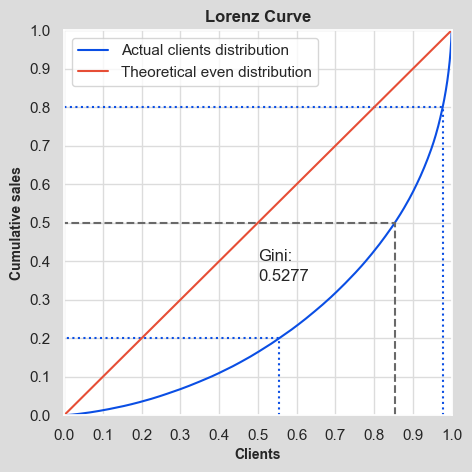

In [170]:
# plot Lorenz curve
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_gini = sns.lineplot(data=gini_data, x='client_base_1', y='lorenz_value', color=ciel, label='Actual clients distribution')
graph_gini.set_title("Lorenz Curve", fontname='Arial', fontsize=12, fontweight='bold')
plt.xlabel('Clients', fontweight='bold' , fontsize=10)
plt.ylabel("Cumulative sales", fontweight='bold', fontsize=10)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], rotation=0)
plt.xlim([0,1])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.ylim([0, 1])
plt.grid(axis='both', color='gainsboro')

# add text inside the plot
plt.text(0.50, 0.40, 'Gini:',fontsize=12)
plt.text(0.50, 0.35, round(gini,4), fontsize=12)

# plot 20-80 lines for readability
x_20 = [product20, product20, 0]
y_20 = [0, lorenz20, lorenz20]
plt.plot(x_20, y_20, linestyle='dotted', color=ciel)
x_80 = [product80, product80, 0]
y_80 = [0, lorenz80, lorenz80]
plt.plot(x_80, y_80, linestyle='dotted', color=ciel)

# plot mediale
x_50 = [product50, product50, 0]
y_50 = [0, lorenz50, lorenz50]
plt.plot(x_50, y_50, linestyle='dashed', color='dimgrey')

# plot first bisector
origin = [0, 0]
limit = [1, 1]
x_values = [origin[0], limit[0]]
y_values = [origin[1], limit[1]]
plt.plot(x_values, y_values, cherry, label='Theoretical even distribution')
plt.legend(loc="upper left")

plt.savefig("graph_gini_1.png", bbox_inches='tight')
plt.show()

**The distribution of total sales among clients is very unequal ; 55% of clients make the first 20% of total sales, the medial sales are achieved with 85% of clients, and it takes 97% of clients to achieve 80% of total sales. This indicated a very fragmented customer base with a lot of small purchases and relatively few good, returning clients with large total purchase amounts. Clustering will need to identify these client categories.**

### 4.1.2 - For total products sold

In [171]:
grouped_data.head()

customer_id state  capital   altitude      c_lat  \
0  00012a2ce6f8dcda20d059ce98491703    SP    False  742.96640 -23.499149   
1  000161a058600d5901f007fab4c27140    MG    False  834.18050 -20.469287   
2  0001fd6190edaaf884bcaf3d49edf079    ES    False   71.61210 -18.705854   
3  0002414f95344307404f0ace7a26f1d5    MG    False  740.82677 -21.770599   
4  000379cdec625522490c315e70c7a9fb    SP     True  783.61510 -23.738685   

       c_lon  pop_density  motor_vehicles  GDP_per_capita  post_offices  \
0 -46.767812    30.510000     3282.000000     6556.155000      1.000000   
1 -45.123459    11.700000     2842.000000    22740.555000      1.000000   
2 -40.404629    15.400000     8254.000000    12271.900000      1.500000   
3 -43.355230    91.218631     9820.626846    19464.896791      1.771475   
4 -46.689358    81.590000    11148.000000    27499.805000      1.000000   

   HDI_index  tax_gdp_%  nb_of_orders  total_spent  total_freight  \
0    0.55800   4.040000           1.0        89.80          24.94   
1    0.64900   4.820000           1.0        54.90          12.51   
2    0.63500   7.230000           1.0       179.99          15.43   
3    0.65291   5.320694           1.0       149.90          29.45   
4    0.70200   1.850000           1.0        93.00          14.01   

   total_products  product_weight_avg  review_score_avg pmt_type_mode  \
0               1              4267.0               1.0   credit_card   
1               1               150.0               4.0   credit_card   
2               1               750.0               5.0   credit_card   
3               1              1600.0               5.0        boleto   
4               1               800.0               4.0        boleto   

   pmt_installments_avg  shipping_distance_avg  review_delay_days_avg  \
0                   8.0             120.134678                    1.0   
1                   5.0             133.832239                    1.0   
2                  10.0             552.074983                    1.0   
3                   1.0             834.406263                    1.0   
4                   1.0             310.969235                    1.0   

    product_group_mode last_order_date  delivery_timeframe_avg  \
0      household_items      2017-11-14                    17.0   
1  discretionary_items      2017-07-16                    14.0   
2      household_items      2017-02-28                    14.0   
3  discretionary_items      2017-08-16                    28.5   
4      household_items      2018-04-02                    13.5   

   order_arrived_late  weekend_shopping  evening_shopping  \
0                True             False             False   
1                True              True             False   
2                True             False             False   
3                True             False             False   
4                True             False             False   

   cust_reviewed_order  desc_and_photos  product_volume_m3  \
0                 True             True             3.9468   
1                False             True             0.0352   
2                 True             True             1.6905   
3                False             True             2.8800   
4                False             True             1.5300   

   shipping_delay_days_avg  last_order_age_in_days  average_basket  \
0                     -4.0                   288.0           89.80   
1                     -1.0                   409.0           54.90   
2                     -5.0                   547.0          179.99   
3                     -4.0                   378.0          149.90   
4                     -6.0                   149.0           93.00   

   purchase_frequency  
0                 0.5  
1                 0.5  
2                 0.5  
3                 0.5  
4                 0.5

In [172]:
# create data for Gini-Lorenz graph
# nb_cli = grouped_data.shape[0]
prods_tot = grouped_data['total_products'].sum()
gini_data_2 = grouped_data[['customer_id', 'total_products']].copy()
gini_data_2 = gini_data_2.sort_values(by='total_products', ascending=True)
gini_data_2['products_sold_cum'] = np.cumsum(gini_data_2['total_products'])
gini_data_2['lorenz_value'] = gini_data_2['products_sold_cum'] / prods_tot
gini_data_2['client_count'] = np.arange(gini_data_2.shape[0])+1
gini_data_2['client_base_1'] = gini_data_2['client_count']/nb_cli
gini_data_2.tail()

customer_id  total_products  products_sold_cum  \
16292  2ba91e12e5e4c9f56b82b86d9031d329              24             114132   
78576  d22f25a9fadfb1abbc2e29395b1239f4              24             114156   
54626  92cd3ec6e2d643d4ebd0e3d6238f69e2              26             114182   
7279   13aa59158da63ba0e93ec6ac2c07aacb              38             114220   
14577  270c23a11d024a44c896d1894b261a83              63             114283   

       lorenz_value  client_count  client_base_1  
16292      0.998679         95336       0.999958  
78576      0.998889         95337       0.999969  
54626      0.999116         95338       0.999979  
7279       0.999449         95339       0.999990  
14577      1.000000         95340       1.000000

In [173]:
# calculate area under Lorenz curve
area_2 = gini_data_2['lorenz_value'].sum() / nb_cli

# calculate Gini coefficient
S_2 = (0.5 - area_2)
gini_2 = S_2 * 2
display('Coefficient de Gini:', round(gini_2, 4))

'Coefficient de Gini:'

0.1503

In [174]:
# create data for 80-20 dotted line plot
# 80% du CA cumule
LG_sort80_2 = gini_data_2.iloc[(gini_data_2['lorenz_value']-0.8).abs().argsort()[:1]]

# for values
lorenz80_2 = LG_sort80_2['lorenz_value'].tolist()[0]

# for index
index80_2 = LG_sort80_2.index.tolist()[0]

# % produits correspondants a 80% du CA cumule
product80_2 = gini_data_2.loc[index80_2, 'client_base_1']

# 20% du CA cumule
LG_sort20_2 = gini_data_2.iloc[(gini_data_2['lorenz_value']-0.2).abs().argsort()[:1]]

# for values
lorenz20_2 = LG_sort20_2['lorenz_value'].tolist()[0]

# for index
index20_2 = LG_sort20_2.index.tolist()[0]

# % produits correspondants a 20% du CA cumule
product20_2 = gini_data_2.loc[index20_2, 'client_base_1']

print('lorenz80 = ', lorenz80_2, '\nindex80 = ', index80_2, '\nproduct80 = ', product80_2, '\nlorenz20 = ',
      lorenz20_2, '\nindex20 = ', index20_2, '\nproduct20 = ', product20_2)

# create data for medial
# 50% du CA cumule
LG_sort50_2 = gini_data_2.iloc[(gini_data_2['lorenz_value']-0.5).abs().argsort()[:1]]


# for values
lorenz50_2 = LG_sort50_2['lorenz_value'].tolist()[0]

# for index
index50_2 = LG_sort50_2.index.tolist()[0]

# % produits correspondants a 80% du CA cumule
product50_2 = gini_data_2.loc[index50_2, 'client_base_1']

print("Chiffre d'affaires medial atteint avec", round(product50_2*100, 2), "% des clients.")

lorenz80 =  0.799996499916873 
index80 =  12371 
product80 =  0.9139920285294735 
lorenz20 =  0.20000350008312698 
index20 =  87103 
product20 =  0.23974197608558842
Chiffre d'affaires medial atteint avec 59.93 % des clients.


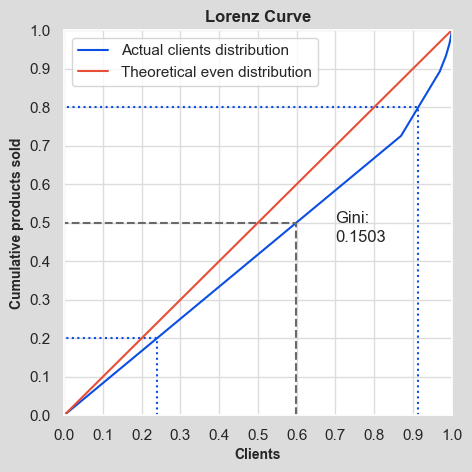

In [175]:
# plot Lorenz curve
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_gini = sns.lineplot(data=gini_data_2, x='client_base_1', y='lorenz_value', color=ciel, label='Actual clients distribution')
graph_gini.set_title("Lorenz Curve", fontname='Arial', fontsize=12, fontweight='bold')
plt.xlabel('Clients', fontweight='bold' , fontsize=10)
plt.ylabel("Cumulative products sold", fontweight='bold', fontsize=10)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], rotation=0)
plt.xlim([0,1])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.ylim([0, 1])
plt.grid(axis='both', color='gainsboro')

# add text inside the plot
plt.text(0.70, 0.50, 'Gini:',fontsize=12)
plt.text(0.70, 0.45, round(gini_2,4), fontsize=12)

# plot 20-80 lines for readability
x_20_2 = [product20_2, product20_2, 0]
y_20_2 = [0, lorenz20_2, lorenz20_2]
plt.plot(x_20_2, y_20_2, linestyle='dotted', color=ciel)
x_80_2 = [product80_2, product80_2, 0]
y_80_2 = [0, lorenz80_2, lorenz80_2]
plt.plot(x_80_2, y_80_2, linestyle='dotted', color=ciel)

# plot mediale
x_50_2 = [product50_2, product50_2, 0]
y_50_2 = [0, lorenz50_2, lorenz50_2]
plt.plot(x_50_2, y_50_2, linestyle='dashed', color='dimgrey')

# plot first bisector
origin = [0, 0]
limit = [1, 1]
x_values = [origin[0], limit[0]]
y_values = [origin[1], limit[1]]
plt.plot(x_values, y_values, cherry, label='Theoretical even distribution')
plt.legend(loc="upper left")

plt.savefig("graph_gini_2.png", bbox_inches='tight')
plt.show()

**The distribution of clients in terms of numbers of products sold is fairly close to a theoretical even distribution, with a fairly low Gini index.**

## 4.2 - Correlations analysis

### 4.2.1 - Normality & Skew

In [176]:
merged_data_trim.head()

sh_customer_id  sh_status      c_lat      c_lon  \
0  9ef432eb6251297304e76186b10a928d  delivered -23.577622 -46.587055   
1  9ef432eb6251297304e76186b10a928d  delivered -23.577622 -46.587055   
2  9ef432eb6251297304e76186b10a928d  delivered -23.577622 -46.587055   
3  b0830fb4747a6c6d20dea0b8c802d7ef  delivered -12.186877 -44.540232   
4  41ce2a54c0b03bf3443c3d931a367089  delivered -16.745150 -48.514783   

  g_state_x capital_x  altitude_x  pop_density_x  motor_vehicles_x  \
0        SP      True    783.6151       81.59000      11148.000000   
1        SP      True    783.6151       81.59000      11148.000000   
2        SP      True    783.6151       81.59000      11148.000000   
3        BA     False    441.9978       60.80000       5560.000000   
4        GO     False   1003.0870       85.44643      16155.977181   

   GDP_per_capita_x  post_offices_x  HDI_index_x  tax_gdp_%_x  \
0      27499.805000        1.000000     0.702000     1.850000   
1      27499.805000        1.000000     0.702000     1.850000   
2      27499.805000        1.000000     0.702000     1.850000   
3      16574.305000        1.000000     0.614500     1.970000   
4      19772.716799        1.895553     0.653236     7.193557   

                         b_order_id  b_price  b_freight_value  \
0  e481f51cbdc54678b7cc49136f2d6af7    29.99             8.72   
1  e481f51cbdc54678b7cc49136f2d6af7    29.99             8.72   
2  e481f51cbdc54678b7cc49136f2d6af7    29.99             8.72   
3  53cdb2fc8bc7dce0b6741e2150273451   118.70            22.76   
4  47770eb9100c2d0c44946d9cf07ec65d   159.90            19.22   

                      po_product_id  po_weight  r_score  pt_pmt_type  \
0  87285b34884572647811a353c7ac498a      500.0      4.0  credit_card   
1  87285b34884572647811a353c7ac498a      500.0      4.0      voucher   
2  87285b34884572647811a353c7ac498a      500.0      4.0      voucher   
3  595fac2a385ac33a80bd5114aec74eb8      400.0      4.0       boleto   
4  aa4383b373c6aca5d8797843e5594415      420.0      5.0  credit_card   

   pt_pmt_installments  shipping_distance  review_delay_days  \
0                  1.0          18.526869                1.0   
1                  1.0          18.526869                1.0   
2                  1.0          18.526869                1.0   
3                  1.0         849.520470                1.0   
4                  3.0         514.407596                1.0   

         product_group sh_order_time_date  delivery_timeframe_avg  \
0      household_items         2017-10-02                    12.0   
1      household_items         2017-10-02                    12.0   
2      household_items         2017-10-02                    12.0   
3  discretionary_items         2018-07-24                    17.0   
4      household_items         2018-08-08                    18.0   

  order_arrived_late weekend_shopping evening_shopping cust_reviewed_order  \
0               True            False            False                True   
1               True            False            False                True   
2               True            False            False                True   
3               True            False             True                True   
4               True            False            False               False   

  product_has_description product_has_photos  product_volume_m3  \
0                    True               True             0.1976   
1                    True               True             0.1976   
2                    True               True             0.1976   
3                    True               True             0.4693   
4                    True               True             0.9576   

   shipping_delay_days  order_age_in_days  
0                 -2.0              331.0  
1                 -2.0              331.0  
2                 -2.0              331.0  
3                 -4.0               36.0  
4                 -5.0               21.0

In [177]:
merged_data_trim.columns

Index(['sh_customer_id', 'sh_status', 'c_lat', 'c_lon', 'g_state_x',
       'capital_x', 'altitude_x', 'pop_density_x', 'motor_vehicles_x',
       'GDP_per_capita_x', 'post_offices_x', 'HDI_index_x', 'tax_gdp_%_x',
       'b_order_id', 'b_price', 'b_freight_value', 'po_product_id',
       'po_weight', 'r_score', 'pt_pmt_type', 'pt_pmt_installments',
       'shipping_distance', 'review_delay_days', 'product_group',
       'sh_order_time_date', 'delivery_timeframe_avg', 'order_arrived_late',
       'weekend_shopping', 'evening_shopping', 'cust_reviewed_order',
       'product_has_description', 'product_has_photos', 'product_volume_m3',
       'shipping_delay_days', 'order_age_in_days'],
      dtype='object')

In [178]:
data_pairs = merged_data_trim.drop(labels=['sh_customer_id', 'sh_status', 'g_state_x', 'po_product_id', 'capital_x',
                                           'post_offices_x', 'r_score', 'pt_pmt_installments', 'pt_pmt_type', 'product_group',
                                           'review_delay_days','delivery_timeframe_avg', 'order_arrived_late', 'weekend_shopping',
                                           'evening_shopping', 'cust_reviewed_order', 'product_has_description', 
                                           'product_has_photos', 'shipping_delay_days','order_age_in_days', 'sh_order_time_date',
                                           'b_order_id'], axis=1)
data_pairs.head()

c_lat      c_lon  altitude_x  pop_density_x  motor_vehicles_x  \
0 -23.577622 -46.587055    783.6151       81.59000      11148.000000   
1 -23.577622 -46.587055    783.6151       81.59000      11148.000000   
2 -23.577622 -46.587055    783.6151       81.59000      11148.000000   
3 -12.186877 -44.540232    441.9978       60.80000       5560.000000   
4 -16.745150 -48.514783   1003.0870       85.44643      16155.977181   

   GDP_per_capita_x  HDI_index_x  tax_gdp_%_x  b_price  b_freight_value  \
0      27499.805000     0.702000     1.850000    29.99             8.72   
1      27499.805000     0.702000     1.850000    29.99             8.72   
2      27499.805000     0.702000     1.850000    29.99             8.72   
3      16574.305000     0.614500     1.970000   118.70            22.76   
4      19772.716799     0.653236     7.193557   159.90            19.22   

   po_weight  shipping_distance  product_volume_m3  
0      500.0          18.526869             0.1976  
1      500.0          18.526869             0.1976  
2      500.0          18.526869             0.1976  
3      400.0         849.520470             0.4693  
4      420.0         514.407596             0.9576

In [179]:
# perform Kolmogorov-Smirnov test on all continuous numerical variables
for column in data_pairs:
    print('********\n{}'.format(column))
    mu = data_pairs[column].mean()
    sigma = data_pairs[column].std()
    normed_column = (data_pairs[column] - mu) / sigma
    stat_ks, p_ks = st.kstest(normed_column, 'norm')
    
    stat_st, p_st = st.skewtest(data_pairs[column])
    
    alpha = 0.05
    print("\n Kolmogorov-Smirnov test results : \n")
    print("Statistic = {:.4f}".format(stat_ks))
    print("p-value = {:.4f}".format(p_ks))
    if p_ks < alpha:  # null hypothesis: column follows a Normal distribution
        print("Reject H0 : {} does not follow a normal distribution".format(column))
    else:
        print("Not enough information to reject H0: {} follows a normal distribution. ".format(column))
        
    print("\n Skew test results : \n")
    print("Statistic = {:.4f}".format(stat_st))
    print("p-value = {:.4f}".format(p_st))
    if p_st < alpha:  # null hypothesis: column skew is the same as a Normal distribution (about zero)
        print("Reject H0 : {} skew is not zero".format(column))
    else:
        print("Not enough information to reject H0: {} skew is zero.".format(column))

********
c_lat

 Kolmogorov-Smirnov test results : 

Statistic = 0.2143
p-value = 0.0000
Reject H0 : c_lat does not follow a normal distribution

 Skew test results : 

Statistic = 163.1103
p-value = 0.0000
Reject H0 : c_lat skew is not zero
********
c_lon

 Kolmogorov-Smirnov test results : 

Statistic = 0.1416
p-value = 0.0000
Reject H0 : c_lon does not follow a normal distribution

 Skew test results : 

Statistic = 1.6420
p-value = 0.1006
Not enough information to reject H0: c_lon skew is zero.
********
altitude_x

 Kolmogorov-Smirnov test results : 

Statistic = 0.1740
p-value = 0.0000
Reject H0 : altitude_x does not follow a normal distribution

 Skew test results : 

Statistic = -42.1596
p-value = 0.0000
Reject H0 : altitude_x skew is not zero
********
pop_density_x

 Kolmogorov-Smirnov test results : 

Statistic = 0.3941
p-value = 0.0000
Reject H0 : pop_density_x does not follow a normal distribution

 Skew test results : 

Statistic = 371.2292
p-value = 0.0000
Reject H0 : pop_

**Numerical variables generally do not follow a normal distribution and have significant skew, which will be corrected with the Power Transformer of sk-learn when standardising these features. Spearman's rho will be used to analyse correlations between these features.**

**Plot distribution of all numerical variables in dataframe:**

In [180]:
def box_and_hist_plots(df, feature, fig_num, color):
    """
    Plots a box plot and a histogram for all columns of a dataframe,
    excluding NaNs.
    """
    sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax=ax1, color=color, orient='h')
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color=color, ax=ax2)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='both', color='gainsboro')
    plt.savefig('box_and_hist_plots.png')
    plt.show() 

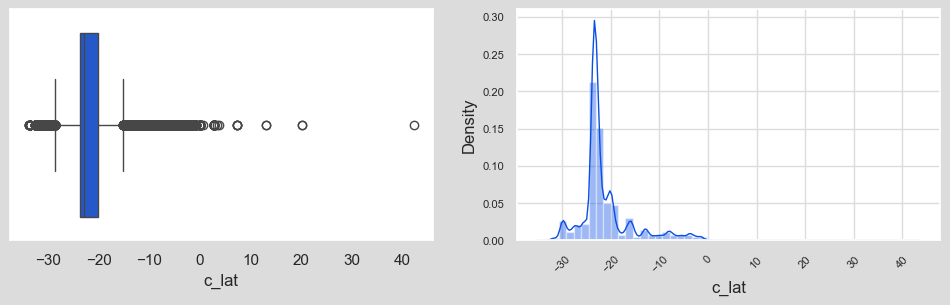

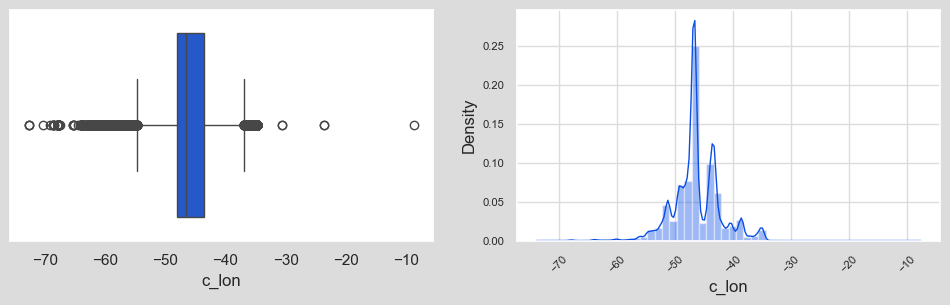

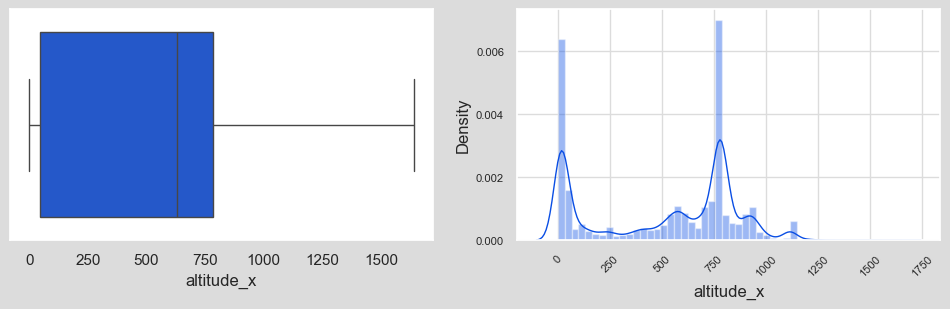

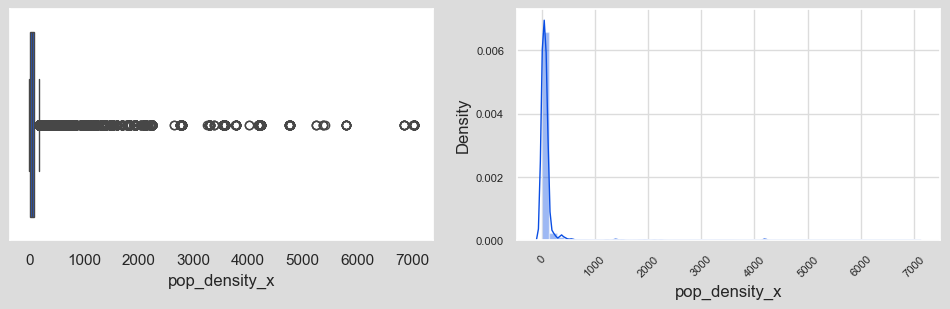

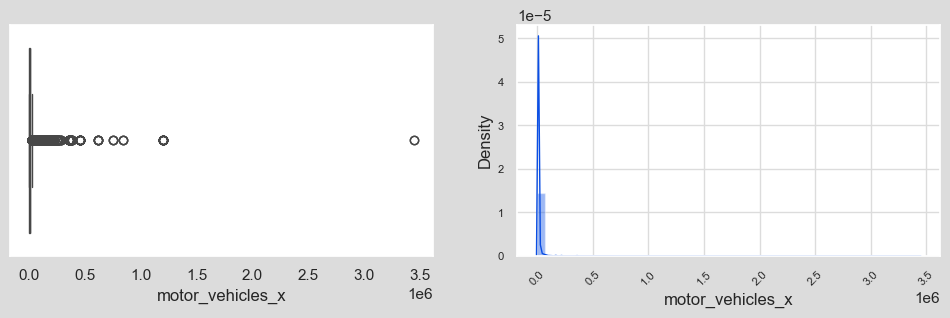

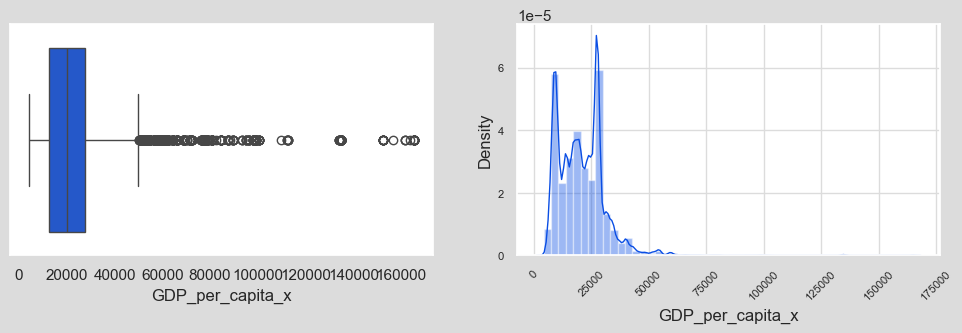

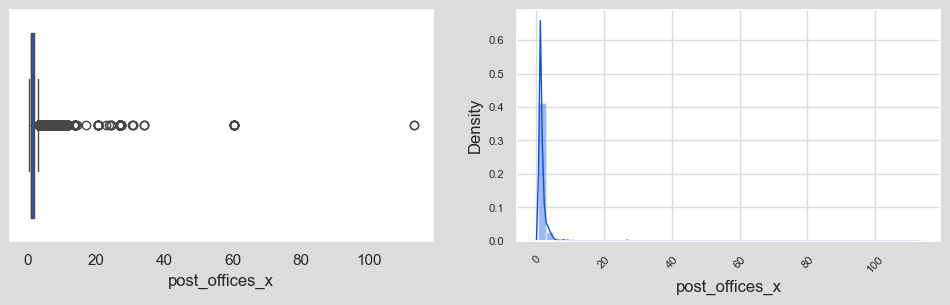

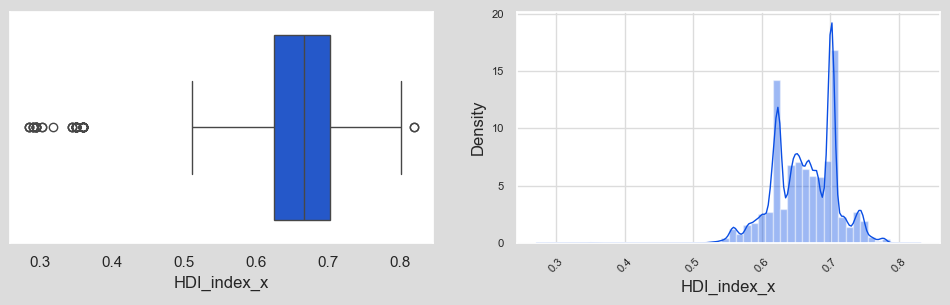

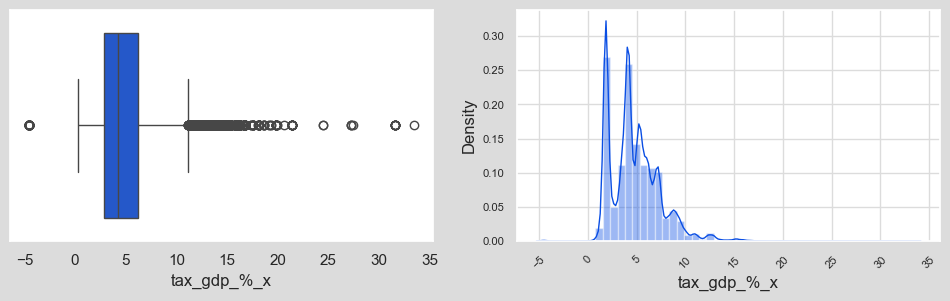

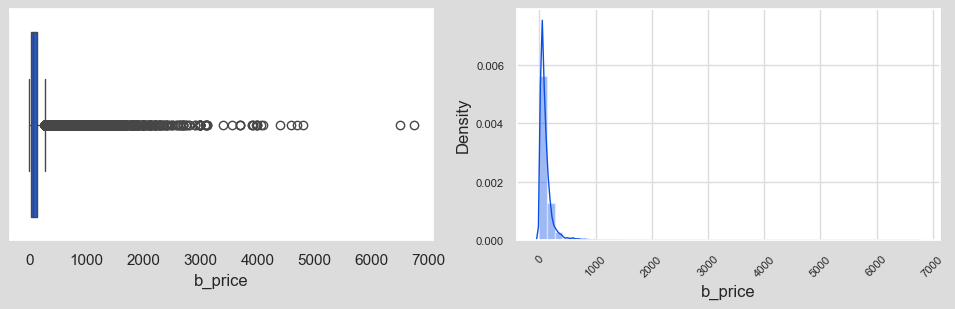

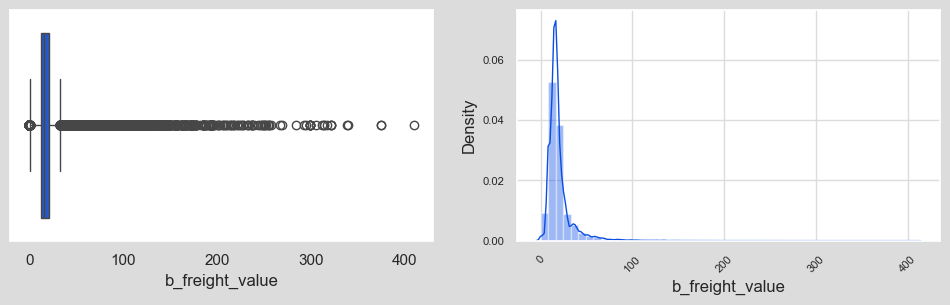

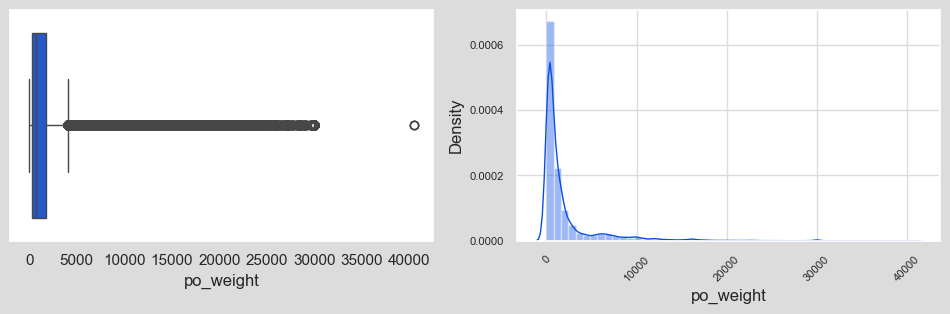

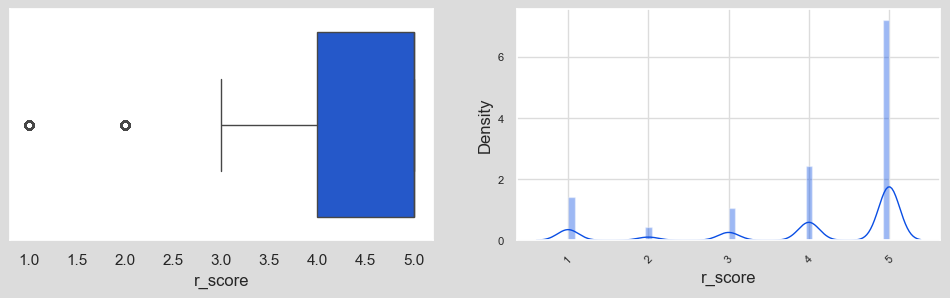

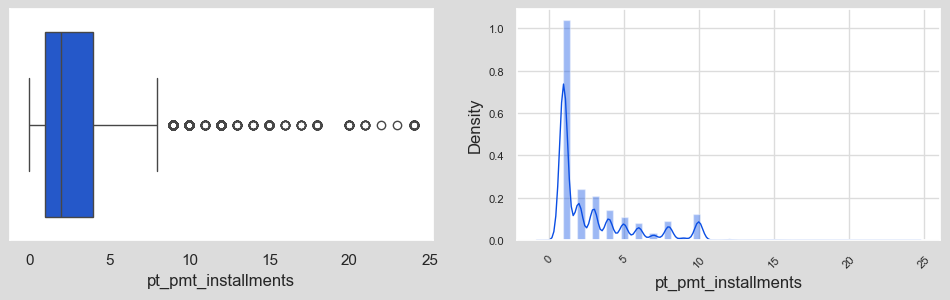

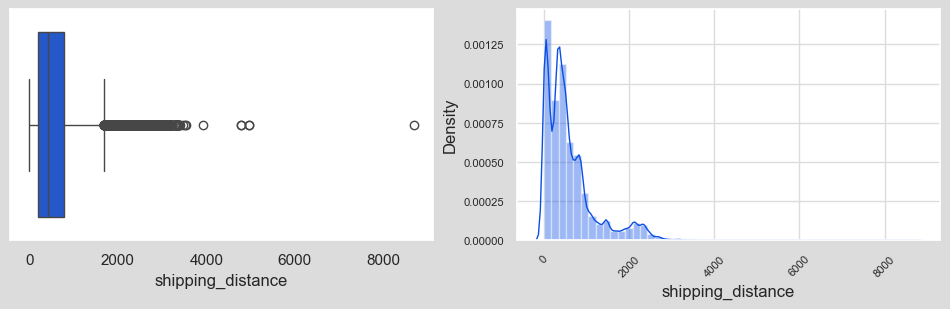

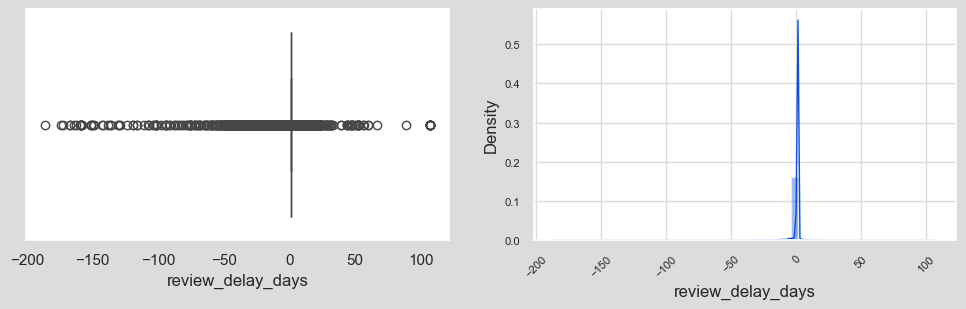

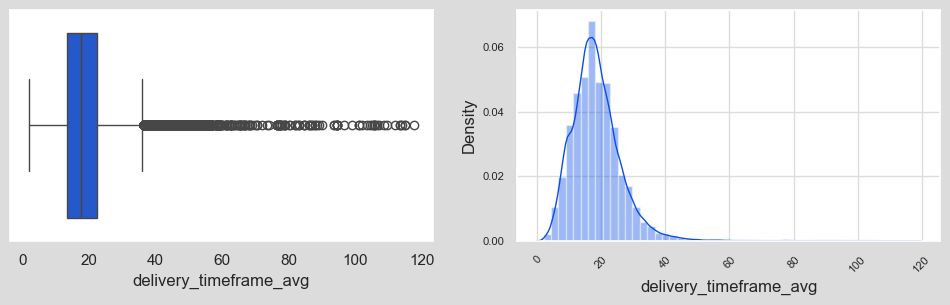

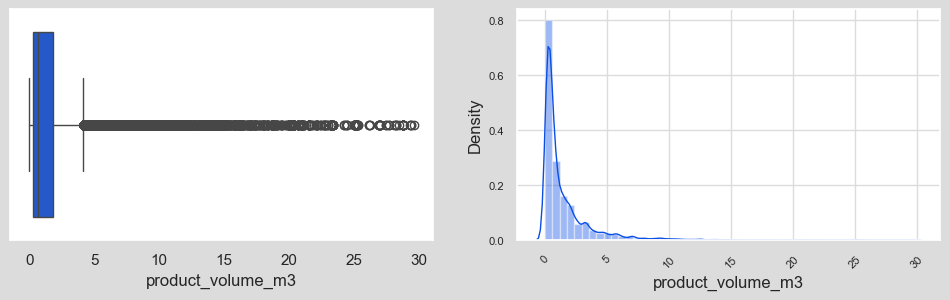

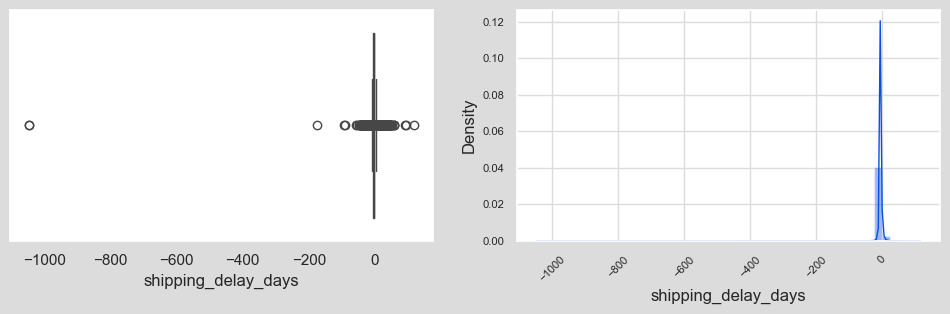

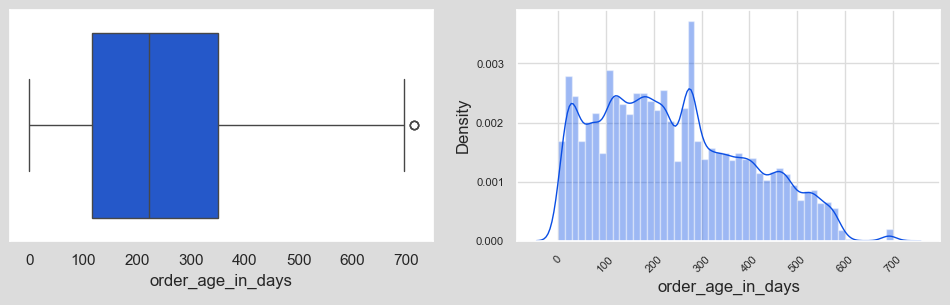

In [181]:
# box_and_hist_plots function is defined in functions.py
fig_num = 1        
for col in merged_data_trim.select_dtypes(include=[np.number]).columns:
    box_and_hist_plots(merged_data_trim, col, fig_num, ciel)
    fig_num = fig_num + 1

**Plot countplots for all categorical features in dataframe:**

In [182]:
# Creating a function to plot Count plot
def count_plot(df, feature, color):
    sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color=color)
    plt.xticks(rotation=45)
    plt.savefig('countplot.png')
    plt.show()

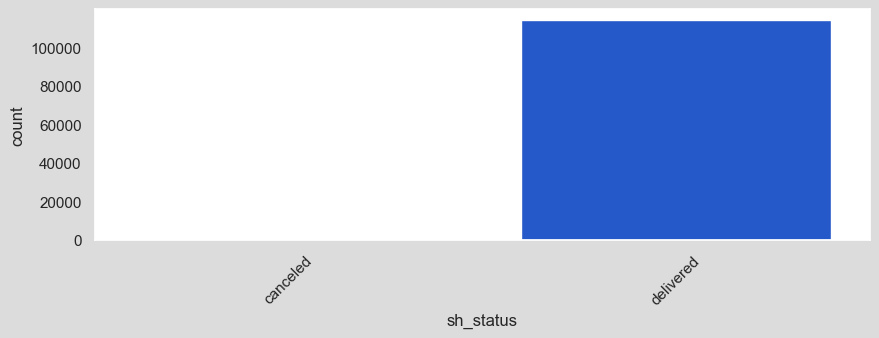

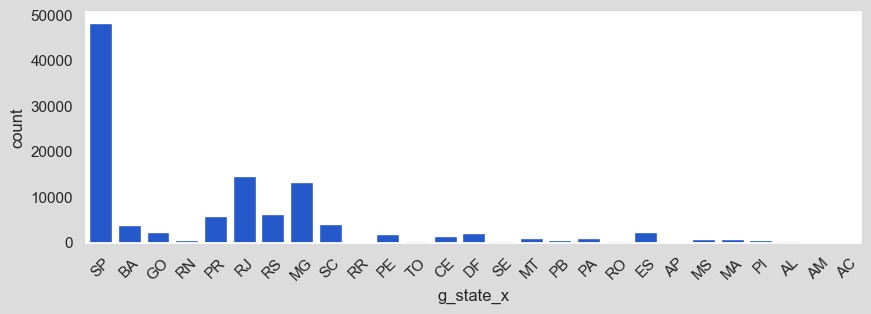

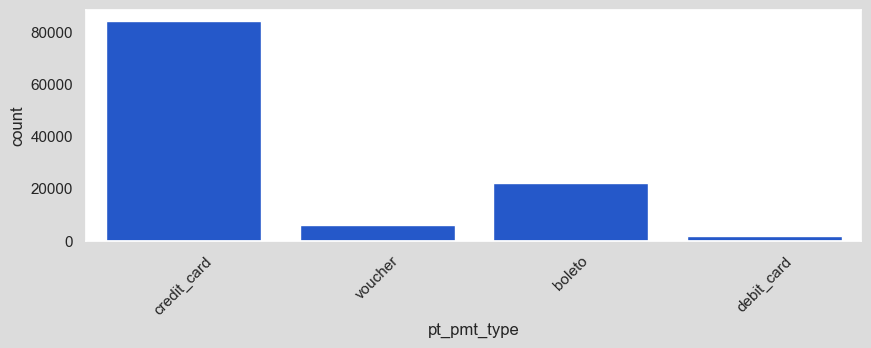

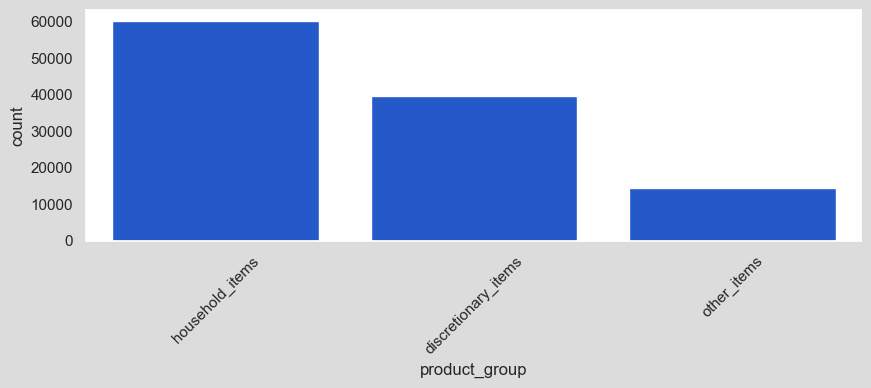

In [183]:
# cat_cols = ['sh_status', 'g_state_x', 'pt_pmt_type', 'product_family']
cat_cols = ['sh_status', 'g_state_x', 'pt_pmt_type', 'product_group']

for col in merged_data_trim[cat_cols]:
    count_plot(merged_data_trim, col, ciel)

### 4.2.2 - Correlations

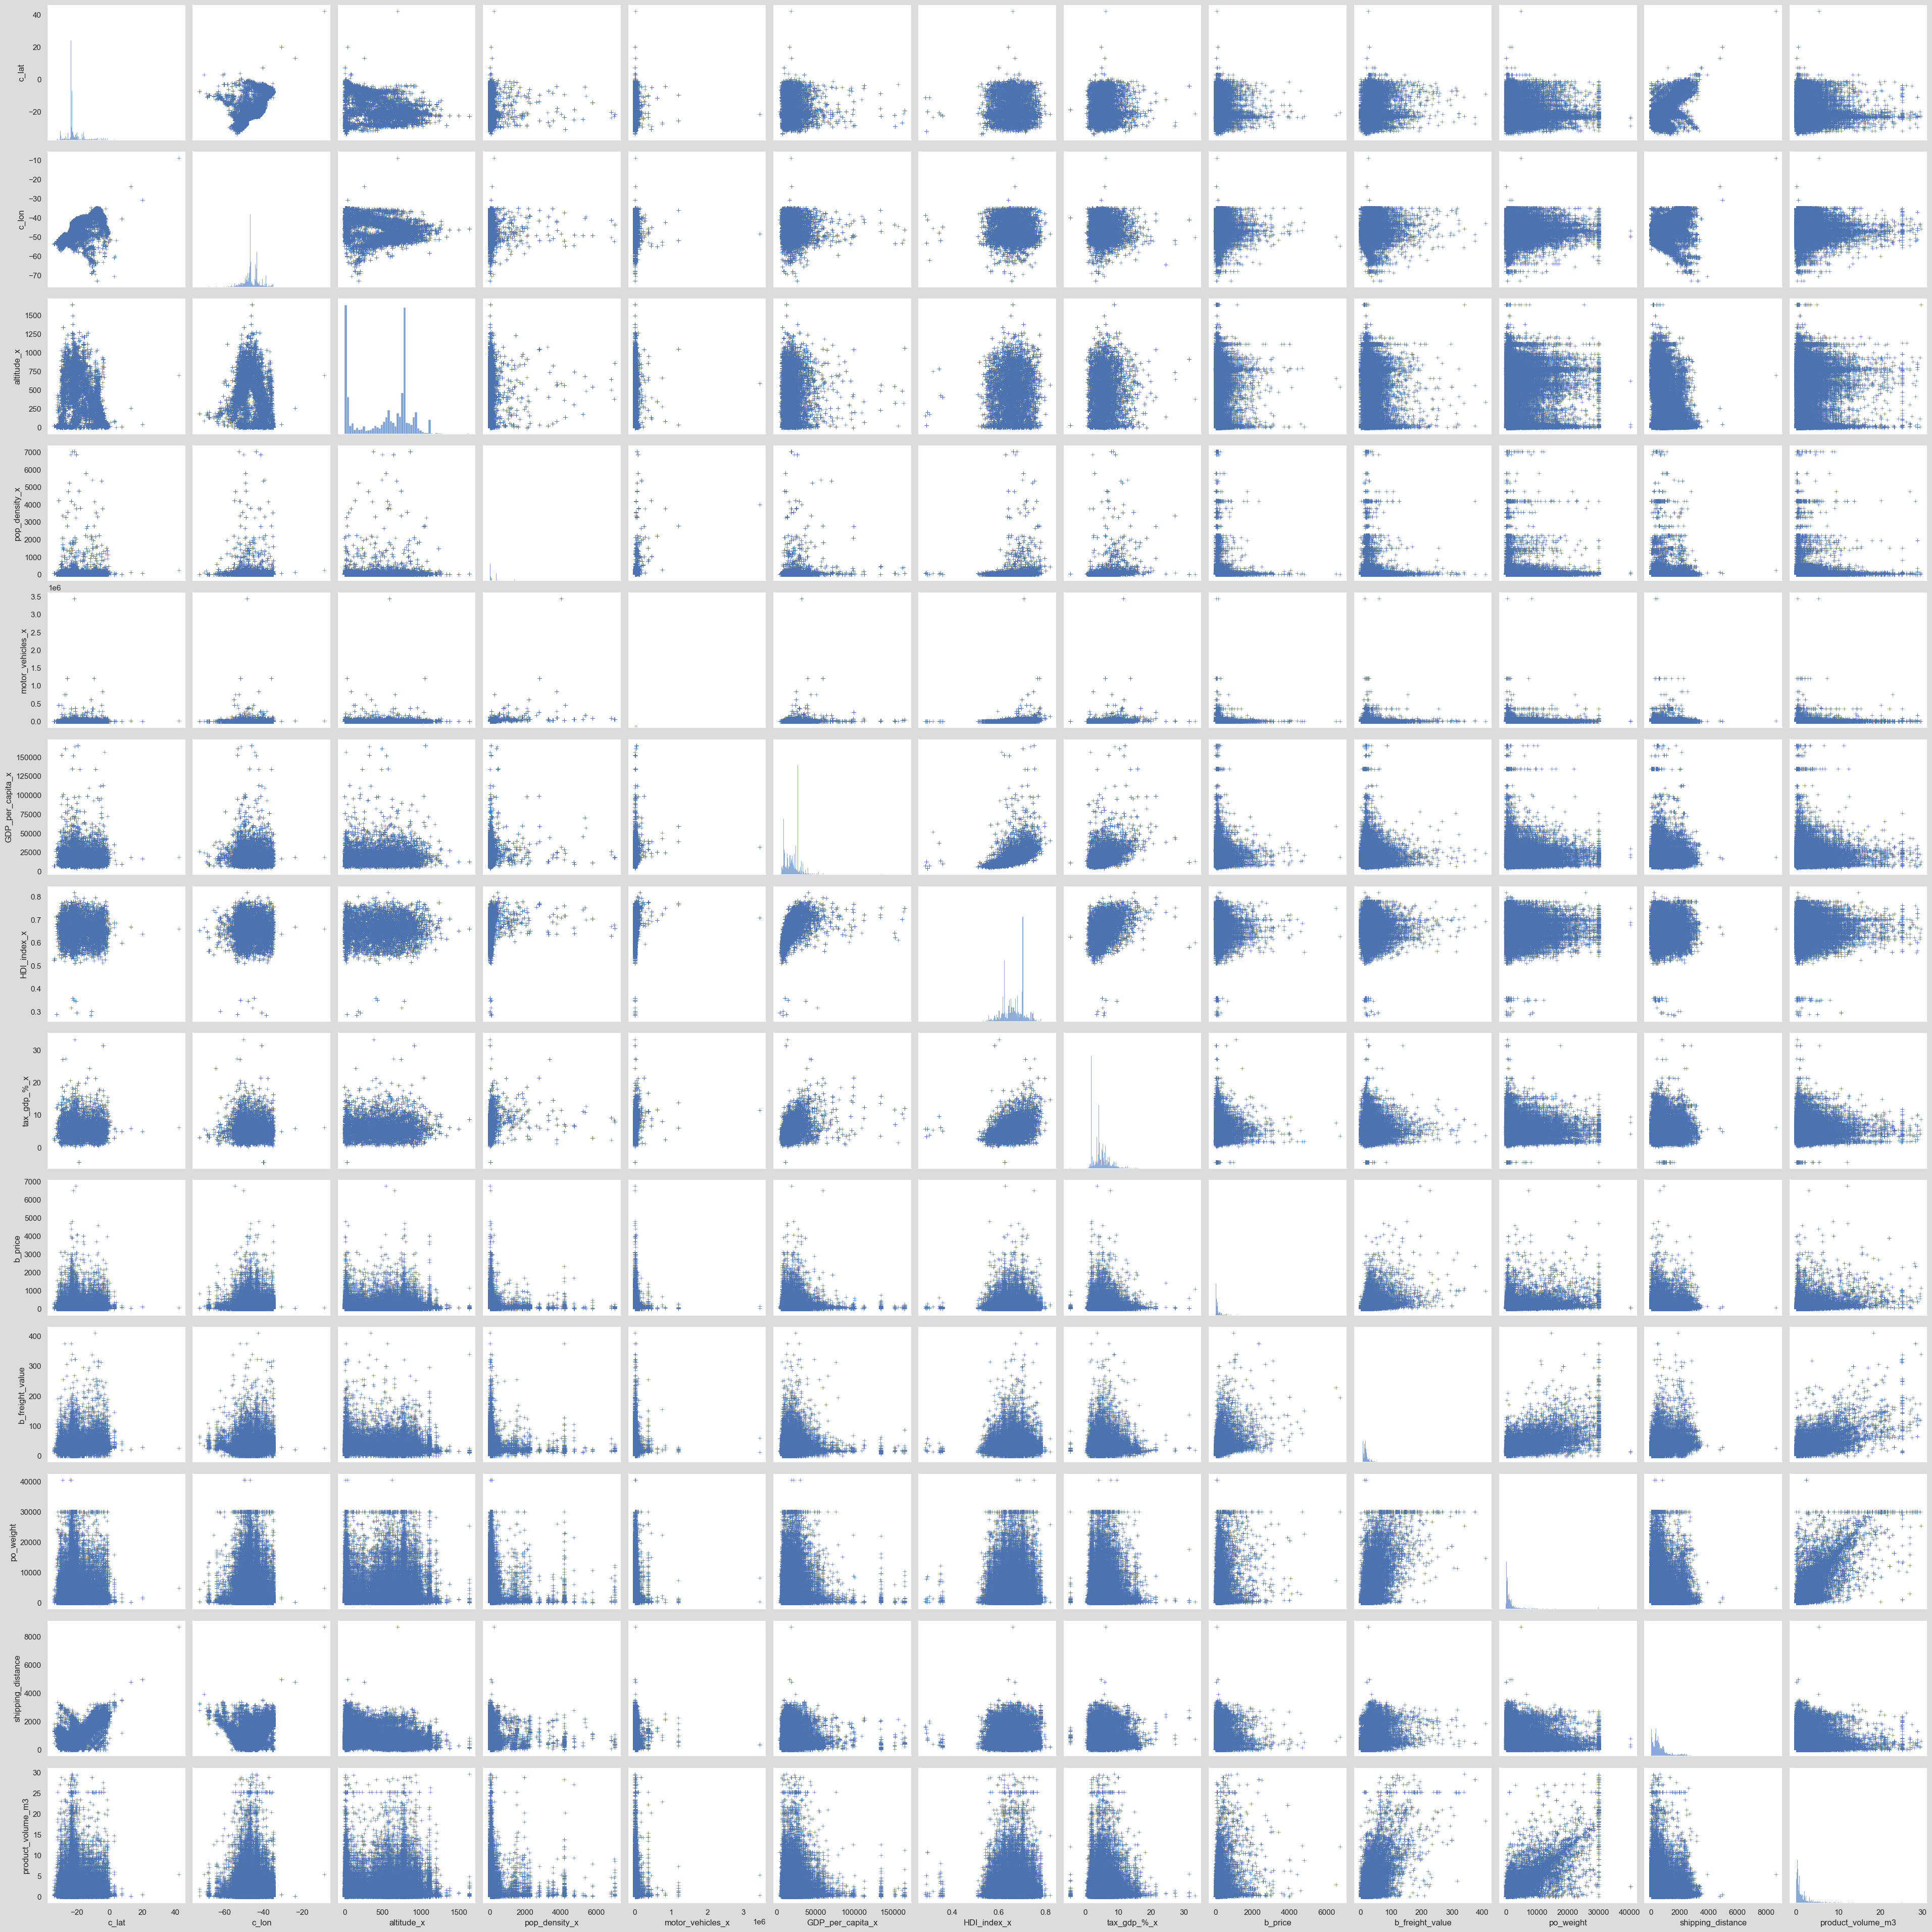

In [184]:
# compare correlation of continuous numerical variables in a pairplot
corr_pairs = sns.pairplot(data_pairs, kind='scatter', height=3, diag_kind='hist',
                          markers="+", diag_kws= {'color': '#0046AD', 'alpha': 0.5})
plt.savefig("data_pairplot.png")
plt.show()

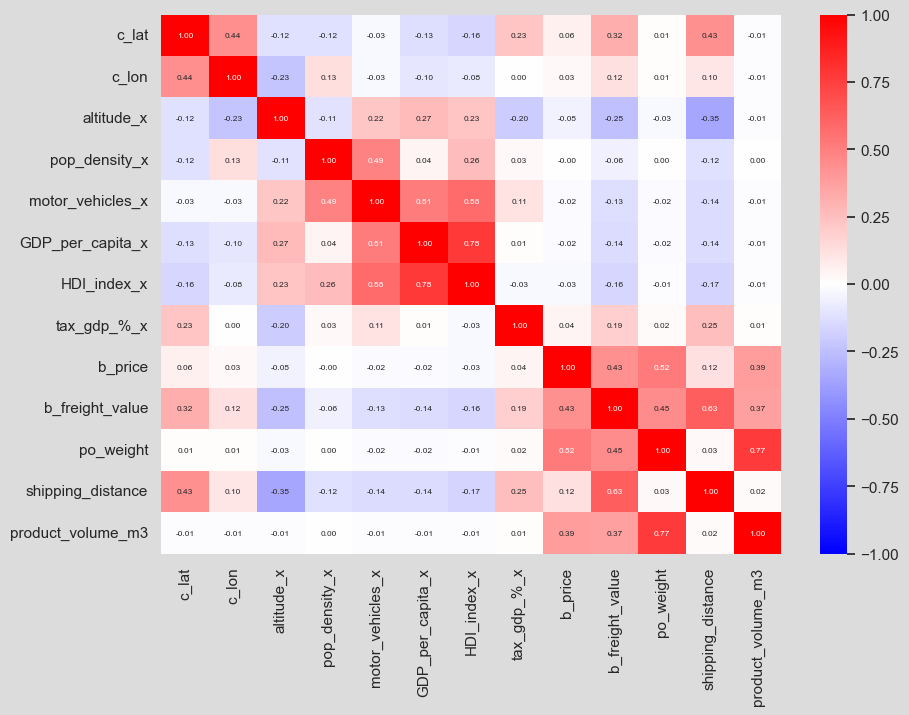

In [185]:
# use Spearman's rho for correlations as none of the variables are Gaussian
corrs_spear = data_pairs.corr(method='spearman', numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 7))
corrs_spear_heatmap = sns.heatmap(corrs_spear.round(2), vmin=-1, vmax=1, annot=True, cmap="bwr", fmt="0.2f",
                                  annot_kws={"fontsize":6})
plt.savefig("spearman_heatmap.png", bbox_inches="tight")
plt.show()

**Interpretation of Spearman's rho :**
https://www.researchgate.net/figure/Grading-table-of-Spearman-correlation-coefficient-r_tbl2_331096265

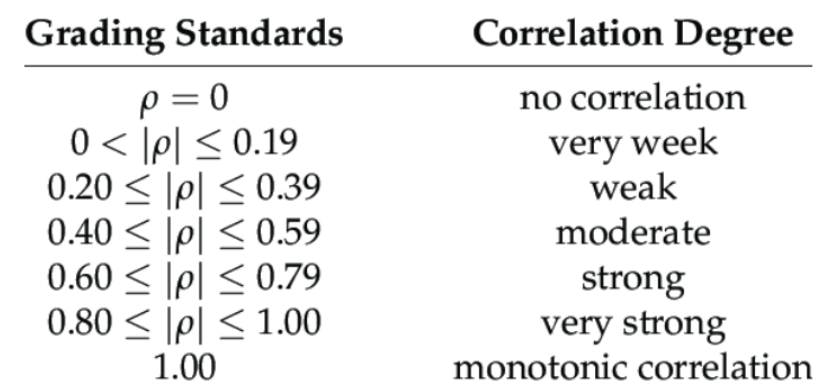

## 4.3 - Product catalogue

### 4.3.1 - Price analysis by product family

In [186]:
merged_data_trim.shape

(114283, 35)

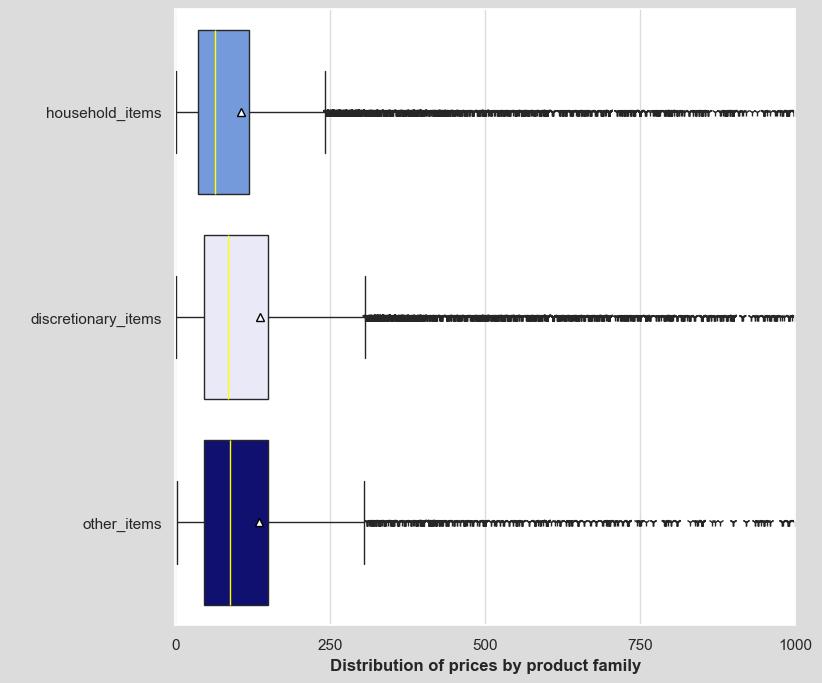

In [187]:
# analyse book prices with a box plot
sns.set(rc={'figure.figsize':(8,8),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_prods = sns.boxplot(data=merged_data_trim, y="product_group", x="b_price", hue="product_group",
                          flierprops={"marker": "1"}, medianprops={"color" : "yellow"}, meanprops={"markerfacecolor":"white",
                                                                                                   "markeredgecolor":"black"},
            orient="h", palette=['cornflowerblue', 'lavender', 'navy', 'mediumblue', 'slateblue', 'blueviolet', 'mediumorchid', 
                          'thistle', 'darkmagenta', 'fuchsia', 'deeppink', 'crimson', cherry], showmeans=True, dodge=False)
plt.xlabel('Distribution of prices by product family', fontweight='bold', fontsize=12)
plt.ylabel(' ', fontweight='bold', fontsize=12)
# plt.xticks([0, 100, 200])
plt.xticks([0, 250, 500, 750, 1000])
# plt.xlim([0, 250])
plt.xlim([0, 1000])
# plt.legend(title="Categories")
plt.grid(axis='x', color='gainsboro')
plt.savefig("graph_prods.png", bbox_inches='tight')
plt.show()

### 4.3.2 - Number of products by family

In [188]:
CA_val_pie = merged_data_trim.groupby('product_group').agg({'b_price' : ['sum'] ,'po_product_id' : ['nunique']}
                                                              ).reset_index()
CA_val_pie.rename(columns={'b_price':'turnover', 'po_product_id': 'nb_products'}, inplace=True)
CA_val_pie = CA_val_pie.droplevel(1, axis='columns')
CA_val_pie

product_group    turnover  nb_products
0  discretionary_items  5393751.99        10962
1      household_items  6338266.53        17523
2          other_items  1958813.06         3476

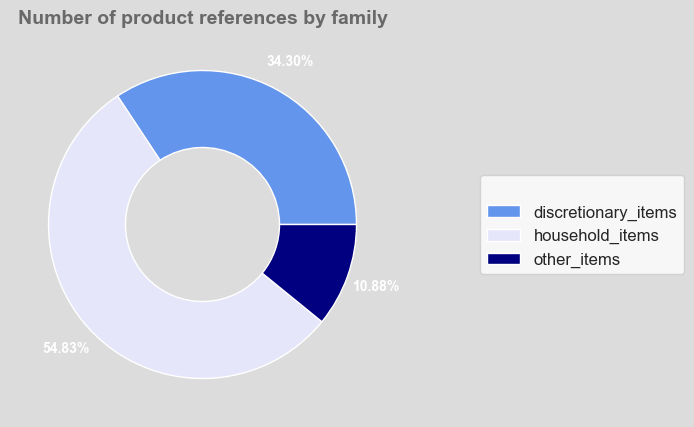

In [189]:
# pie plot references
fig, ax = plt.subplots(figsize=(5, 5))
size = 0.5
fig.set_facecolor('gainsboro')
pie_prod_cat = plt.pie(CA_val_pie['nb_products'], autopct='%1.2f%%', pctdistance=1.2, radius=1,
                   colors=['cornflowerblue', 'lavender', 'navy', 'mediumblue', 'slateblue', 'blueviolet', 'mediumorchid', 
                           'thistle', 'darkmagenta', 'fuchsia', 'deeppink', 'crimson', cherry], textprops={'fontsize': 10,
                                                                                                          'color':'white',
                                                                                                          'fontweight':'bold'}, 
                           wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(CA_val_pie["product_group"], title=" ", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1),
          fontsize=12)
ax.set_title("Number of product references by family", loc="center", fontsize=14, fontweight='bold',color='dimgrey')
plt.savefig("pie_prod_cat.png", bbox_inches='tight')
plt.show()

### 4.3.3 - Turnover by product family

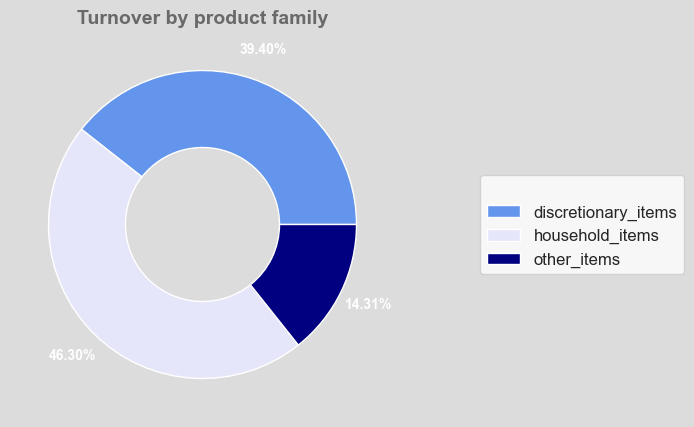

In [190]:
# pie plot references
fig, ax = plt.subplots(figsize=(5, 5))
size = 0.5
fig.set_facecolor('gainsboro')
pie_prod_sum = plt.pie(CA_val_pie['turnover'], autopct='%1.2f%%', pctdistance=1.2, radius=1,
                       colors=['cornflowerblue', 'lavender', 'navy', 'mediumblue', 'slateblue', 'blueviolet', 'mediumorchid',
                       'thistle', 'darkmagenta', 'fuchsia', 'deeppink', 'crimson', cherry], textprops={'fontsize': 10,
                                                                                                          'color':'white',
                                                                                                          'fontweight':'bold'}, 
                       wedgeprops=dict(width=size, edgecolor='w'))
ax.legend(CA_val_pie["product_group"], title=" ", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1),
          fontsize=12)
ax.set_title("Turnover by product family", loc="center", fontsize=14, fontweight='bold', color='dimgrey')
plt.savefig("pie_prod_sum.png", bbox_inches='tight')
plt.show()

## 4.4 - Sales & payments

### 4.4.1 - Total daily turnover

In [191]:
# calculate daily turnover
daily_CA = merged_data_trim.groupby(['sh_order_time_date'])['b_price'].sum().reset_index()
daily_CA.head()

sh_order_time_date  b_price
0         2016-09-15   134.97
1         2016-10-03   463.48
2         2016-10-04  9143.19
3         2016-10-05  6329.57
4         2016-10-06  5889.96

In [192]:
daily_CA.rename(columns={'b_price': 'daily_CA', 'sh_order_time_date': 'date_only_sales'}, inplace=True)

In [193]:
# calculate rolling averages
daily_CA['SMA_weekly'] = daily_CA['daily_CA'].rolling(7, min_periods=1).mean()
daily_CA['SMA_monthly'] = daily_CA['daily_CA'].rolling(30, min_periods=1).mean()
daily_CA['SMA_quarterly'] = daily_CA['daily_CA'].rolling(90, min_periods=1).mean()
daily_CA['SMA_yearly'] = daily_CA['daily_CA'].rolling(360, min_periods=1).mean()

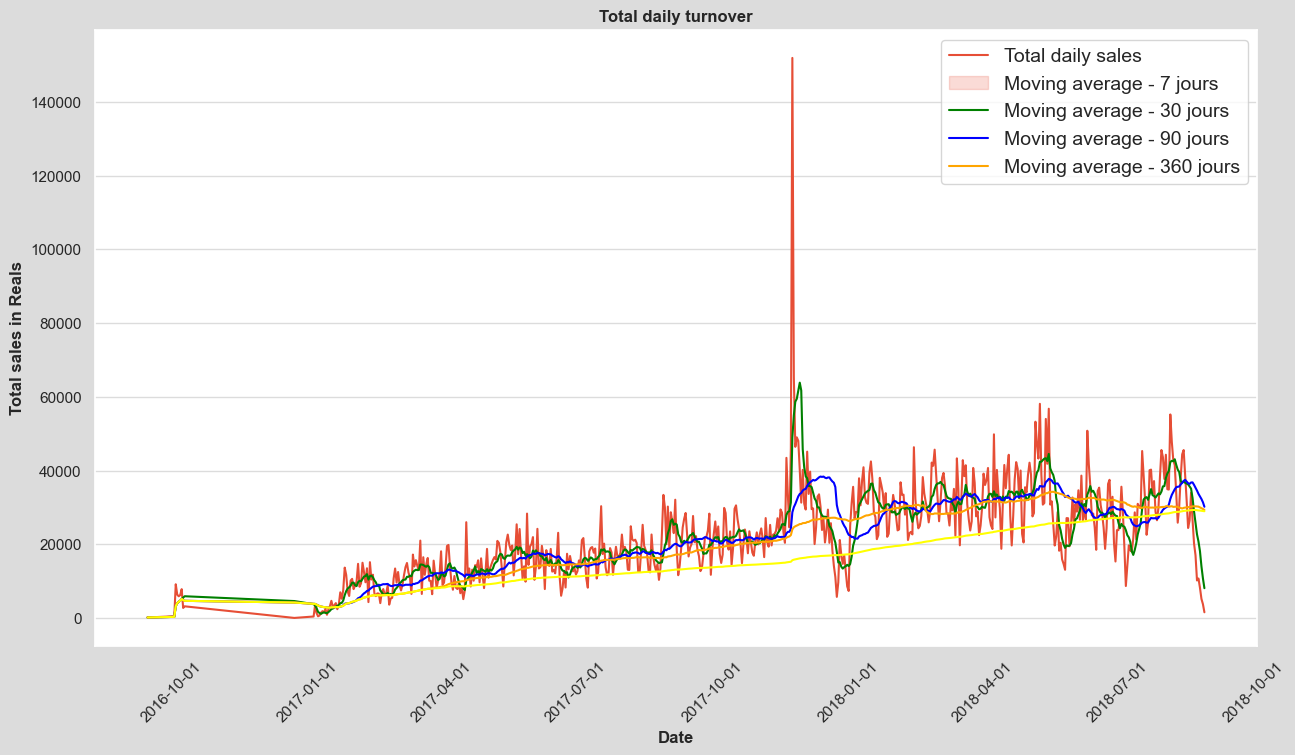

In [194]:
# plot total daily turnover
sns.set(rc={'figure.figsize':(15,8),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_mov_avg = sns.lineplot(data=daily_CA, x='date_only_sales', y='daily_CA',color=cherry)
graph_mov_avg.set_title("Total daily turnover", fontname = 'Arial',fontsize = 12, fontweight = 'bold')
plt.xticks(['2016-10', '2017-01', '2017-04', '2017-07', '2017-10', '2018-01', '2018-04', '2018-07', '2018-10'], rotation=45)
# plt.yticks([0,5000,10000,15000])
# plt.xlim([dt.date(2021, 4, 1), dt.date(2023, 3, 1)])
plt.xlabel('Date', fontweight='bold', fontsize='12')
plt.ylabel("Total sales in Reals", fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.plot(daily_CA['date_only_sales'],daily_CA['SMA_weekly'], color = 'green')
plt.plot(daily_CA['date_only_sales'],daily_CA['SMA_monthly'], color = 'blue')
plt.plot(daily_CA['date_only_sales'],daily_CA['SMA_quarterly'], color = 'orange')
plt.plot(daily_CA['date_only_sales'],daily_CA['SMA_yearly'], color = 'yellow')
plt.legend(labels=['Total daily sales', 'Moving average - 7 jours', 'Moving average - 30 jours','Moving average - 90 jours',
                    'Moving average - 360 jours'], fontsize=14)
plt.savefig("graph_mov_avg.png", bbox_inches='tight')

### 4.4.2 - Daily turnover by product category

In [195]:
# calculate daily turnover by product category
daily_cat_CA = merged_data_trim.groupby(['sh_order_time_date', 'product_group'])['b_price'].sum().reset_index()
daily_cat_CA.head()

sh_order_time_date        product_group  b_price
0         2016-09-15  discretionary_items   134.97
1         2016-10-03  discretionary_items   139.78
2         2016-10-03      household_items   323.70
3         2016-10-04  discretionary_items  4715.66
4         2016-10-04      household_items  4219.55

In [196]:
daily_cat_CA.rename(columns={'b_price': 'daily_cat_CA', 'sh_order_time_date':'date_only_sales'}, inplace=True)

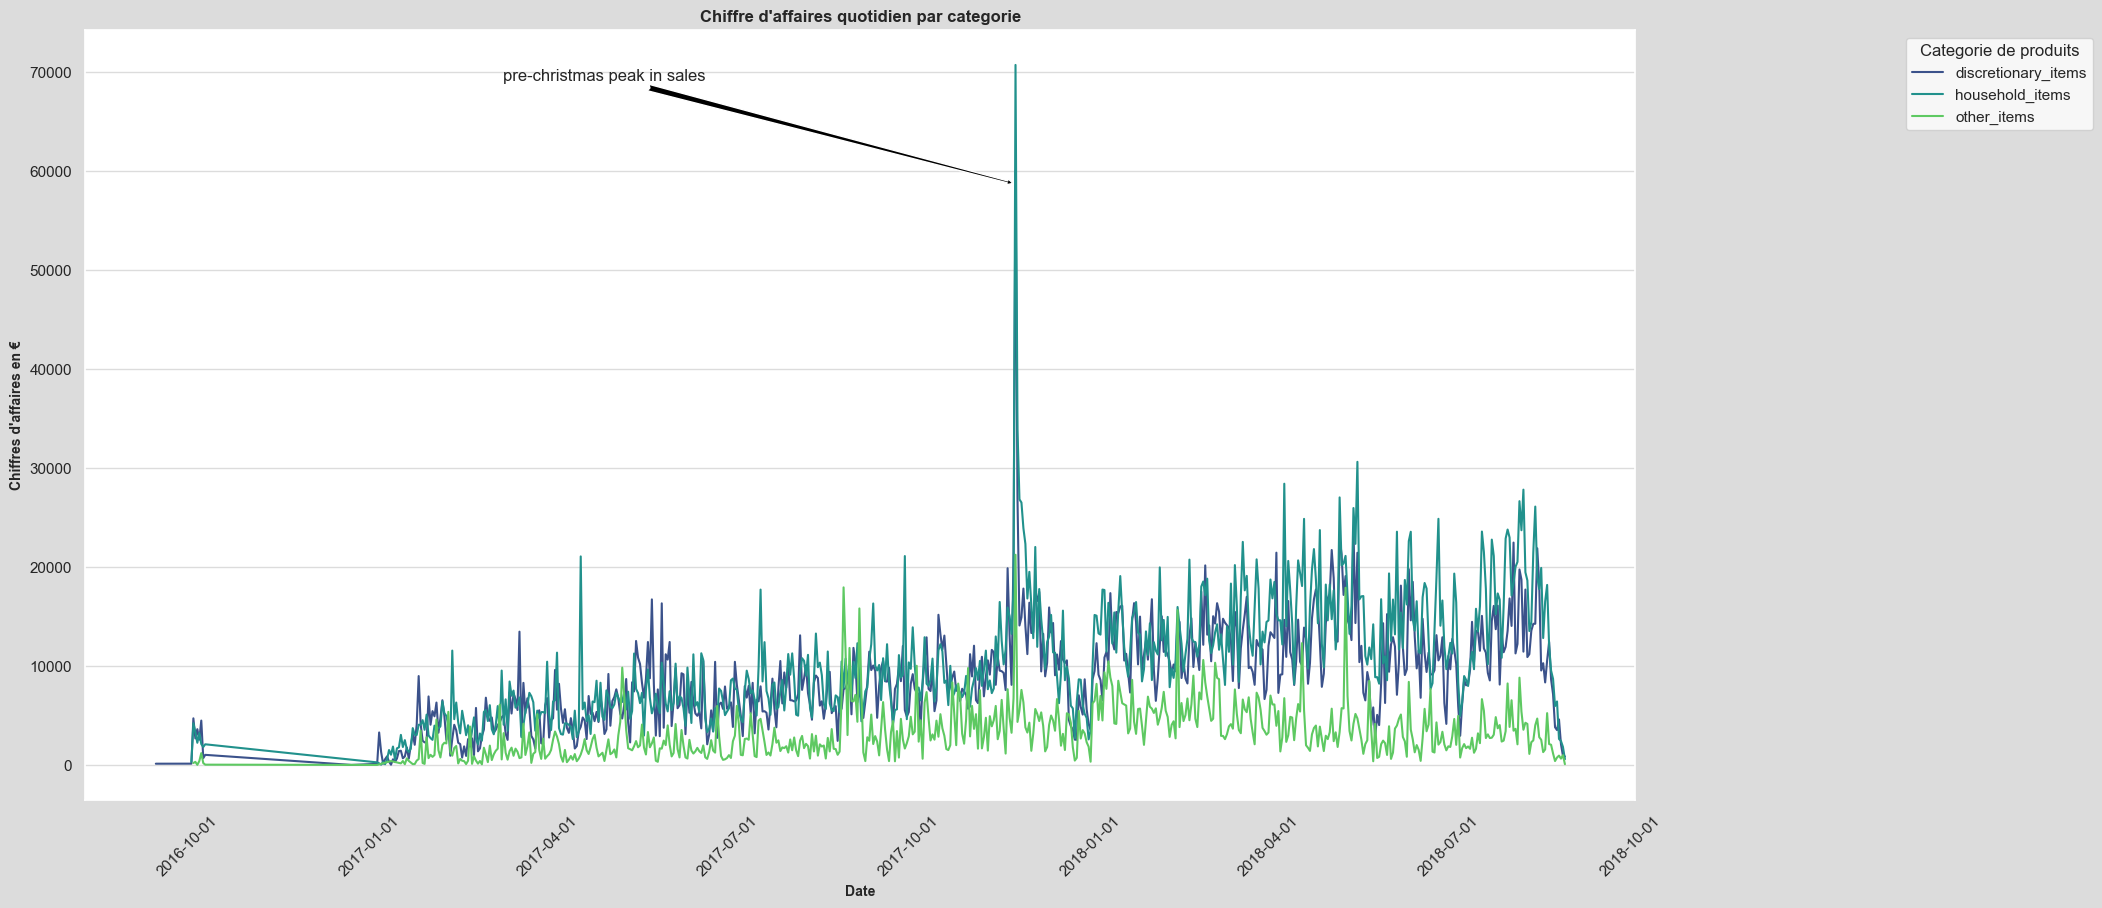

In [197]:
# plot daily turnover by product category
sns.set(rc={'figure.figsize':(20,10),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_cat = sns.lineplot(data=daily_cat_CA, x='date_only_sales', y='daily_cat_CA', hue='product_group',
                      palette='viridis')
graph_cat.set_title("Chiffre d'affaires quotidien par categorie", fontname = 'Arial',fontsize = 12,fontweight = 'bold')
plt.xlabel('Date',fontweight = 'bold' ,fontsize = 10)
sns.move_legend(graph_cat, "upper right", bbox_to_anchor=(1.3, 1), title='Categorie de produits')
plt.ylabel("Chiffres d'affaires en €",fontweight = 'bold',fontsize = 10)
plt.xticks(['2016-10', '2017-01', '2017-04', '2017-07', '2017-10', '2018-01', '2018-04', '2018-07', '2018-10'], rotation=45)
# plt.xlim([dt.date(2021, 4, 1), dt.date(2023, 3, 1)])
# plt.yticks([0,2500,5000,7500,10000])
# plt.ylim([0, 10000])
plt.grid(axis='y', color='gainsboro')

# annotate peak in sales
graph_cat.annotate('pre-christmas peak in sales', xy=(0.60, 0.8), xycoords='axes fraction', xytext=(0.40, .95),
            textcoords='axes fraction', va='top', ha='right', arrowprops=dict(facecolor='black', arrowstyle='fancy'))

plt.savefig("graph_cat.png", bbox_inches='tight')
plt.show()

### 4.4.3 - Other statistics

**- Distribution of payment types:**

In [198]:
CA_pmt_pie = merged_data_trim.groupby('pt_pmt_type').agg({'b_price' : ['sum']}).reset_index()
CA_pmt_pie.rename(columns={'b_price':'total_pmt'}, inplace=True)
CA_pmt_pie = CA_pmt_pie.droplevel(1, axis='columns')
CA_pmt_pie                                                 

pt_pmt_type    total_pmt
0       boleto   2306751.51
1  credit_card  10579566.95
2   debit_card    177417.86
3      voucher    626960.29

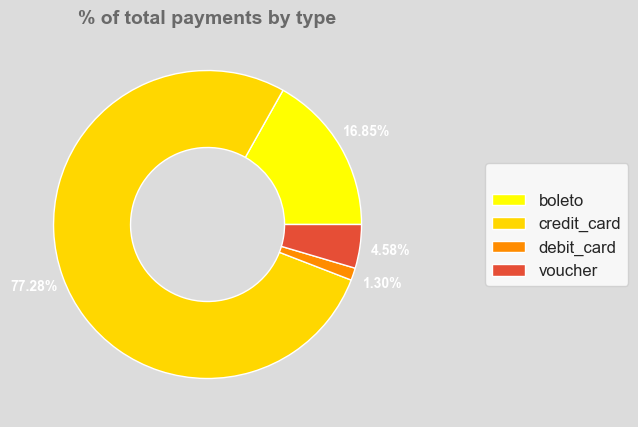

In [199]:
# pie plot references
fig, ax = plt.subplots(figsize=(5, 5))
size = 0.5
fig.set_facecolor('gainsboro')
pie_prod_cat = plt.pie(CA_pmt_pie['total_pmt'], autopct='%1.2f%%', pctdistance=1.2, radius=1,
                       colors=['yellow', 'gold', 'darkorange', cherry], textprops={'fontsize': 10, 'color':'white',
                                                                                   'fontweight':'bold'}, 
                                                                                    wedgeprops=dict(width=size, edgecolor='w'))
ax.legend(CA_pmt_pie["pt_pmt_type"], title=" ", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1),
          fontsize=12)
ax.set_title("% of total payments by type", loc="center", fontsize=14, fontweight='bold', color='dimgrey')
plt.savefig("payments_pie.png", bbox_inches='tight')
plt.show()

**- Distribution of reviews:**

In [200]:
CA_rev_pie = merged_data_trim.groupby('r_score').agg({'po_product_id':['count']}).reset_index()
CA_rev_pie

r_score po_product_id
                  count
0     1.0         13063
1     2.0          3882
2     3.0          9597
3     4.0         22038
4     5.0         65703

In [201]:
CA_rev_pie.rename(columns={'po_product_id':'total_revs'}, inplace=True)
CA_rev_pie = CA_rev_pie.droplevel(1, axis='columns')
CA_rev_pie 

r_score  total_revs
0      1.0       13063
1      2.0        3882
2      3.0        9597
3      4.0       22038
4      5.0       65703

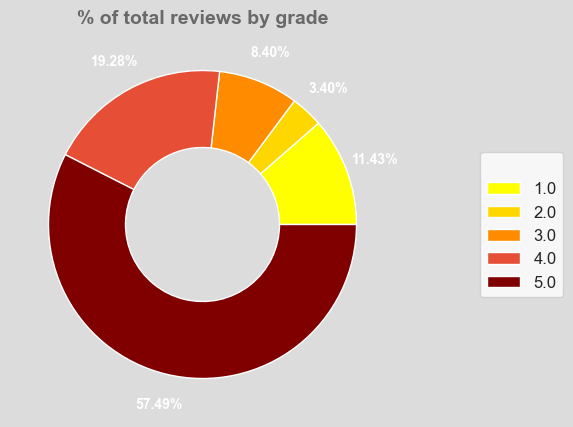

In [202]:
# pie plot references
fig, ax = plt.subplots(figsize=(5, 5))
size = 0.5
fig.set_facecolor('gainsboro')
pie_prod_cat = plt.pie(CA_rev_pie['total_revs'], autopct='%1.2f%%', pctdistance=1.2, radius=1,
                   colors=['yellow', 'gold', 'darkorange', cherry, 'maroon'], textprops={'fontsize': 10, 'color':'white',
                                                                                         'fontweight':'bold'}, 
                                                                                          wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(CA_rev_pie["r_score"], title=" ", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=12)
ax.set_title("% of total reviews by grade", loc="center", fontsize=14, fontweight='bold', color='dimgrey')
plt.savefig("reviews_pie.png", bbox_inches='tight')
plt.show()

**Distribution of instalments by payment type :**

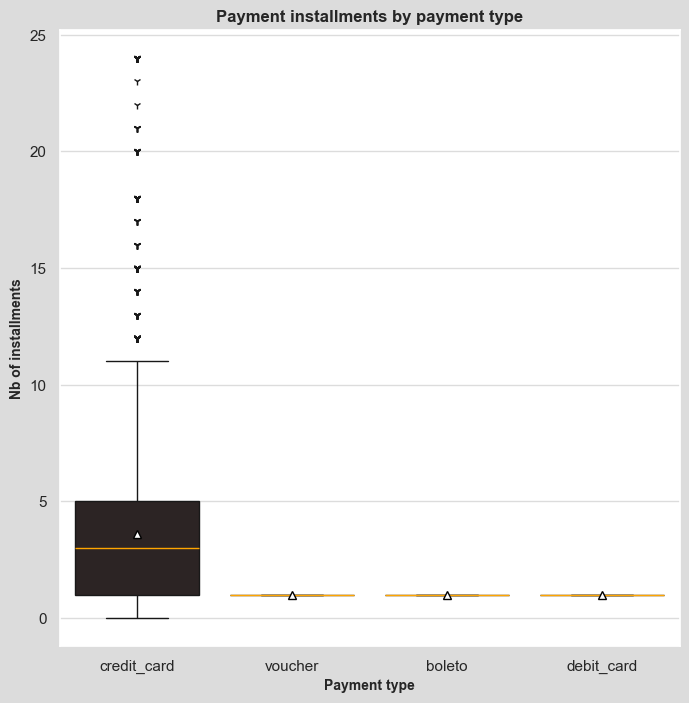

In [203]:
# plot clusters against gdp growth on a box plot
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pmt_instal = sns.boxplot(data=merged_data_trim, x="pt_pmt_type", y="pt_pmt_installments", hue="pt_pmt_type",
                             flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                             meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, 
                             orient="v", color=cherry, showmeans=True, dodge=False)
plt.xlabel('Payment type', fontweight='bold', fontsize=10)
plt.ylabel('Nb of installments', fontweight='bold', fontsize=10)
plt.title('Payment installments by payment type', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')
plt.savefig("box_pmt_instal.png", bbox_inches='tight')
plt.show()

**Only credit card payments show a variability in the number of installments, all other payment types are used in only 1 installment.**

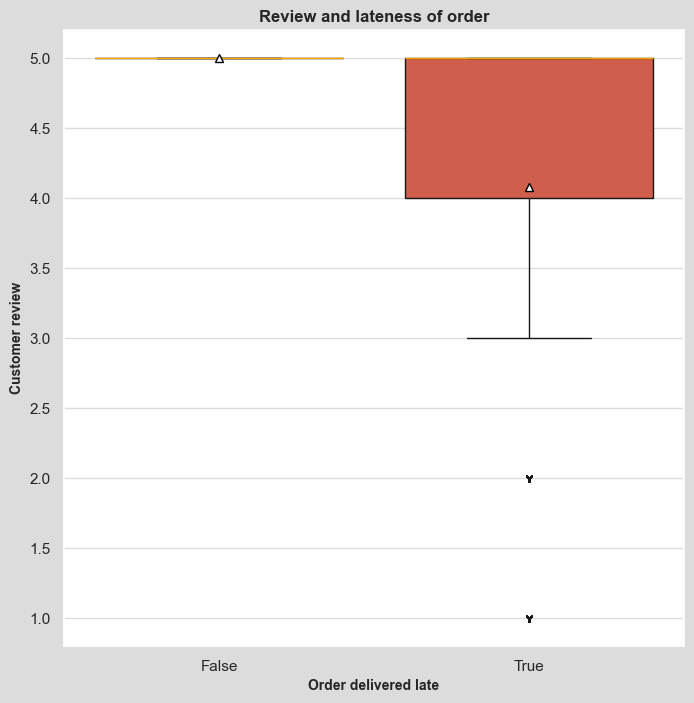

In [204]:
# plot clusters against gdp growth on a box plot
sns.set(rc={'figure.figsize':(8,8), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_review_late = sns.boxplot(data=merged_data_trim, x="order_arrived_late", y="r_score", hue="order_arrived_late",
                             flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                             meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, 
                             orient="v", color=cherry, showmeans=True, dodge=False)
plt.xlabel('Order delivered late', fontweight='bold', fontsize=10)
plt.ylabel('Customer review', fontweight='bold', fontsize=10)
plt.title('Review and lateness of order', fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='y', color='gainsboro')
plt.savefig("box_review_late.png", bbox_inches='tight')
plt.show()

**All orders delivered on time or early have a review equal to the maximum review points possible (5 out of 5). Only orders that have been delivered late show a variability in the review score given by the customer.**

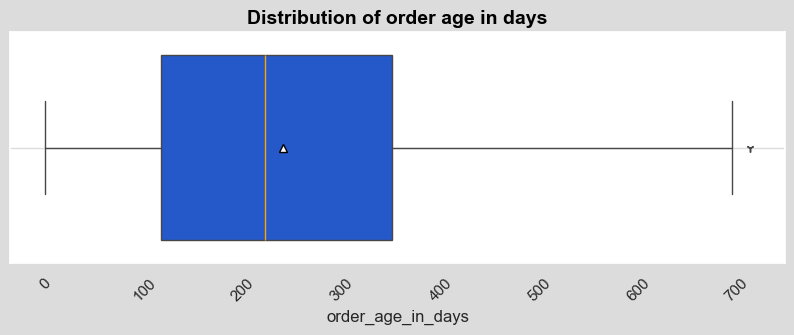

In [205]:
# find and analyse outliers in each numerical column
sns.set(rc={'figure.figsize':(10,3), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
data_order_age = merged_data_trim['order_age_in_days']
graph_order_age = sns.boxplot(data=data_order_age, flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="h", color='gold',
                       showmeans=True, dodge=False, palette=[ciel], legend=False)
plt.xticks(rotation=45)
plt.ylabel("", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of order age in days",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')
# plt.axvline(100, color=fuchsia)
plt.savefig("graph_order_age.png", bbox_inches='tight')
plt.show()

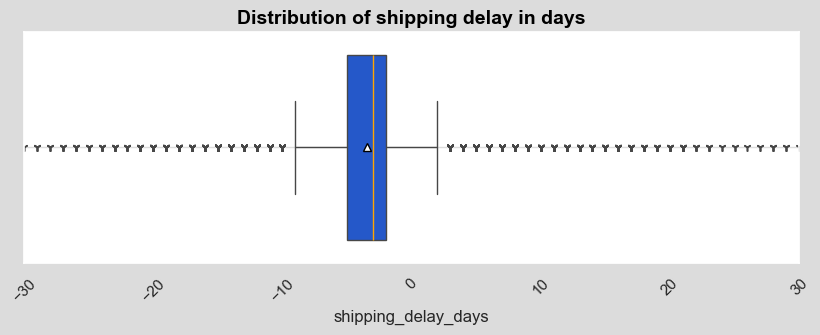

In [206]:
# find and analyse outliers in each numerical column
sns.set(rc={'figure.figsize':(10,3), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
data_shipping_delay = merged_data_trim['shipping_delay_days']
graph_shipping_delay = sns.boxplot(data=data_shipping_delay, flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="h", color='gold',
                       showmeans=True, dodge=False, palette=[ciel], legend=False)
plt.xticks(rotation=45)
plt.xlim([-30, 30])
plt.ylabel("", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of shipping delay in days",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')
# plt.axvline(100, color=fuchsia)
plt.savefig("graph_shipping_delay.png", bbox_inches='tight')
plt.show()

**On average, orders arrive 3 days earlier than expected.**

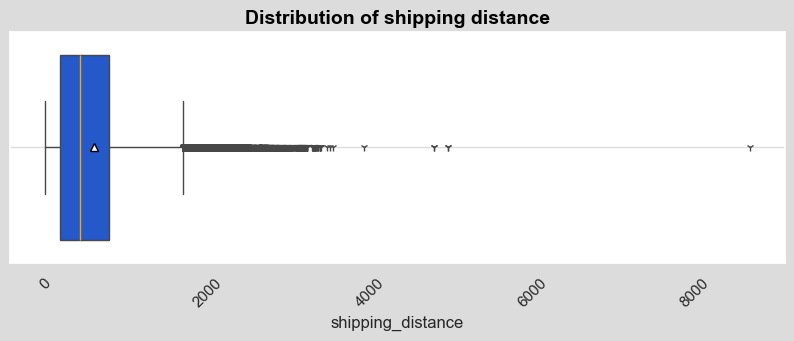

In [207]:
# find and analyse outliers in each numerical column
sns.set(rc={'figure.figsize':(10,3), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
data_shipping_dist = merged_data_trim['shipping_distance']
graph_shipping_dist = sns.boxplot(data=data_shipping_dist, flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="h", color='gold',
                       showmeans=True, dodge=False, palette=[ciel], legend=False)
plt.xticks(rotation=45)
plt.ylabel("", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of shipping distance",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')
# plt.axvline(100, color=fuchsia)
plt.savefig("graph_shipping_dist.png", bbox_inches='tight')
plt.show()

**On average, orders have a shipping distance over 500km. Brazil extends 4,395 kilometers (2,731 mi) from north to south and 4,319 kilometers (2,684 mi) from east to west, so any outliers beyond these distances should probably be removed (very few). As these could also indicate sellers shipping orders from warehouses located outside Brazil, it was decided to keep these outliers as is in the absence of relevant information to the contrary.**

In [208]:
merged_data_trim.head()

sh_customer_id  sh_status      c_lat      c_lon  \
0  9ef432eb6251297304e76186b10a928d  delivered -23.577622 -46.587055   
1  9ef432eb6251297304e76186b10a928d  delivered -23.577622 -46.587055   
2  9ef432eb6251297304e76186b10a928d  delivered -23.577622 -46.587055   
3  b0830fb4747a6c6d20dea0b8c802d7ef  delivered -12.186877 -44.540232   
4  41ce2a54c0b03bf3443c3d931a367089  delivered -16.745150 -48.514783   

  g_state_x capital_x  altitude_x  pop_density_x  motor_vehicles_x  \
0        SP      True    783.6151       81.59000      11148.000000   
1        SP      True    783.6151       81.59000      11148.000000   
2        SP      True    783.6151       81.59000      11148.000000   
3        BA     False    441.9978       60.80000       5560.000000   
4        GO     False   1003.0870       85.44643      16155.977181   

   GDP_per_capita_x  post_offices_x  HDI_index_x  tax_gdp_%_x  \
0      27499.805000        1.000000     0.702000     1.850000   
1      27499.805000        1.000000     0.702000     1.850000   
2      27499.805000        1.000000     0.702000     1.850000   
3      16574.305000        1.000000     0.614500     1.970000   
4      19772.716799        1.895553     0.653236     7.193557   

                         b_order_id  b_price  b_freight_value  \
0  e481f51cbdc54678b7cc49136f2d6af7    29.99             8.72   
1  e481f51cbdc54678b7cc49136f2d6af7    29.99             8.72   
2  e481f51cbdc54678b7cc49136f2d6af7    29.99             8.72   
3  53cdb2fc8bc7dce0b6741e2150273451   118.70            22.76   
4  47770eb9100c2d0c44946d9cf07ec65d   159.90            19.22   

                      po_product_id  po_weight  r_score  pt_pmt_type  \
0  87285b34884572647811a353c7ac498a      500.0      4.0  credit_card   
1  87285b34884572647811a353c7ac498a      500.0      4.0      voucher   
2  87285b34884572647811a353c7ac498a      500.0      4.0      voucher   
3  595fac2a385ac33a80bd5114aec74eb8      400.0      4.0       boleto   
4  aa4383b373c6aca5d8797843e5594415      420.0      5.0  credit_card   

   pt_pmt_installments  shipping_distance  review_delay_days  \
0                  1.0          18.526869                1.0   
1                  1.0          18.526869                1.0   
2                  1.0          18.526869                1.0   
3                  1.0         849.520470                1.0   
4                  3.0         514.407596                1.0   

         product_group sh_order_time_date  delivery_timeframe_avg  \
0      household_items         2017-10-02                    12.0   
1      household_items         2017-10-02                    12.0   
2      household_items         2017-10-02                    12.0   
3  discretionary_items         2018-07-24                    17.0   
4      household_items         2018-08-08                    18.0   

  order_arrived_late weekend_shopping evening_shopping cust_reviewed_order  \
0               True            False            False                True   
1               True            False            False                True   
2               True            False            False                True   
3               True            False             True                True   
4               True            False            False               False   

  product_has_description product_has_photos  product_volume_m3  \
0                    True               True             0.1976   
1                    True               True             0.1976   
2                    True               True             0.1976   
3                    True               True             0.4693   
4                    True               True             0.9576   

   shipping_delay_days  order_age_in_days  
0                 -2.0              331.0  
1                 -2.0              331.0  
2                 -2.0              331.0  
3                 -4.0               36.0  
4                 -5.0               21.0

In [209]:
cust_state_pie = merged_data_trim.groupby('g_state_x').agg({'sh_customer_id' : ['nunique']}).reset_index()
cust_state_pie

g_state_x sh_customer_id
                    nunique
0         AC             79
1         AL            393
2         AM            144
3         AP             66
4         BA           3211
5         CE           1265
6         DF           1905
7         ES           1958
8         GO           1933
9         MA            707
10        MG          11246
11        MS            697
12        MT            874
13        PA            931
14        PB            506
15        PE           1574
16        PI            468
17        PR           4877
18        RJ          12162
19        RN            469
20        RO            239
21        RR             41
22        RS           5307
23        SC           3511
24        SE            333
25        SP          40173
26        TO            271

In [210]:
cust_state_pie.rename(columns={'sh_customer_id':'total_cust'}, inplace=True)
cust_state_pie = cust_state_pie.droplevel(1, axis='columns')
cust_state_pie = cust_state_pie.sort_values('total_cust', ascending=False)
cust_state_pie

g_state_x  total_cust
25        SP       40173
18        RJ       12162
10        MG       11246
22        RS        5307
17        PR        4877
23        SC        3511
4         BA        3211
7         ES        1958
8         GO        1933
6         DF        1905
15        PE        1574
5         CE        1265
13        PA         931
12        MT         874
9         MA         707
11        MS         697
14        PB         506
19        RN         469
16        PI         468
1         AL         393
24        SE         333
26        TO         271
20        RO         239
2         AM         144
0         AC          79
3         AP          66
21        RR          41

**The client count by state largely follows the distribution of population among the states, therefore it will add little information to characterise client behaviour (cf.PCA results) and has been removed from the analysis.
Source : https://www.worldatlas.com/articles/brazilian-states-by-population.html**

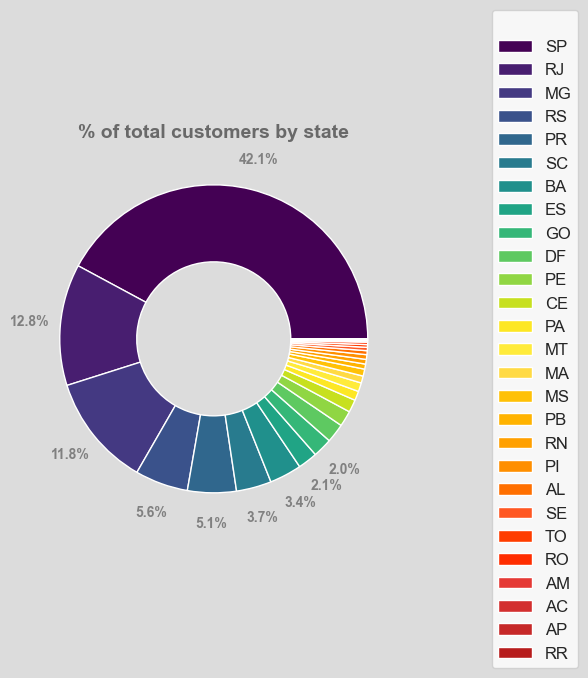

In [211]:
# pie plot references
fig, ax = plt.subplots(figsize=(5, 5))
size = 0.5
fig.set_facecolor('gainsboro')
pie_cust_state = plt.pie(cust_state_pie['total_cust'], autopct=my_autopct, pctdistance=1.2, radius=1,
                         colors=palette, textprops={'fontsize': 10, 'color':'grey', 'fontweight':'bold'}, 
                         wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(cust_state_pie["g_state_x"], title=" ", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=12)
ax.set_title("% of total customers by state", loc="center", fontsize=14, fontweight='bold', color='dimgrey')
plt.savefig("pie_cust_state.png", bbox_inches='tight')
plt.show()